In [1]:
print("Om Nama Sivaya")

Om Nama Sivaya


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory

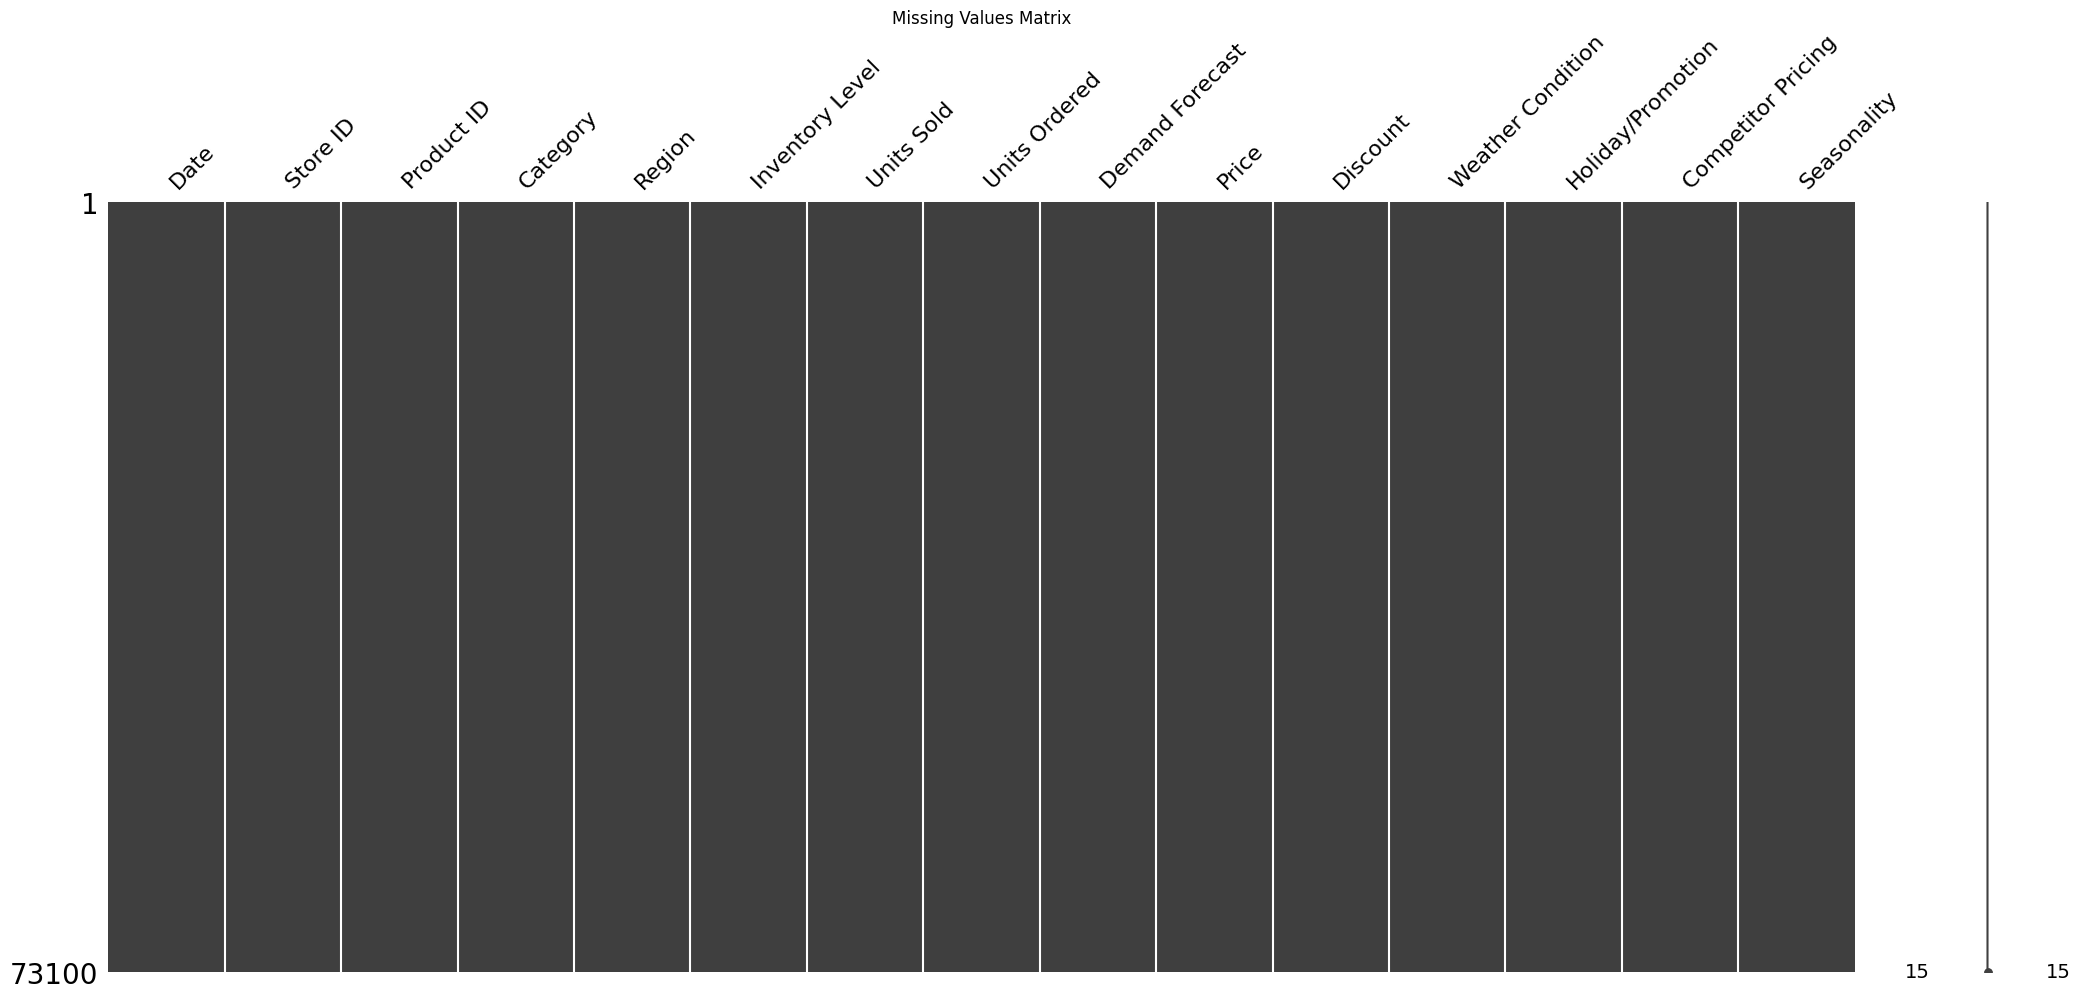


Missing Value Statistics:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []

Number of Outliers Detected: 284


C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\3606804658.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


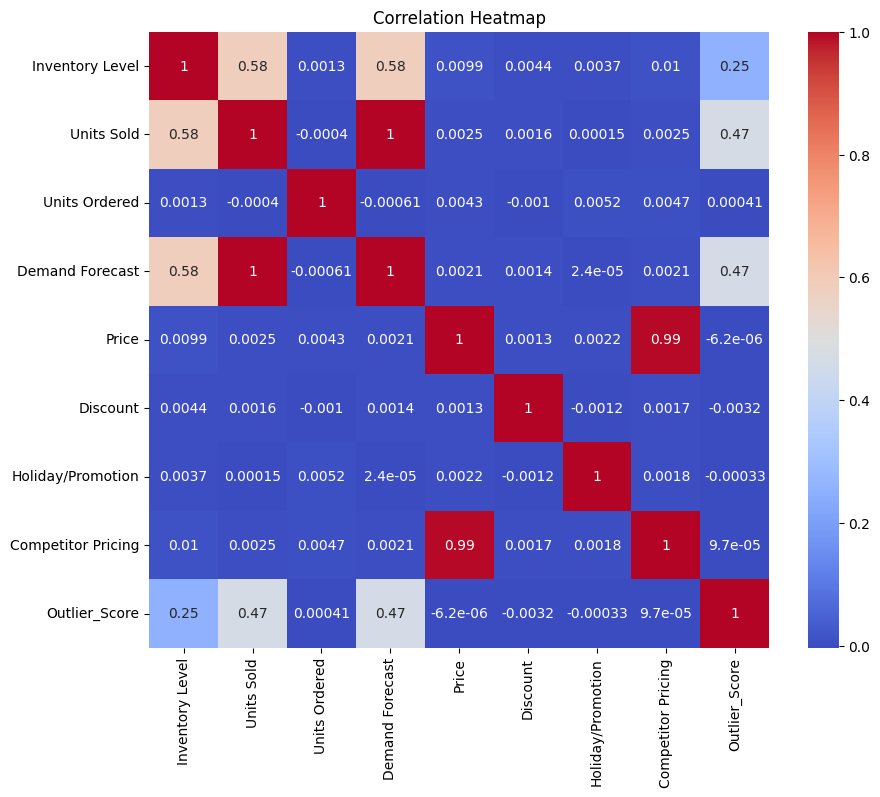

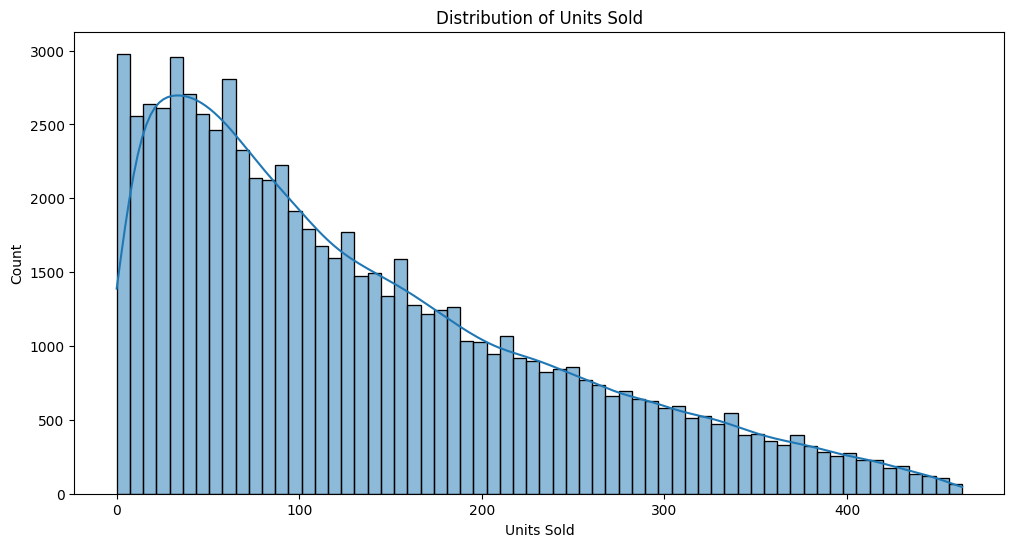

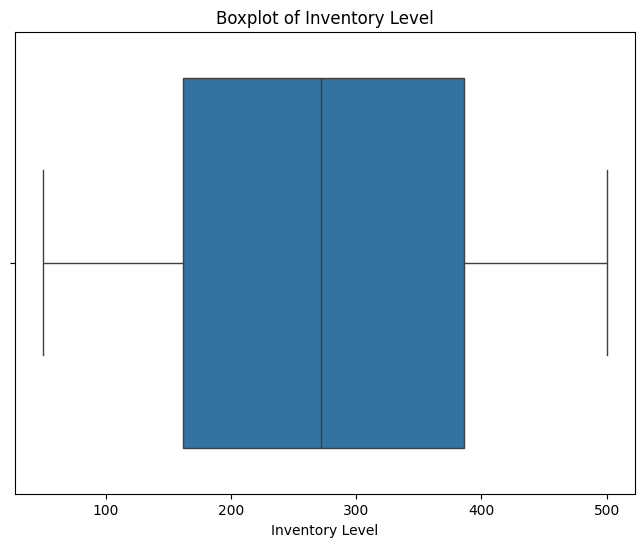

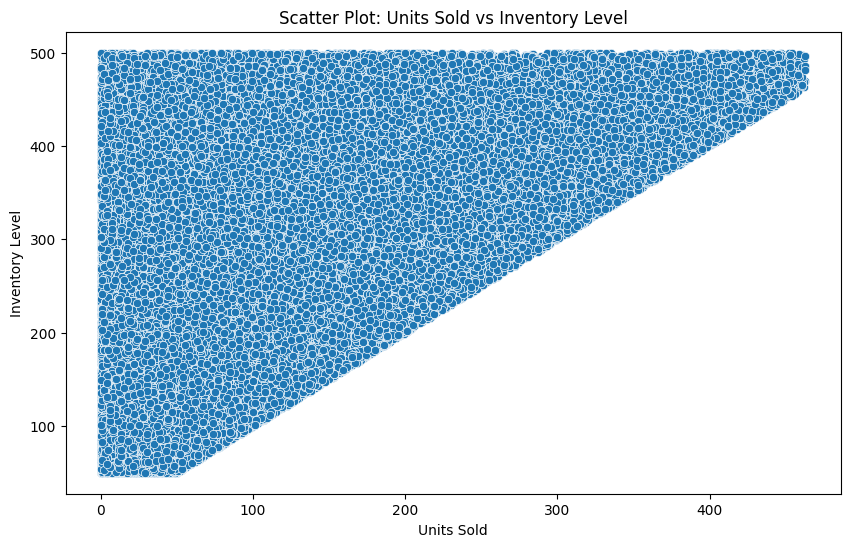

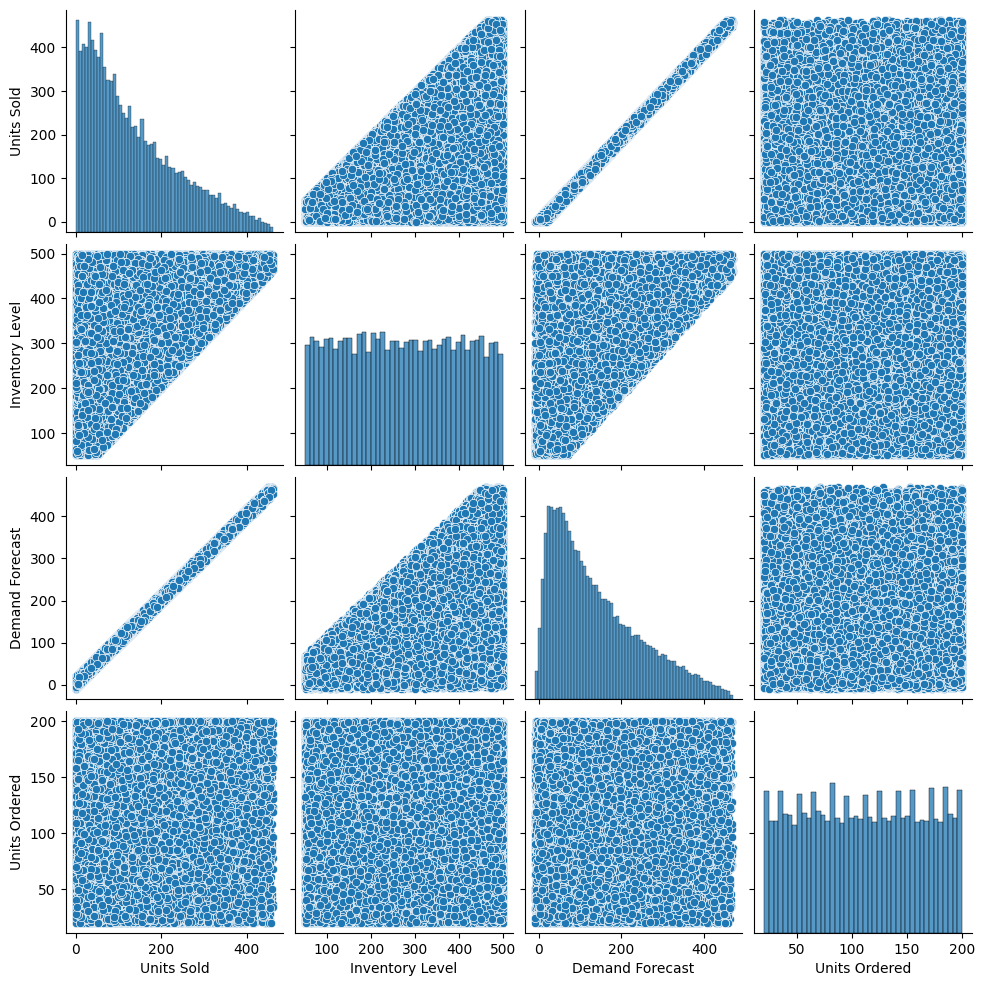

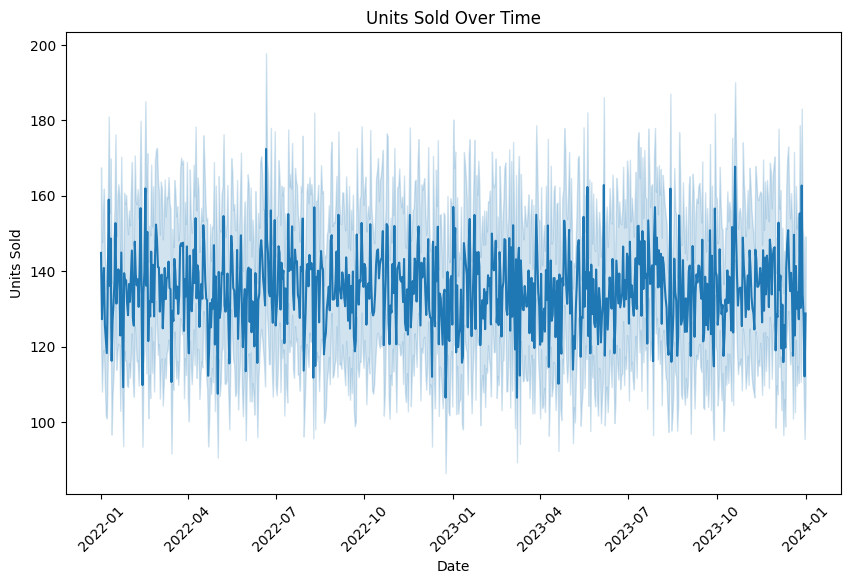

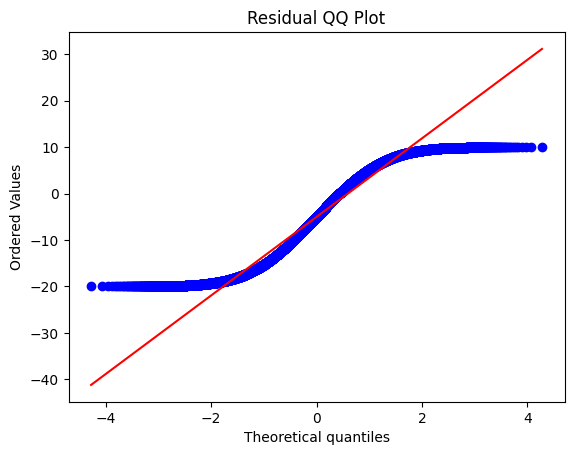

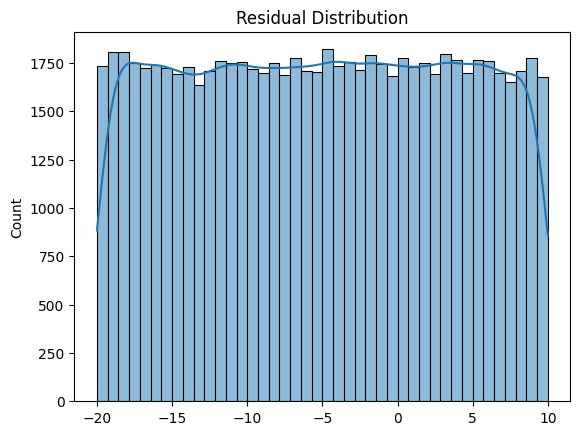


Final Dataset Shape: (72816, 16)

Columns in Dataset: Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Outlier_Score'],
      dtype='object')


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import zscore, probplot

# Load dataset
data = pd.read_csv('retail_store_inventory.csv')

# 1. Basic Dataset Information and Summary
print("Basic Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# 2. Checking and Visualizing Missing Values
msno.matrix(data)
plt.title("Missing Values Matrix")
plt.show()

# Checking missing values statistics
missing_values = data.isnull().sum()
missing_percent = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percent})
print("\nMissing Value Statistics:")
print(missing_data[missing_data["Missing Values"] > 0])

# Handling Missing Values with Forward Fill
data.fillna(method='ffill', inplace=True)

# 3. Outlier Detection using Z-score
numeric_cols = data.select_dtypes(include=['number']).columns
z_scores = np.abs(zscore(data[numeric_cols]))
data['Outlier_Score'] = z_scores.max(axis=1)
outliers = data[data['Outlier_Score'] > 3]
print(f"\nNumber of Outliers Detected: {len(outliers)}")

# Optionally remove outliers
data = data[data['Outlier_Score'] <= 3]

# 4. Correlation Heatmap (Associations)
plt.figure(figsize=(10, 8))

# Calculate correlations only for numeric columns to avoid errors
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
corr = numeric_data.corr()

# Plot heatmap with corrected numeric-only correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# 5. Univariate Analysis
# Distribution Plot for 'Units Sold'
plt.figure(figsize=(12, 6))
sns.histplot(data['Units Sold'], kde=True)
plt.title("Distribution of Units Sold")
plt.show()

# Boxplot for 'Inventory Level'
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Inventory Level'])
plt.title("Boxplot of Inventory Level")
plt.show()

# 6. Bivariate Analysis (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Units Sold', y='Inventory Level', data=data)
plt.title("Scatter Plot: Units Sold vs Inventory Level")
plt.show()

# 7. Pair Plot for Important Features
selected_features = ['Units Sold', 'Inventory Level', 'Demand Forecast', 'Units Ordered']
sns.pairplot(data[selected_features])
plt.show()

# 8. Time-Series Analysis (If applicable)
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Date', y='Units Sold', data=data)
    plt.title("Units Sold Over Time")
    plt.xticks(rotation=45)
    plt.show()

# 9. Residual Analysis (Assuming residuals between Sales & Forecast)
if 'Demand Forecast' in data.columns:
    residuals = data['Units Sold'] - data['Demand Forecast']
    probplot(residuals, dist='norm', plot=plt)
    plt.title("Residual QQ Plot")
    plt.show()

    sns.histplot(residuals, kde=True)
    plt.title("Residual Distribution")
    plt.show()

# 10. Final Dataset Check after Cleaning
print("\nFinal Dataset Shape:", data.shape)
print("\nColumns in Dataset:", data.columns)


In [4]:
print("Summary Statistics (Numeric Features):")
print(data.describe())

print("\nSummary Statistics (Categorical Features):")
print(data.describe(include=['object', 'category']))


Summary Statistics (Numeric Features):
                                Date  Inventory Level    Units Sold  \
count                          72816     72816.000000  72816.000000   
mean   2023-01-01 00:55:14.040870400       273.641274    135.154746   
min              2022-01-01 00:00:00        50.000000      0.000000   
25%              2022-07-02 00:00:00       162.000000     48.000000   
50%              2023-01-01 00:00:00       272.000000    107.000000   
75%              2023-07-03 00:00:00       386.000000    201.000000   
max              2024-01-01 00:00:00       500.000000    463.000000   
std                              NaN       129.520846    107.086647   

       Units Ordered  Demand Forecast         Price      Discount  \
count   72816.000000     72816.000000  72816.000000  72816.000000   
mean      110.013294       140.178297     55.146382     10.007347   
min        20.000000        -9.990000     10.000000      0.000000   
25%        65.000000        53.507500     32.

 2. Distribution & Density Plots (Univariate Analysis):
Analyze the spread and skewness of the data.

Histograms: For numerical data.

KDE (Kernel Density Estimate): To check the smooth density curve.

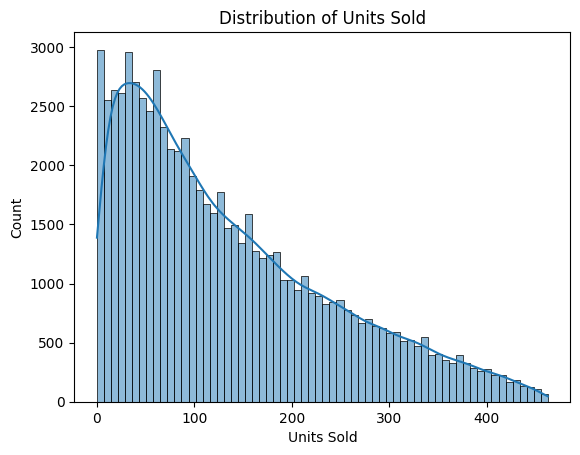

In [5]:
# Histogram with KDE (Kernel Density Estimate)
sns.histplot(data['Units Sold'], kde=True)
plt.title("Distribution of Units Sold")
plt.show()


In [7]:
data['Date'] = pd.to_datetime(data['Date'])  # Ensure 'Date' is in datetime format
data['Month'] = data['Date'].dt.month       # Extract Month
print(data.head())  # Verify the new 'Month' column


        Date Store ID Product ID     Category Region  Inventory Level  \
0 2022-01-01     S001      P0001    Groceries  North              231   
1 2022-01-01     S001      P0002         Toys  South              204   
2 2022-01-01     S001      P0003         Toys   West              102   
3 2022-01-01     S001      P0004         Toys  North              469   
4 2022-01-01     S001      P0005  Electronics   East              166   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0         127             55           135.47  33.50        20   
1         150             66           144.04  63.01        20   
2          65             51            74.02  27.99        10   
3          61            164            62.18  32.72        10   
4          14            135             9.26  73.64         0   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
0             Rainy                  0               29.69      Autumn   
1             Su

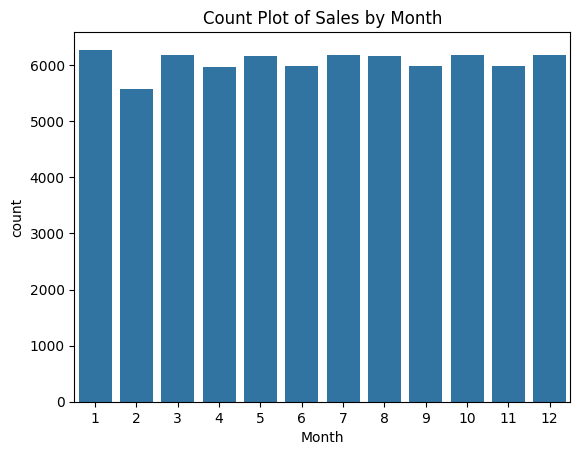

In [8]:
sns.countplot(x='Month', data=data)
plt.title("Count Plot of Sales by Month")
plt.show()


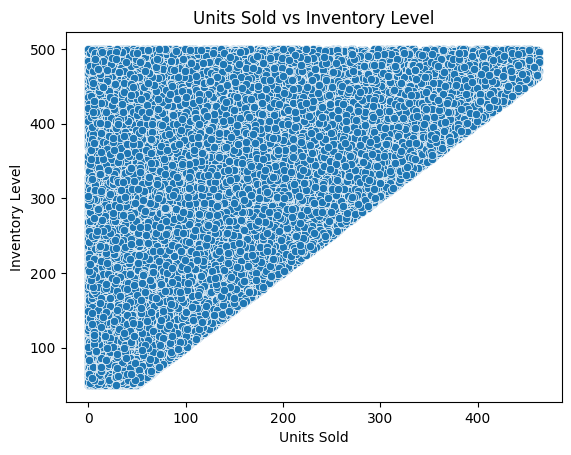

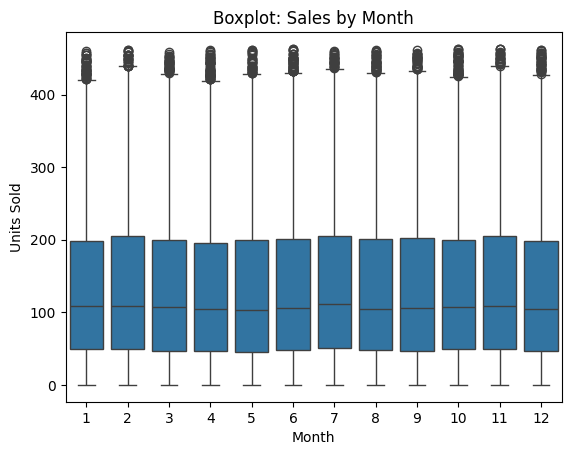

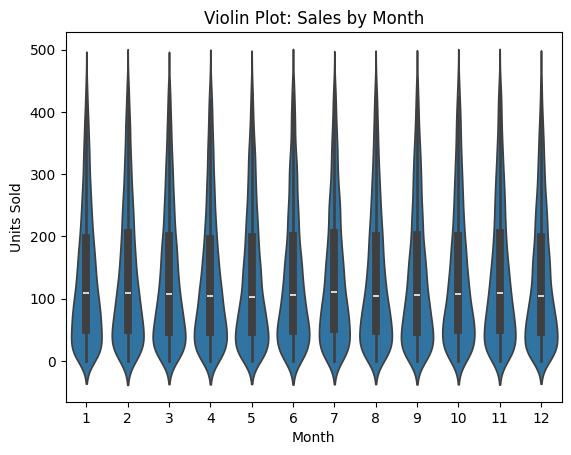

In [9]:
# Scatter plot for numerical relationships
sns.scatterplot(x='Units Sold', y='Inventory Level', data=data)
plt.title("Units Sold vs Inventory Level")
plt.show()

# Boxplot for sales by Month
sns.boxplot(x='Month', y='Units Sold', data=data)
plt.title("Boxplot: Sales by Month")
plt.show()

# Violin Plot: Units Sold by Month
sns.violinplot(x='Month', y='Units Sold', data=data)
plt.title("Violin Plot: Sales by Month")
plt.show()


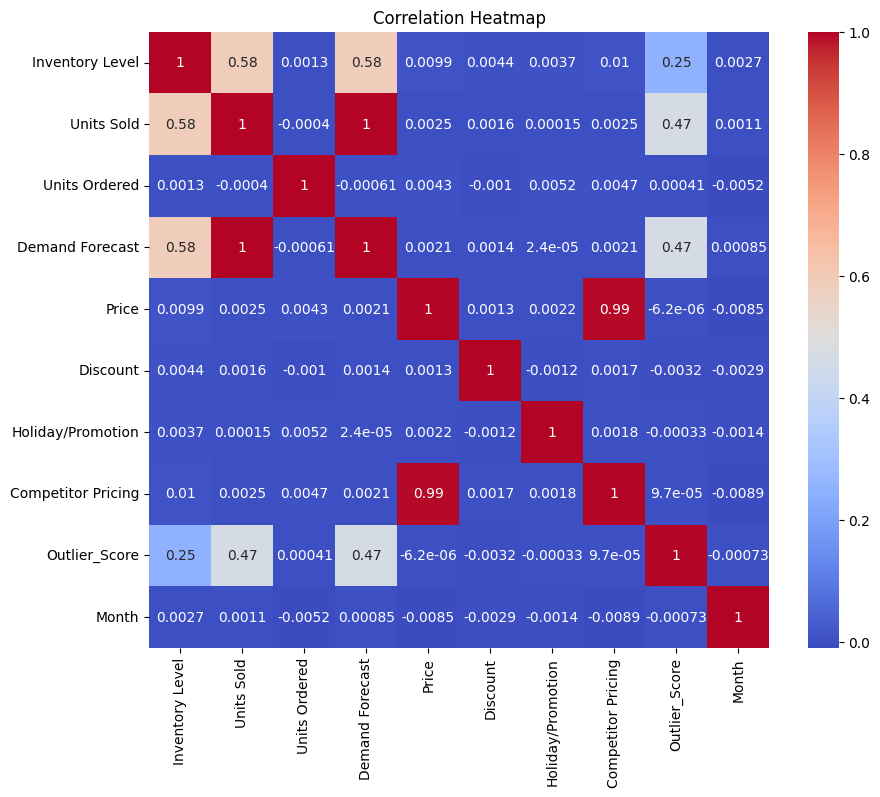

In [11]:
numeric_data = data.select_dtypes(include=['number'])  # Select only numeric columns
corr = numeric_data.corr()  # Compute correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


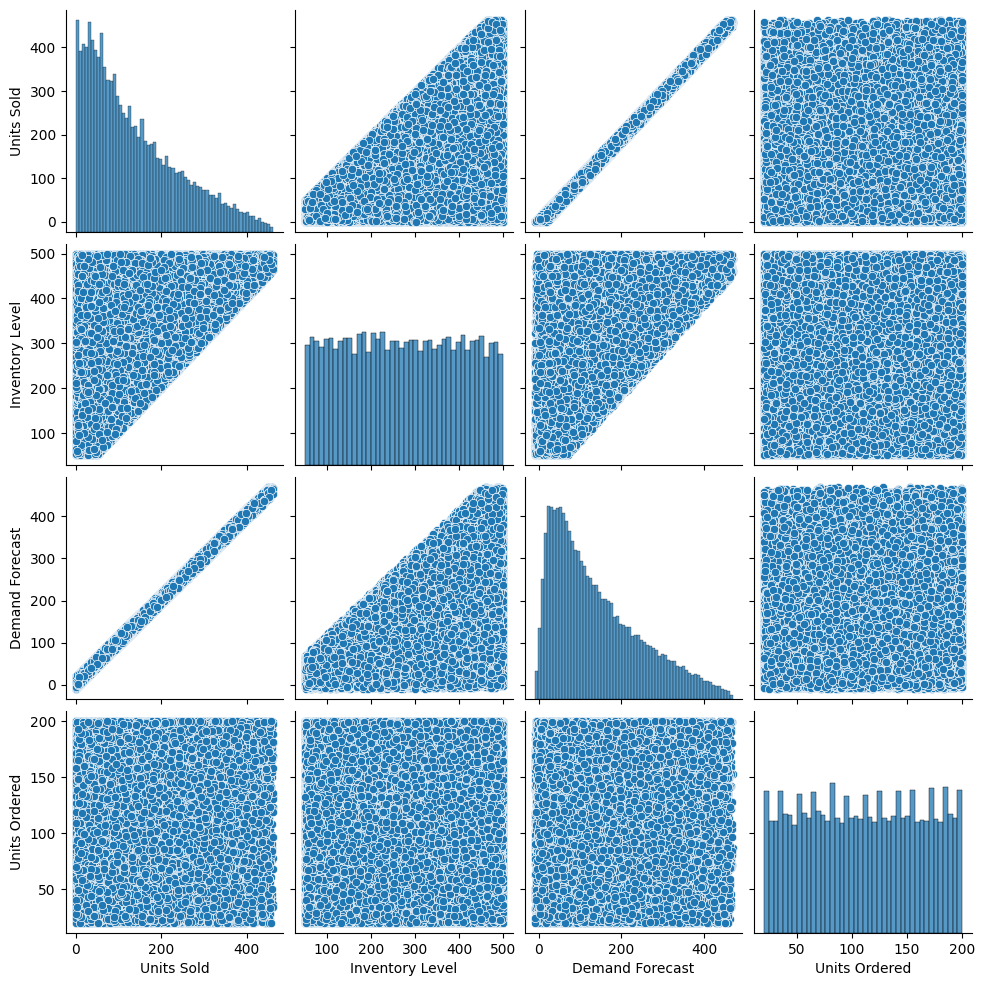

In [12]:
selected_features = ['Units Sold', 'Inventory Level', 'Demand Forecast', 'Units Ordered']

# Check if selected features are numeric
for feature in selected_features:
    if feature not in numeric_data.columns:
        print(f"Skipping '{feature}' because it is not numeric.")
else:
    sns.pairplot(data[selected_features])
    plt.show()


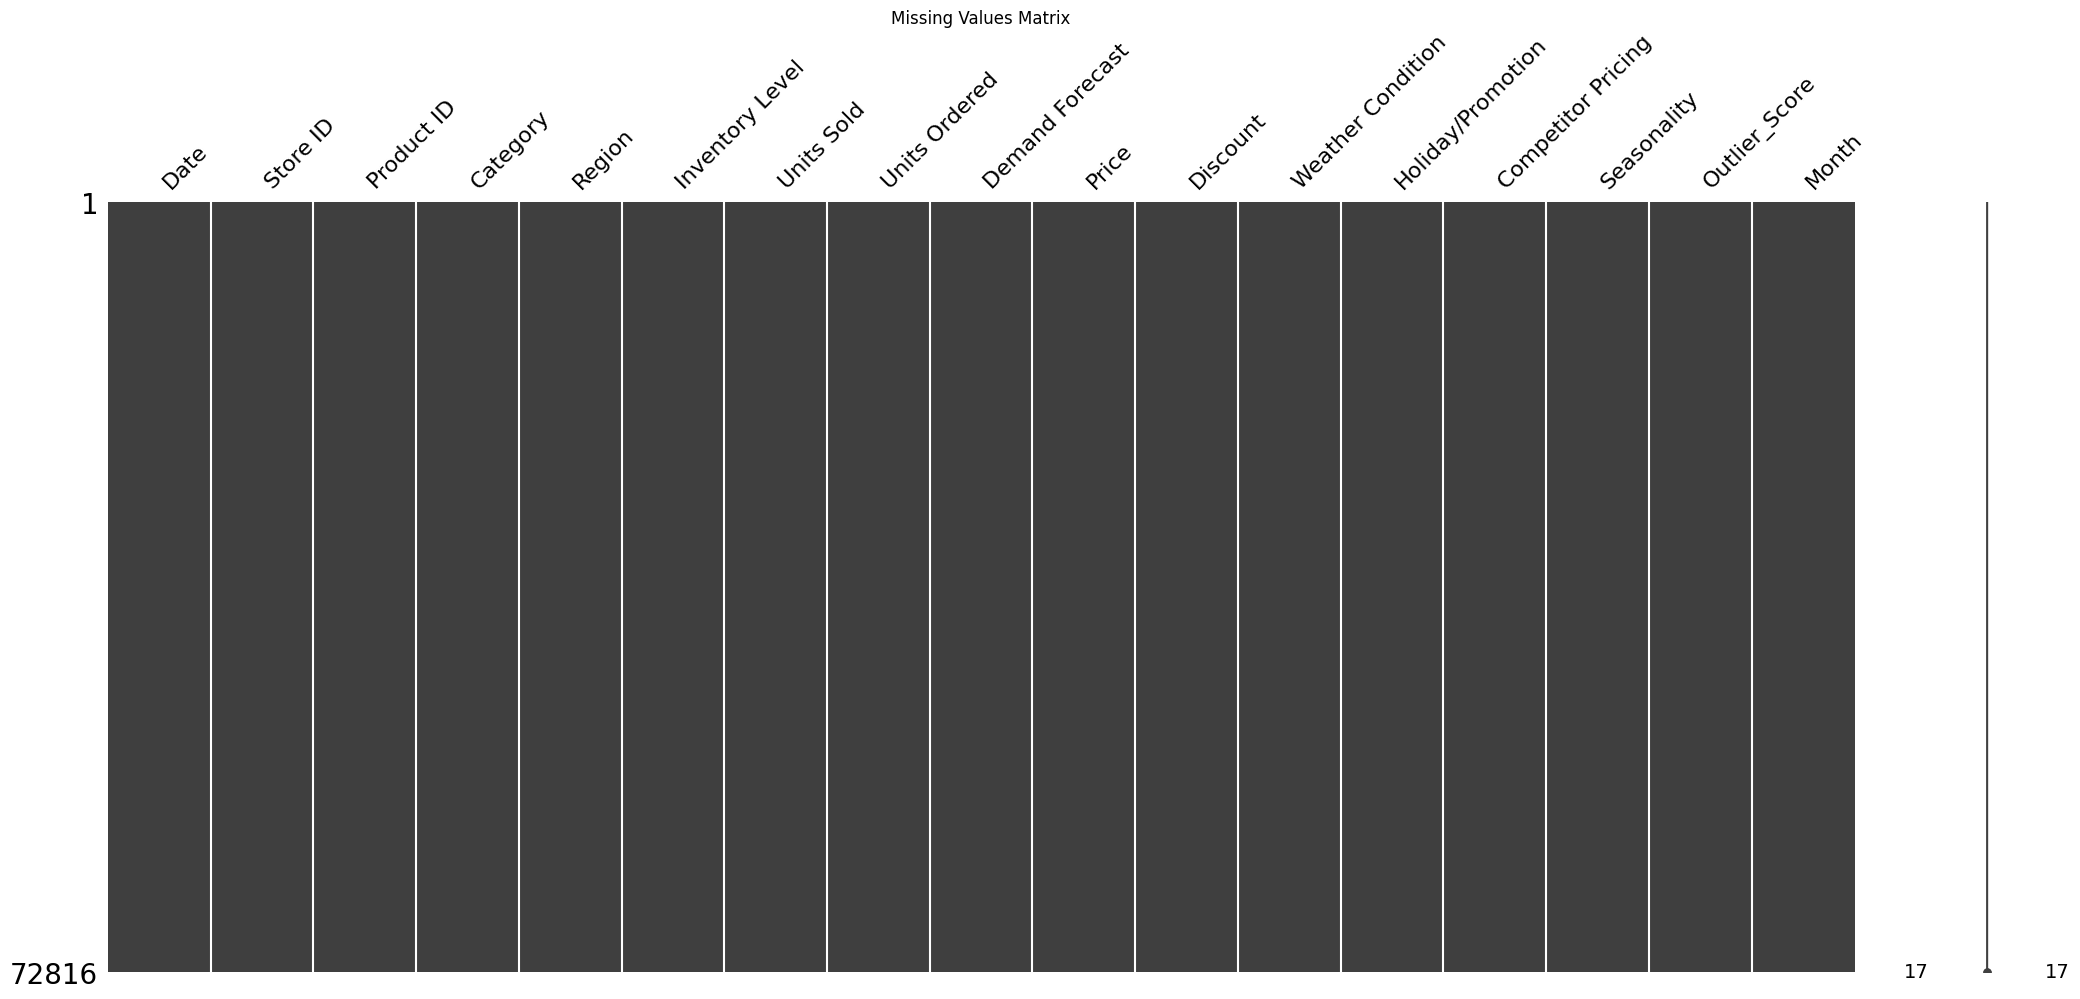

c:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
c:\Users\sivas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


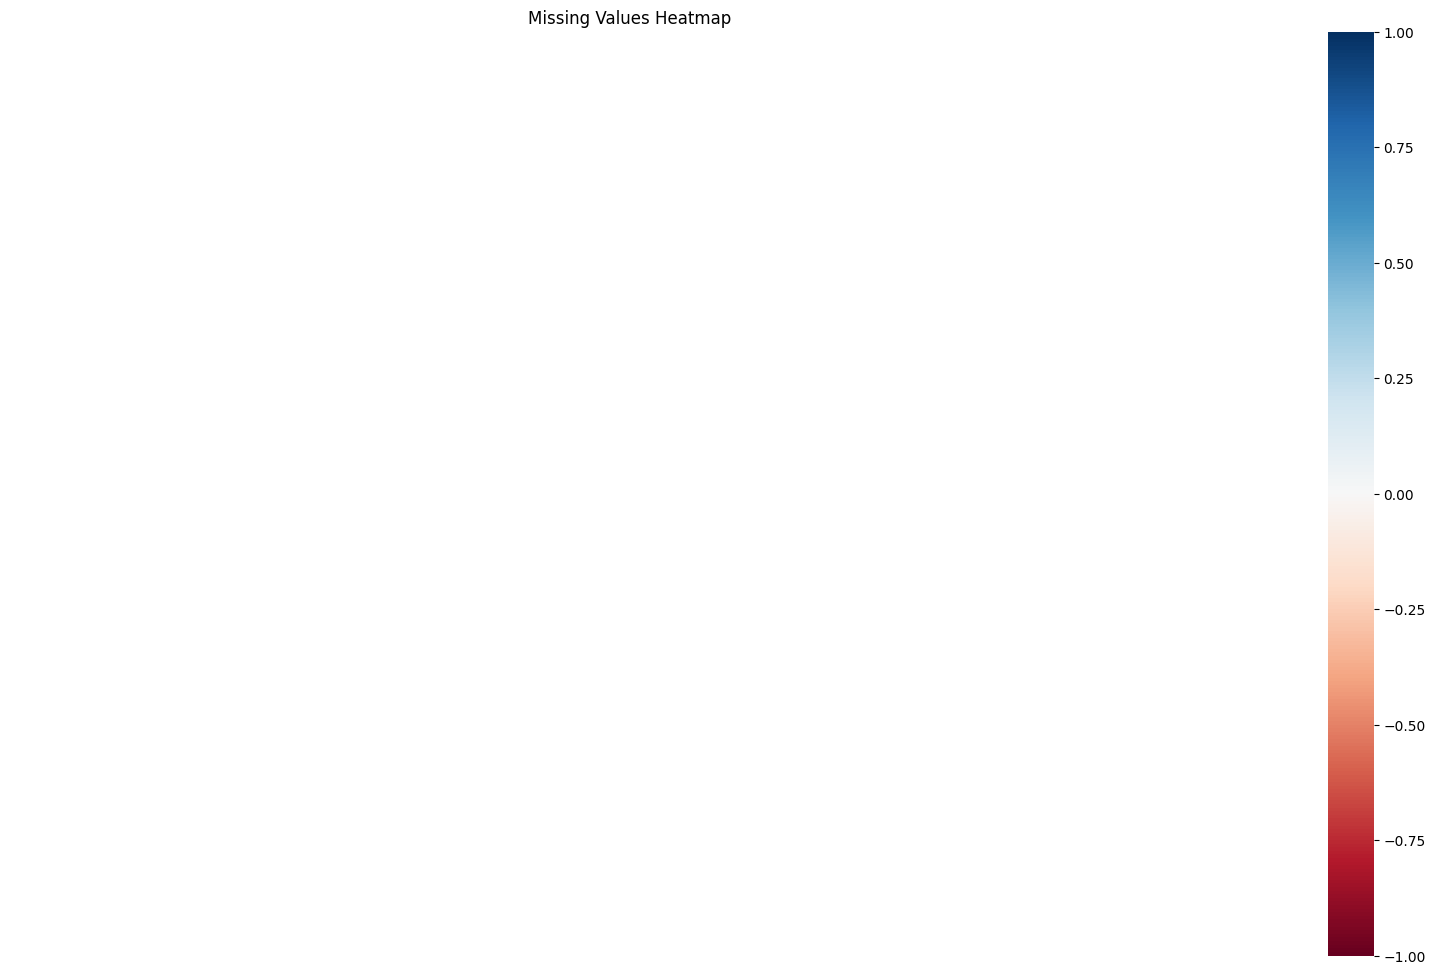

In [13]:
msno.matrix(data)
plt.title("Missing Values Matrix")
plt.show()

msno.heatmap(data)
plt.title("Missing Values Heatmap")
plt.show()


In [14]:
data.fillna(method='ffill', inplace=True)  # Forward fill missing values
data.fillna(method='bfill', inplace=True)  # Backward fill if needed


C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\2803192576.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill missing values
C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\2803192576.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)  # Backward fill if needed


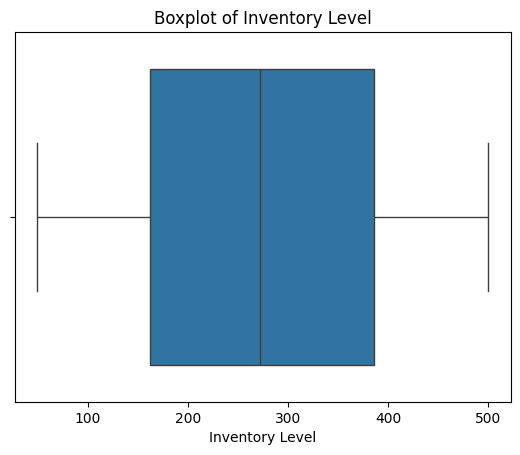

In [15]:
# Boxplot to detect outliers in numerical columns
sns.boxplot(x=data['Inventory Level'])
plt.title("Boxplot of Inventory Level")
plt.show()

# Detect and remove outliers using Z-score
z_scores = np.abs(zscore(data[numeric_cols]))
data['Outlier_Score'] = z_scores.max(axis=1)
data = data[data['Outlier_Score'] <= 3]  # Removing outliers


C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\3064760518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


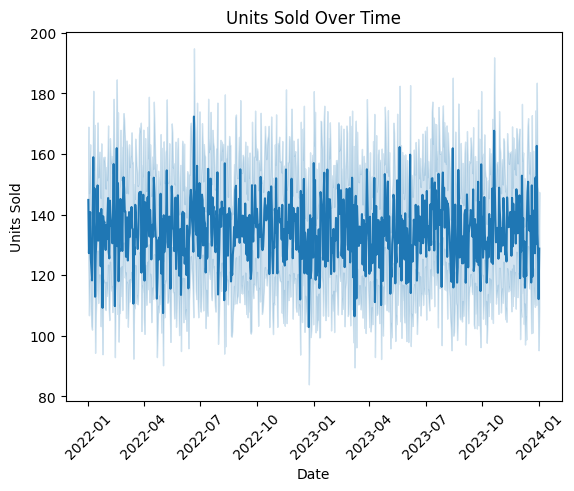

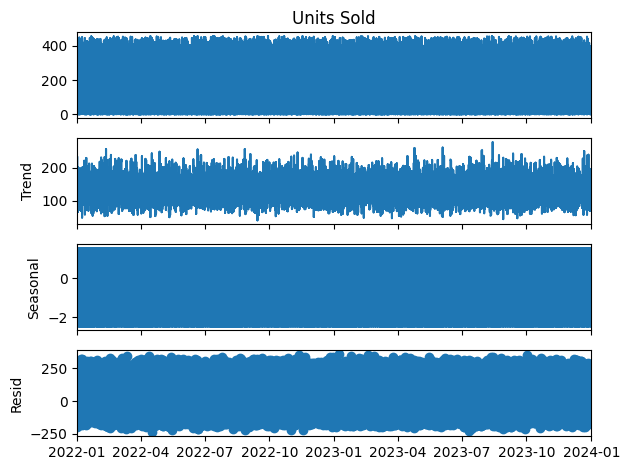

In [16]:
# Convert to datetime and plot time series
data['Date'] = pd.to_datetime(data['Date'])
sns.lineplot(x='Date', y='Units Sold', data=data)
plt.title("Units Sold Over Time")
plt.xticks(rotation=45)
plt.show()

# Seasonal decomposition using statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data.set_index('Date')['Units Sold'], model='additive', period=12)
decomposition.plot()
plt.show()


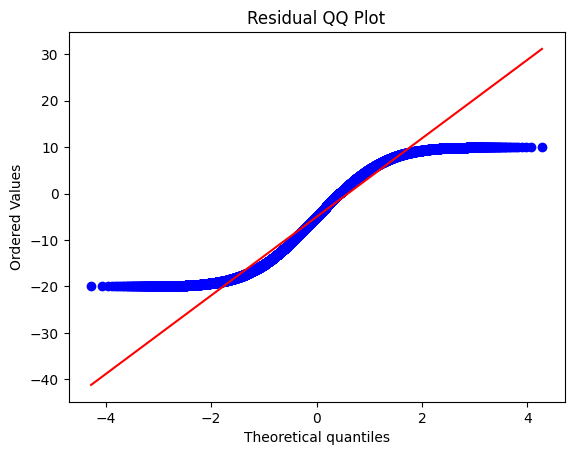

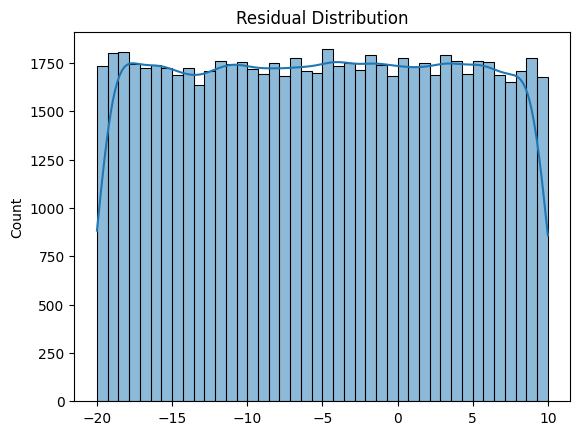

In [17]:
residuals = data['Units Sold'] - data['Demand Forecast']
probplot(residuals, dist='norm', plot=plt)
plt.title("Residual QQ Plot")
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\3822554302.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	13


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	13


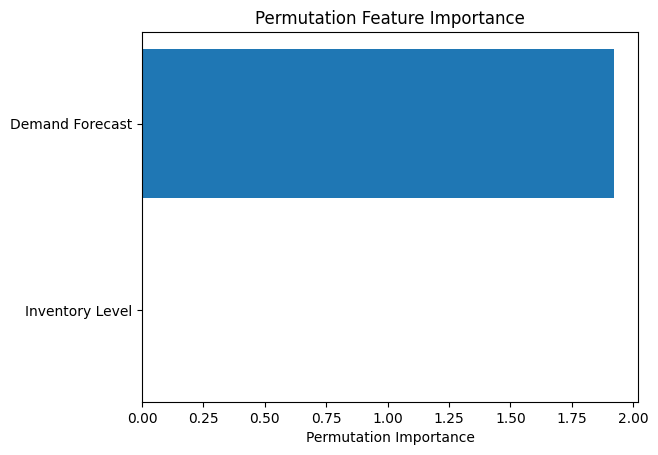

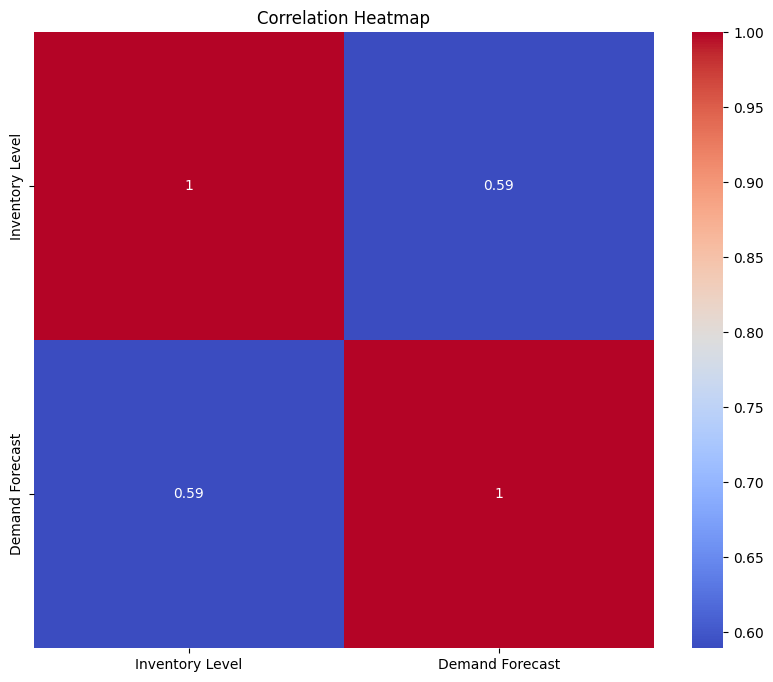

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from boruta import BorutaPy

# Load dataset
data = pd.read_csv('retail_store_inventory.csv')

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Encoding categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Feature Engineering
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data.drop(columns=['Date'], inplace=True)

# Define the target and features (you can choose any other target as needed)
target = 'Units Sold'
X = data.drop(columns=[target])
y = data[target]

# Feature Selection using Boruta
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)
boruta_selector.fit(X.values, y.values)
selected_features = X.columns[boruta_selector.support_]

# Filter selected features
X = X[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert back to DataFrame to retain feature names after scaling
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_test_df = pd.DataFrame(X_test, columns=selected_features)

# Train a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_df, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(rf_model, X_test_df, y_test, n_repeats=10, random_state=42)

# Plotting feature importances
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test_df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.show()

# Display Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


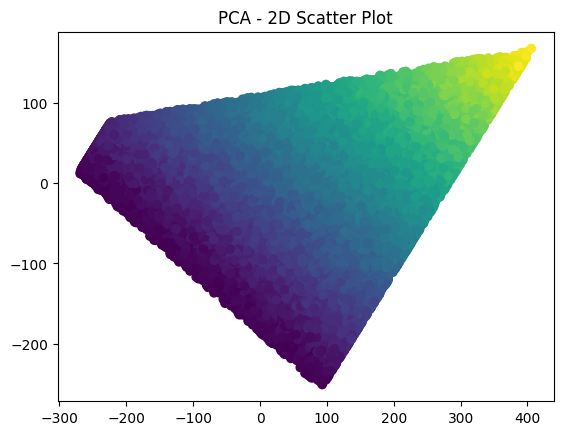

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title("PCA - 2D Scatter Plot")
plt.show()


For a more **comprehensive EDA (Exploratory Data Analysis)**, here are additional advanced techniques and visualizations that you can include to gain **deep insights** from your dataset:

---

### 🔍 **1. Descriptive Statistics & Summary**:
   - Calculate **summary statistics** for numerical and categorical columns.
   - Display **count, mean, median, mode, variance, and standard deviation** for numeric features.
   ```python
   print("Summary Statistics (Numeric Features):")
   print(data.describe())

   print("\nSummary Statistics (Categorical Features):")
   print(data.describe(include=['object', 'category']))
   ```

---

### 🔥 **2. Distribution & Density Plots (Univariate Analysis)**:
   Analyze the spread and skewness of the data.
   - **Histograms**: For numerical data.
   - **KDE (Kernel Density Estimate)**: To check the smooth density curve.
   ```python
   # Histogram with KDE (Kernel Density Estimate)
   sns.histplot(data['Units Sold'], kde=True)
   plt.title("Distribution of Units Sold")
   plt.show()
   ```

   - **Countplot** for categorical variables:
   ```python
   sns.countplot(x='Month', data=data)
   plt.title("Count Plot of Sales by Month")
   plt.show()
   ```

---

### 🔄 **3. Bivariate Analysis**:
   Explore relationships between two variables.
   - **Scatter Plots** for continuous vs. continuous relationships.
   - **Boxplots** for categorical vs. continuous relationships.
   - **Violin Plots** to show the distribution and density by category.

   **Code Examples**:
   ```python
   # Scatter plot for numerical relationships
   sns.scatterplot(x='Units Sold', y='Inventory Level', data=data)
   plt.title("Units Sold vs Inventory Level")
   plt.show()

   # Boxplot for sales by Month
   sns.boxplot(x='Month', y='Units Sold', data=data)
   plt.title("Boxplot: Sales by Month")
   plt.show()

   # Violin Plot: Units Sold by Month
   sns.violinplot(x='Month', y='Units Sold', data=data)
   plt.title("Violin Plot: Sales by Month")
   plt.show()
   ```

---

### 🗺️ **4. Correlation & Pair Plot (Multivariate Analysis)**:
   - **Correlation Heatmap** for identifying linear relationships.
   - **Pair Plot** for exploring pairwise relationships.
   ```python
   # Correlation Heatmap for all numeric columns
   corr = data.corr()
   plt.figure(figsize=(10, 8))
   sns.heatmap(corr, annot=True, cmap='coolwarm')
   plt.title("Correlation Heatmap")
   plt.show()

   # Pairplot for selected features
   selected_features = ['Units Sold', 'Inventory Level', 'Demand Forecast', 'Units Ordered']
   sns.pairplot(data[selected_features])
   plt.show()
   ```

---

### 🧹 **5. Missing Value Analysis**:
   - **Missing Values Matrix and Heatmap**:
   ```python
   msno.matrix(data)
   plt.title("Missing Values Matrix")
   plt.show()

   msno.heatmap(data)
   plt.title("Missing Values Heatmap")
   plt.show()
   ```

   - **Imputation and Handling Missing Data**:
   ```python
   data.fillna(method='ffill', inplace=True)  # Forward fill missing values
   data.fillna(method='bfill', inplace=True)  # Backward fill if needed
   ```

---

### ⚠ **6. Outlier Detection**:
   - **Boxplot Analysis** to visualize outliers.
   - **Z-score Analysis** to identify and remove extreme values.
   ```python
   # Boxplot to detect outliers in numerical columns
   sns.boxplot(x=data['Inventory Level'])
   plt.title("Boxplot of Inventory Level")
   plt.show()

   # Detect and remove outliers using Z-score
   z_scores = np.abs(zscore(data[numeric_cols]))
   data['Outlier_Score'] = z_scores.max(axis=1)
   data = data[data['Outlier_Score'] <= 3]  # Removing outliers
   ```

---

### 📅 **7. Time-Series Analysis (If applicable)**:
   If the dataset has a time-based column (like `Date`), perform time-series analysis:
   - Plot sales trends over time.
   - Seasonal decomposition to analyze trend, seasonality, and residuals.
   ```python
   # Convert to datetime and plot time series
   data['Date'] = pd.to_datetime(data['Date'])
   sns.lineplot(x='Date', y='Units Sold', data=data)
   plt.title("Units Sold Over Time")
   plt.xticks(rotation=45)
   plt.show()

   # Seasonal decomposition using statsmodels
   from statsmodels.tsa.seasonal import seasonal_decompose
   decomposition = seasonal_decompose(data.set_index('Date')['Units Sold'], model='additive', period=12)
   decomposition.plot()
   plt.show()
   ```

---

### 📊 **8. Residual Analysis (If performing Regression)**:
   - Residual QQ Plot to check for normality.
   - Residual distribution plot to evaluate prediction errors.
   ```python
   residuals = data['Units Sold'] - data['Demand Forecast']
   probplot(residuals, dist='norm', plot=plt)
   plt.title("Residual QQ Plot")
   plt.show()

   sns.histplot(residuals, kde=True)
   plt.title("Residual Distribution")
   plt.show()
   ```

---

### 🚦 **9. Feature Importance Analysis**:
   - **Permutation Feature Importance** using RandomForest or XGBoost.
   ```python
   from sklearn.inspection import permutation_importance

   rf = RandomForestRegressor(n_estimators=100, random_state=42)
   rf.fit(X_train, y_train)
   perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

   # Plotting feature importances
   sorted_idx = perm_importance.importances_mean.argsort()
   plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
   plt.xlabel("Permutation Importance")
   plt.title("Permutation Feature Importance")
   plt.show()
   ```

---

### 🔬 **10. Advanced Analysis (Optional)**:
   - **PCA (Principal Component Analysis)** to reduce dimensionality.
   ```python
   from sklearn.decomposition import PCA

   pca = PCA(n_components=2)
   X_pca = pca.fit_transform(X)
   plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
   plt.title("PCA - 2D Scatter Plot")
   plt.show()
   ```

---

These techniques together will provide a deep and **comprehensive understanding** of your dataset. Let me know if you want to integrate these into the EDA code! I can provide the complete version.

C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\3822554302.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	13


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	13


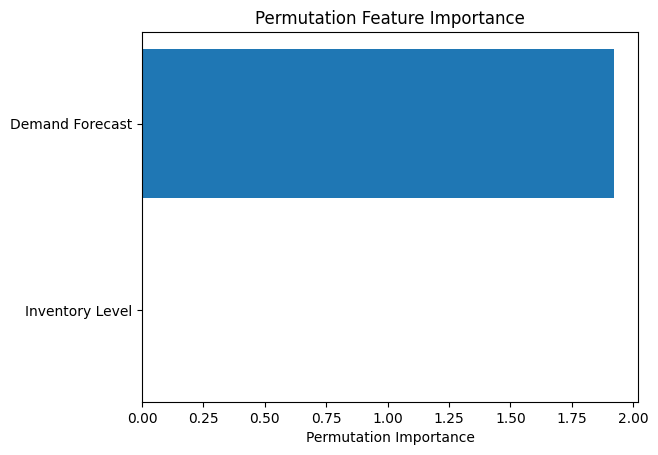

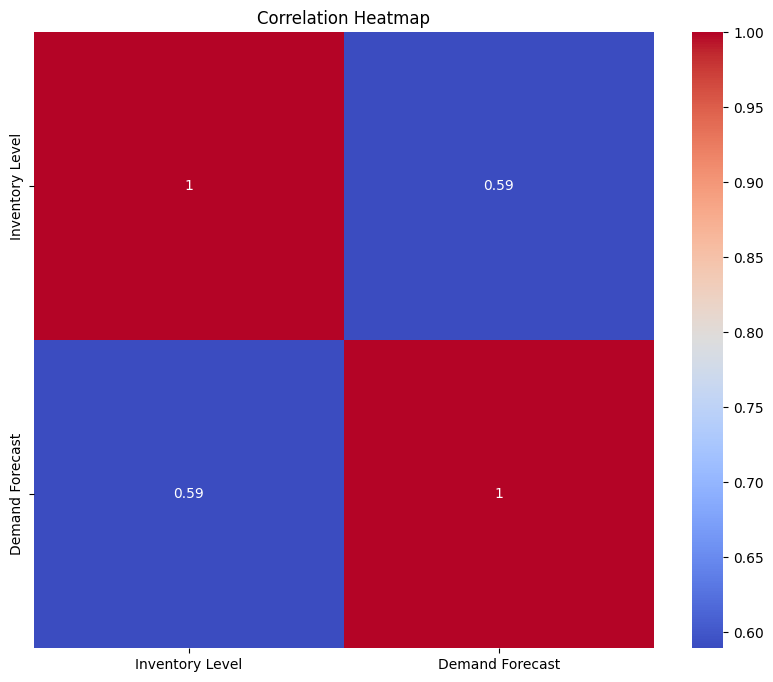

In [48]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from boruta import BorutaPy

# Load dataset
data = pd.read_csv('retail_store_inventory.csv')

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Encoding categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Feature Engineering
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data.drop(columns=['Date'], inplace=True)

# Define the target and features (you can choose any other target as needed)
target = 'Units Sold'
X = data.drop(columns=[target])
y = data[target]

# Feature Selection using Boruta
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)
boruta_selector.fit(X.values, y.values)
selected_features = X.columns[boruta_selector.support_]

# Filter selected features
X = X[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert back to DataFrame to retain feature names after scaling
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_test_df = pd.DataFrame(X_test, columns=selected_features)

# Train a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_df, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(rf_model, X_test_df, y_test, n_repeats=10, random_state=42)

# Plotting feature importances
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test_df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.show()

# Display Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\881418937.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\881418937.py:33: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  if skew(data[col]) > 1:  # Apply transformation to highly skewed columns


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	13


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	13


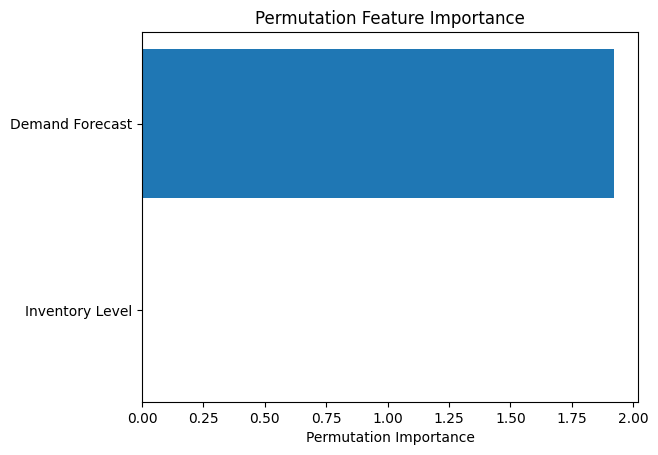

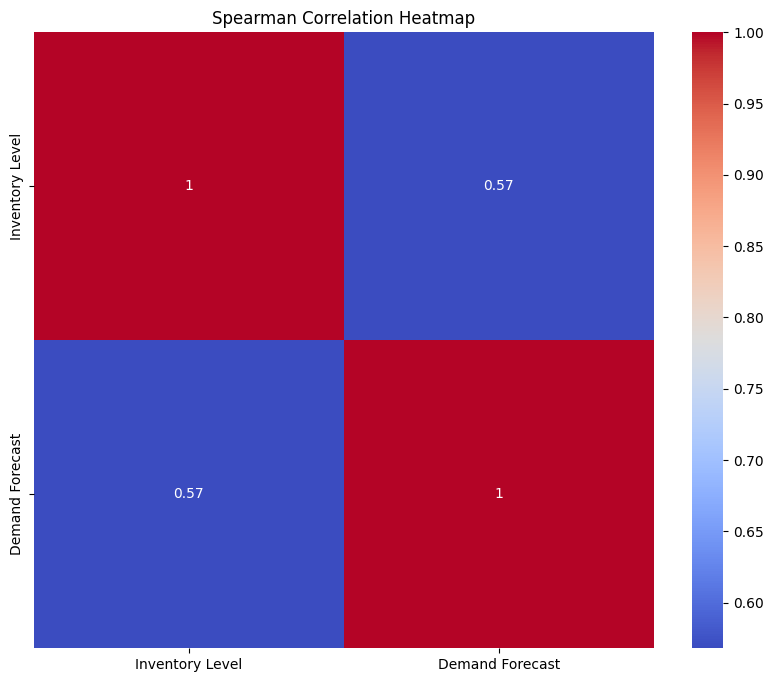

In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from boruta import BorutaPy
from scipy.stats import boxcox
from scipy.stats import skew

# Load dataset
data = pd.read_csv('retail_store_inventory.csv')

# Handle missing values (Forward Fill)
data.fillna(method='ffill', inplace=True)

# Encoding categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Feature Engineering
data['Date'] = pd.to_datetime(data['Date'])
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data.drop(columns=['Date'], inplace=True)

# Handle Skewed Data Using Log Transformation or Box-Cox Transformation
numeric_cols = data.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if skew(data[col]) > 1:  # Apply transformation to highly skewed columns
        data[col], _ = boxcox(data[col] + 1)  # Apply Box-Cox transformation

# Define the target and features (Target: 'Units Sold')
target = 'Units Sold'
X = data.drop(columns=[target])
y = data[target]

# Feature Selection using Boruta
rf = RandomForestRegressor(n_jobs=-1, random_state=42)
boruta_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42)
boruta_selector.fit(X.values, y.values)
selected_features = X.columns[boruta_selector.support_]

# Filter selected features
X = X[selected_features]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert back to DataFrame to retain feature names after scaling
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_test_df = pd.DataFrame(X_test, columns=selected_features)

# Train a RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_df, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(rf_model, X_test_df, y_test, n_repeats=10, random_state=42)

# Plotting feature importances
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test_df.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Permutation Feature Importance")
plt.show()

# Display Correlation Heatmap (Using Spearman for Skewed Data)
plt.figure(figsize=(10, 8))
spearman_corr = X_train_df.corr(method='spearman')  # Spearman correlation is more robust for skewed data
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Heatmap")
plt.show()


C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\3553474572.py:13: FutureWarning: The provided callable <function mean at 0x000001827F5BDEE0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = data.pivot_table(values='Demand Forecast',


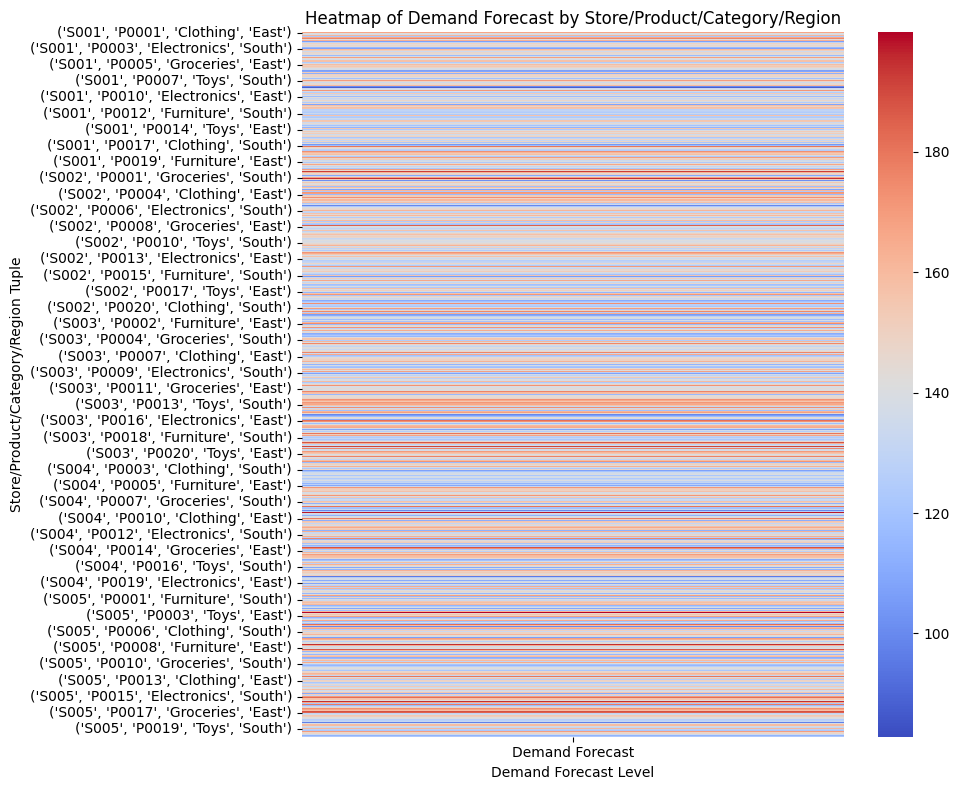

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('retail_store_inventory.csv')

# Create a tuple combination of 'Store ID', 'Product ID', 'Category', 'Region'
data['Store_Product_Category_Region'] = list(zip(data['Store ID'], data['Product ID'], data['Category'], data['Region']))

# Create a pivot table with the tuple and 'Demand Forecast' to calculate the mean of 'Demand Forecast'
pivot_table = data.pivot_table(values='Demand Forecast', 
                               index='Store_Product_Category_Region', 
                               aggfunc=np.mean)

# Reset the index to use for heatmap preparation
pivot_table.reset_index(inplace=True)

# Prepare DataFrame for heatmap (we use pivot_table results directly for simplicity)
heatmap_data = pivot_table.pivot_table(values='Demand Forecast', index='Store_Product_Category_Region')

# Plotting heatmap for demand forecast using calculated means
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=False, cmap='coolwarm', cbar=True)
plt.title("Heatmap of Demand Forecast by Store/Product/Category/Region")
plt.xlabel("Demand Forecast Level")
plt.ylabel("Store/Product/Category/Region Tuple")
plt.tight_layout()
plt.show()


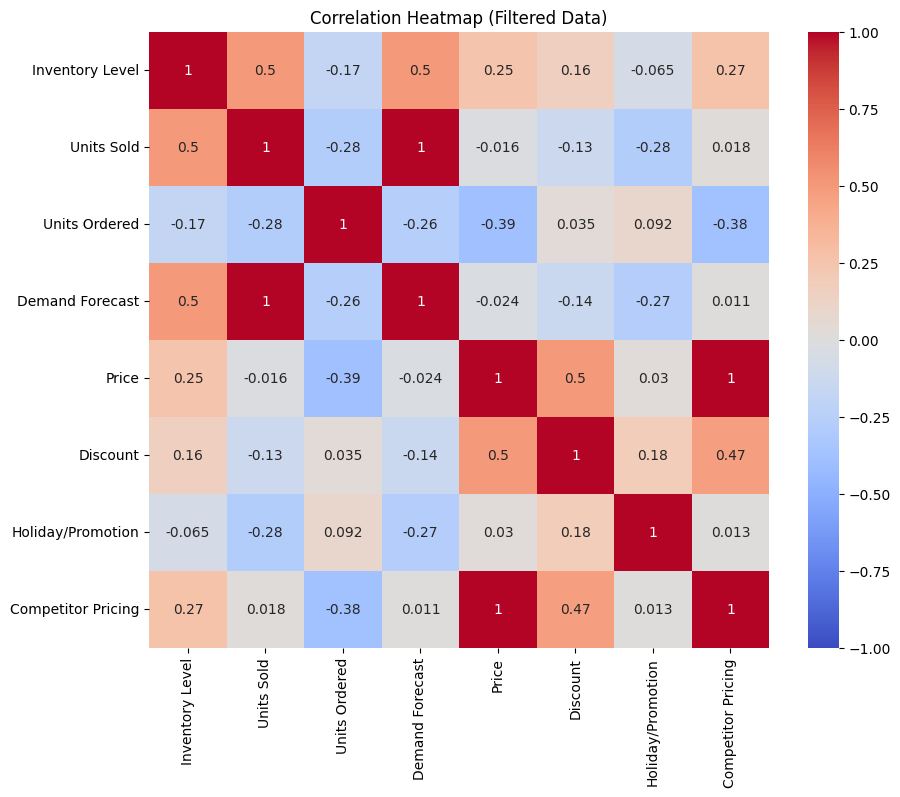

Filtered Data Shape: (34, 11)
Filtered Data Summary:
       Inventory Level  Units Sold  Units Ordered  Demand Forecast      Price  \
count        34.000000   34.000000      34.000000        34.000000  34.000000   
mean        244.470588  103.264706     106.529412       108.260882  55.552647   
std         134.826091  102.020589      52.988984       103.598975  26.141453   
min          51.000000    0.000000      21.000000        -9.290000  13.180000   
25%         121.000000   24.500000      63.000000        31.510000  35.642500   
50%         246.500000   67.500000      94.000000        78.955000  56.100000   
75%         326.250000  213.000000     155.250000       220.790000  74.835000   
max         493.000000  299.000000     198.000000       307.870000  98.510000   

        Discount  Holiday/Promotion  Competitor Pricing  
count  34.000000          34.000000           34.000000  
mean    8.382353           0.558824           56.162647  
std     8.503171           0.503995        

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('retail_store_inventory.csv')

# Filtered data - Apply a broader filter instead of an exact combination
filtered_data = data[(data['Region'] == 'East') & (data['Store ID'] == 'S004') & (data['Category'] == 'Electronics')&(data['Product ID'] == 'P0019') ]

# Check if filtered data is empty
if filtered_data.empty:
    print("No data found for the given filtering criteria.")
else:
    # Drop constant columns (if any)
    filtered_data = filtered_data.loc[:, (filtered_data != filtered_data.iloc[0]).any()]

    # Calculating correlation on numeric columns
    numeric_data = filtered_data.select_dtypes(include=[np.number])
    corr = numeric_data.corr()

    # Plotting the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Correlation Heatmap (Filtered Data)")
    plt.show()

    # Display filtered data shape and basic summary
    print(f"Filtered Data Shape: {filtered_data.shape}")
    print("Filtered Data Summary:")
    print(filtered_data.describe())


In [35]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('retail_store_inventory.csv')

# List of tuples from the image to filter and analyze
tuples_list = [
    ('S001', 'P0001', 'Clothing', 'East'), ('S001', 'P0003', 'Electronics', 'South'), 
    ('S001', 'P0005', 'Groceries', 'East'), ('500', 'P0007', 'Toys', 'South'), 
    ('S001', 'P0010', 'Electronics', 'East'), ('S001', 'P0012', 'Furniture', 'South'), 
    ('S001', 'P0014', 'Toys', 'East'), ('S001', 'P0017', 'Clothing', 'South'), 
    ('S001', 'P0019', 'Furniture', 'East'), ('S002', 'P0001', 'Groceries', 'South'), 
    ('S002', 'P0004', 'Clothing', 'East'), ('S002', 'P0006', 'Electronics', 'South'),
    ('S002', 'P0008', 'Groceries', 'East'), ('S002', 'P0010', 'Toys', 'South'), 
    ('S002', 'P0013', 'Electronics', 'East'), ('S002', 'P0015', 'Furniture', 'South'),
    ('S002', 'P0017', 'Toys', 'East'), ('S002', 'P0020', 'Clothing', 'South'), 
    ('S003', 'P0002', 'Furniture', 'East'), ('5003', 'P0004', 'Groceries', 'South'), 
    ('S003', 'P0007', 'Clothing', 'East'), ('S003', 'P0009', 'Electronics', 'South'),
    ('S003', 'P0011', 'Groceries', 'East'), ('S003', 'P0013', 'Toys', 'South'),
    ('S003', 'P0016', 'Electronics', 'East'), ('S003', 'P0018', 'Furniture', 'South'),
    ('S003', 'P0020', 'Toys', 'East'), ('S004', 'P0003', 'Clothing', 'South'),
    ('S004', 'P0005', 'Furniture', 'East'), ('S004', 'P0007', 'Groceries', 'South'),
    ('S004', 'P0010', 'Clothing', 'East'), ('S004', 'P0012', 'Electronics', 'South'),
    ('S004', 'P0014', 'Groceries', 'East'), ('500', 'P0016', 'Toys', 'South'), 
    ('S004', 'P0019', 'Electronics', 'East'), ('S005', 'P0001', 'Furniture', 'South'),
    ('S005', 'P0003', 'Toys', 'East'), ('S005', 'P0006', 'Clothing', 'South'),
    ('S005', 'P0008', 'Furniture', 'East'), ('S005', 'P0010', 'Groceries', 'South'),
    ('S005', 'P0013', 'Clothing', 'East'), ('S005', 'P0015', 'Electronics', 'South'),
    ('S005', 'P0017', 'Groceries', 'East'), ('S005', 'P0019', 'Toys', 'South')
]

# Loop through each tuple, filter data, and calculate correlations with 'Demand Forecast'
for store, product, category, region in tuples_list:
    # Filter the data based on the current tuple
    filtered_data = data[(data['Store ID'] == store) & 
                         (data['Product ID'] == product) & 
                         (data['Category'] == category) & 
                         (data['Region'] == region)]
    
    # Check if there are enough rows to calculate meaningful correlations
    if filtered_data.shape[0] > 1:
        # Select numeric columns for correlation analysis
        numeric_data = filtered_data.select_dtypes(include=[np.number])
        
        # Calculate correlation matrix and extract 'Demand Forecast' correlations
        correlation_with_demand = numeric_data.corr()['Demand Forecast'].drop('Demand Forecast')
        
        # Print the tuple and its correlation results
        print(f"\nTuple: {store}, {product}, {category}, {region}")
        print(correlation_with_demand)
    else:
        print(f"\nTuple: {store}, {product}, {category}, {region} - Not enough data for correlation.")



Tuple: S001, P0001, Clothing, East
Inventory Level       0.525097
Units Sold            0.997452
Units Ordered         0.093847
Price                 0.040558
Discount              0.068470
Holiday/Promotion    -0.071252
Competitor Pricing    0.044804
Name: Demand Forecast, dtype: float64

Tuple: S001, P0003, Electronics, South
Inventory Level       0.812903
Units Sold            0.997403
Units Ordered         0.107014
Price                -0.379391
Discount             -0.044028
Holiday/Promotion    -0.048215
Competitor Pricing   -0.376231
Name: Demand Forecast, dtype: float64

Tuple: S001, P0005, Groceries, East
Inventory Level       0.546418
Units Sold            0.994768
Units Ordered         0.138159
Price                 0.106804
Discount             -0.182864
Holiday/Promotion    -0.295457
Competitor Pricing    0.143259
Name: Demand Forecast, dtype: float64

Tuple: 500, P0007, Toys, South - Not enough data for correlation.

Tuple: S001, P0010, Electronics, East
Inventory Level 

In [43]:
import pandas as pd
import numpy as np
from IPython.display import display

# Load dataset
data = pd.read_csv('retail_store_inventory.csv')

# Create the new feature: Discount * Price / Competitor Pricing
data['Discounted_Price_Ratio'] =  data['Competitor Pricing']-(data['Discount'] * data['Price'] )
data['Price_Ratio'] =  data['Price'] - data['Competitor Pricing']-( data['Price'] )


# Define tuples list
tuples_list = [
    ('S001', 'P0001', 'Clothing', 'East'), ('S001', 'P0003', 'Electronics', 'South'), 
    ('S001', 'P0005', 'Groceries', 'East'), ('500', 'P0007', 'Toys', 'South'), 
    ('S001', 'P0010', 'Electronics', 'East'), ('S001', 'P0012', 'Furniture', 'South'), 
    ('S001', 'P0014', 'Toys', 'East'), ('S001', 'P0017', 'Clothing', 'South'),
    ('S001', 'P0019', 'Furniture', 'East'), ('S002', 'P0001', 'Groceries', 'South'),
    ('S002', 'P0004', 'Clothing', 'East'), ('S002', 'P0006', 'Electronics', 'South'),
    ('S002', 'P0008', 'Groceries', 'East'), ('S002', 'P0010', 'Toys', 'South'),
    ('S002', 'P0013', 'Electronics', 'East'), ('S002', 'P0015', 'Furniture', 'South'),
    ('S002', 'P0017', 'Toys', 'East'), ('S002', 'P0020', 'Clothing', 'South'),
    ('S003', 'P0002', 'Furniture', 'East'), ('5003', 'P0004', 'Groceries', 'South'),
    ('S003', 'P0007', 'Clothing', 'East'), ('S003', 'P0009', 'Electronics', 'South'),
    ('S003', 'P0011', 'Groceries', 'East'), ('S003', 'P0013', 'Toys', 'South'),
    ('S003', 'P0016', 'Electronics', 'East'), ('S003', 'P0018', 'Furniture', 'South'),
    ('S003', 'P0020', 'Toys', 'East'), ('S004', 'P0003', 'Clothing', 'South'),
    ('S004', 'P0005', 'Furniture', 'East'), ('S004', 'P0007', 'Groceries', 'South'),
    ('S004', 'P0010', 'Clothing', 'East'), ('S004', 'P0012', 'Electronics', 'South'),
    ('S004', 'P0014', 'Groceries', 'East'), ('500', 'P0016', 'Toys', 'South'),
    ('S004', 'P0019', 'Electronics', 'East'), ('S005', 'P0001', 'Furniture', 'South'),
    ('S005', 'P0003', 'Toys', 'East'), ('S005', 'P0006', 'Clothing', 'South'),
    ('S005', 'P0008', 'Furniture', 'East'), ('S005', 'P0010', 'Groceries', 'South'),
    ('S005', 'P0013', 'Clothing', 'East'), ('S005', 'P0015', 'Electronics', 'South'),
    ('S005', 'P0017', 'Groceries', 'East'), ('S005', 'P0019', 'Toys', 'South')
]

# Loop through tuples, filter data, and compute correlations
correlation_results = []
for store, product, category, region in tuples_list:
    filtered_data = data[(data['Store ID'] == store) & 
                         (data['Product ID'] == product) & 
                         (data['Category'] == category) & 
                         (data['Region'] == region)]
    
    if filtered_data.shape[0] > 1:  # Check if sufficient data exists
        numeric_data = filtered_data.select_dtypes(include=[np.number])
        correlation_with_demand = numeric_data.corr()['Demand Forecast'].drop('Demand Forecast')
        correlation_dict = {
            'Tuple': f"({store}, {product}, {category}, {region})",
            **correlation_with_demand.to_dict()
        }
        correlation_results.append(correlation_dict)

# Create DataFrame for correlation results
correlation_df = pd.DataFrame(correlation_results)

# Highlight cells with correlation > 0.5
def highlight_high_corr(val):
    return 'color: green; font-weight: bold;' if val > 0.5 else ''

# Style and display the table with highlighting
styled_df = correlation_df.style.applymap(highlight_high_corr, subset=correlation_df.columns[1:])
display(styled_df)



C:\Users\sivas\AppData\Local\Temp\ipykernel_28812\4229278181.py:64: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = correlation_df.style.applymap(highlight_high_corr, subset=correlation_df.columns[1:])


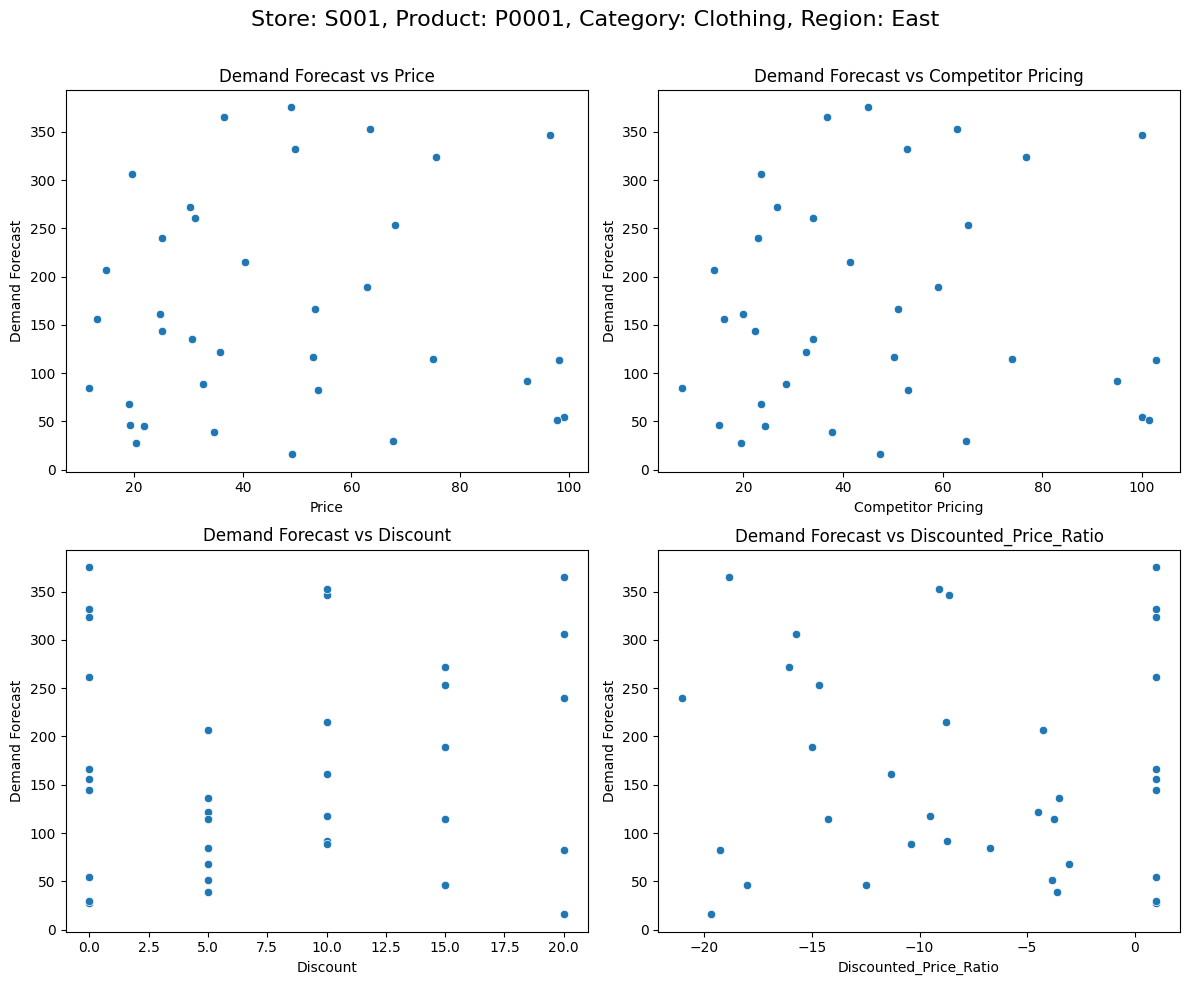

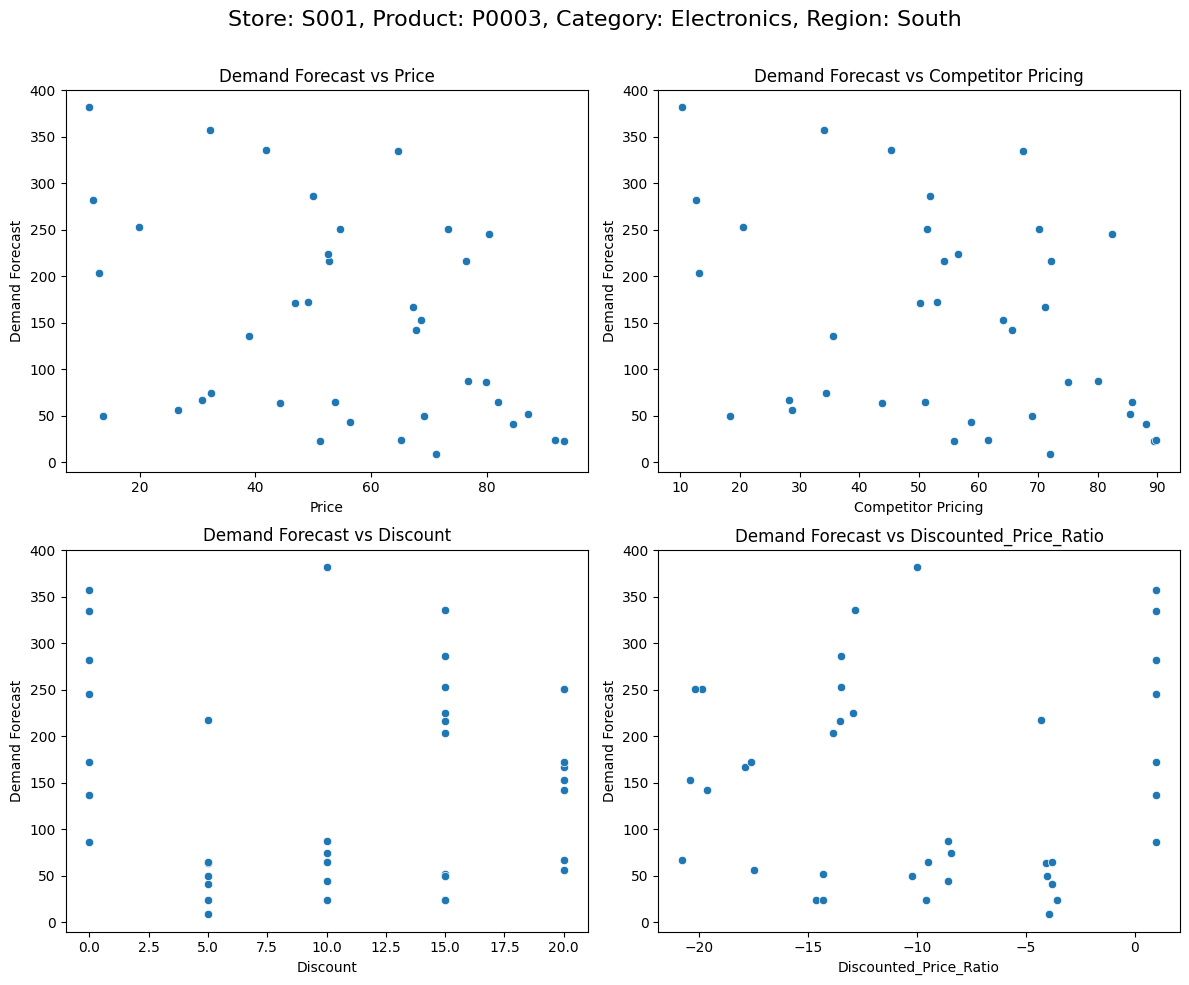

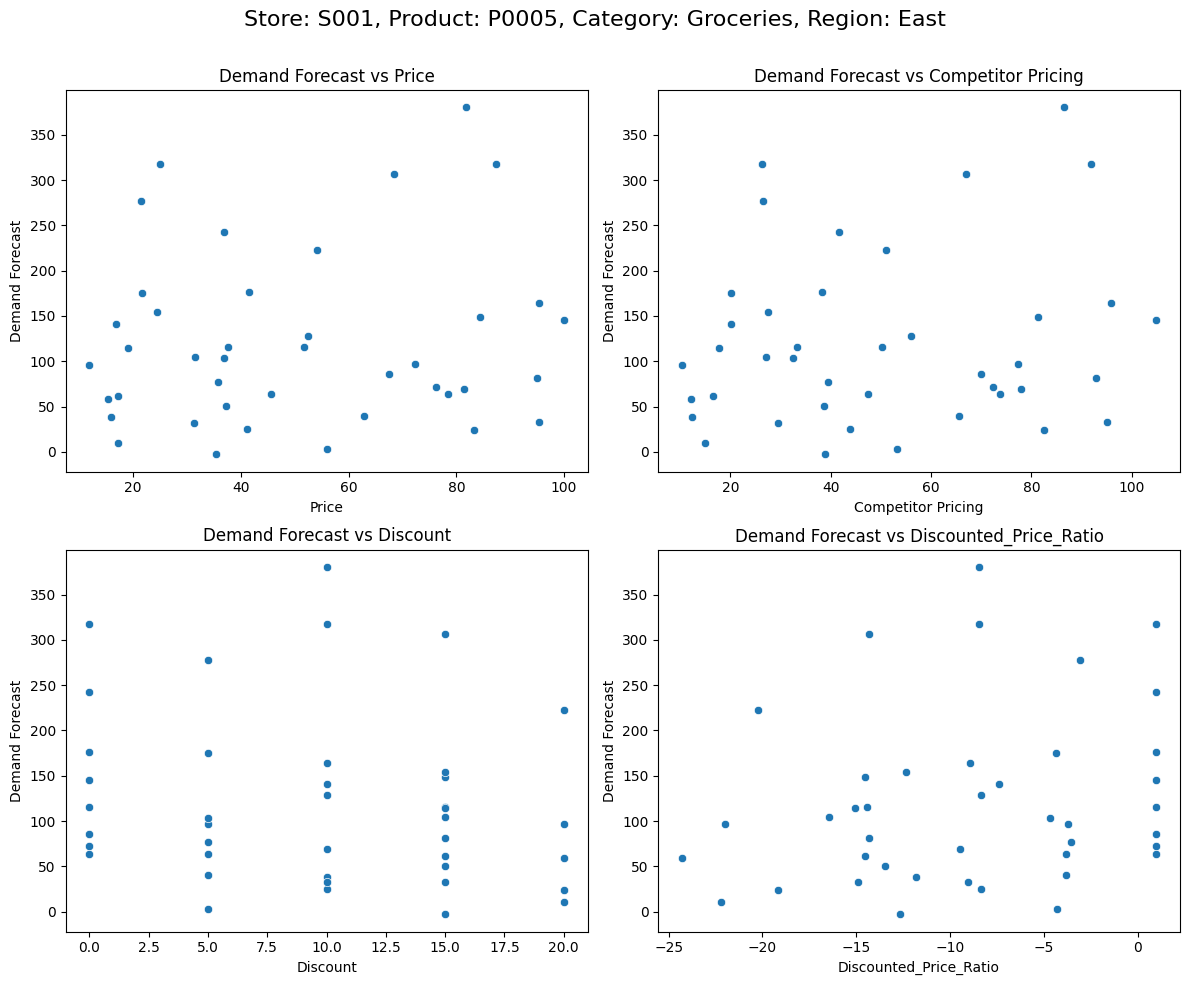

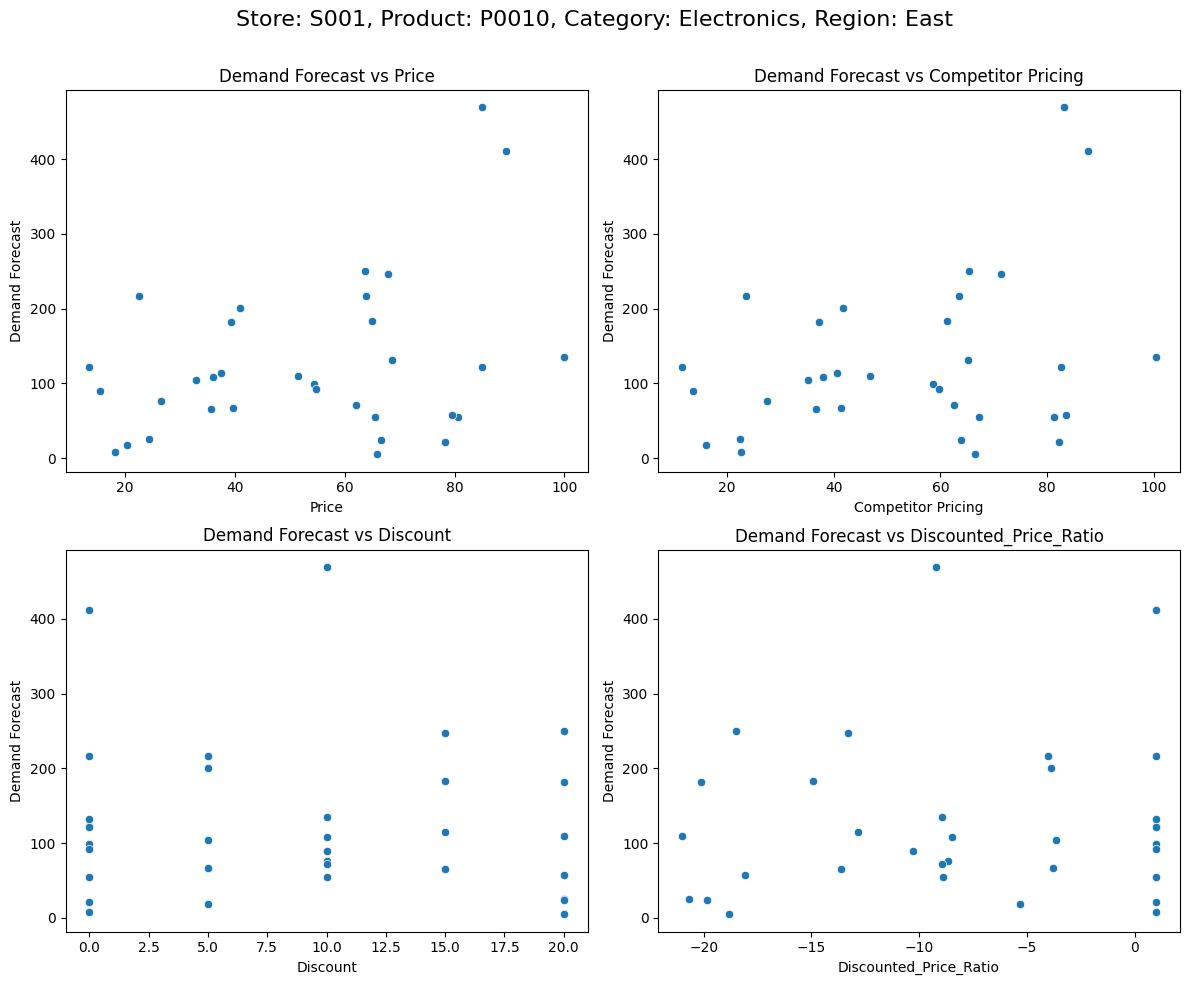

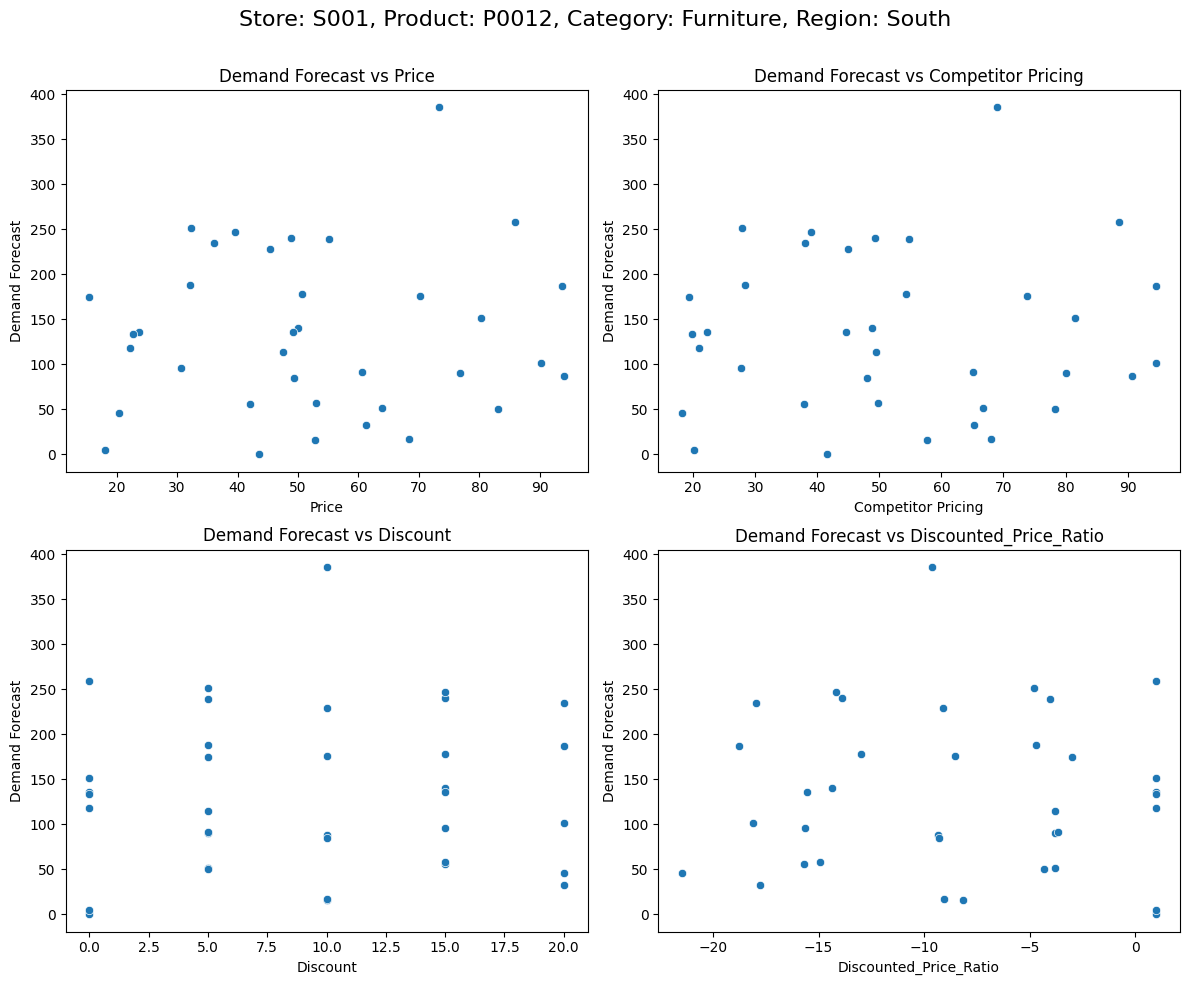

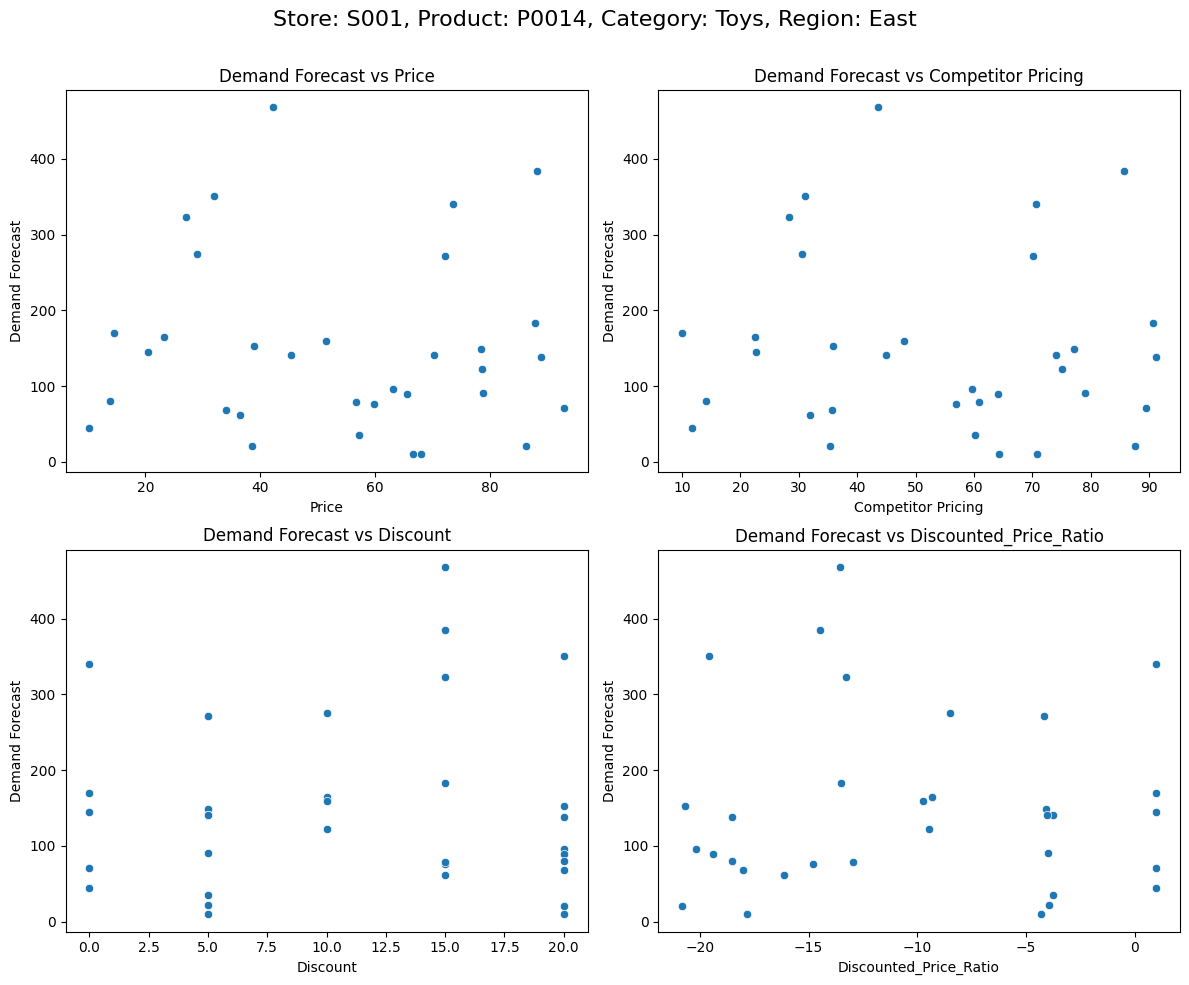

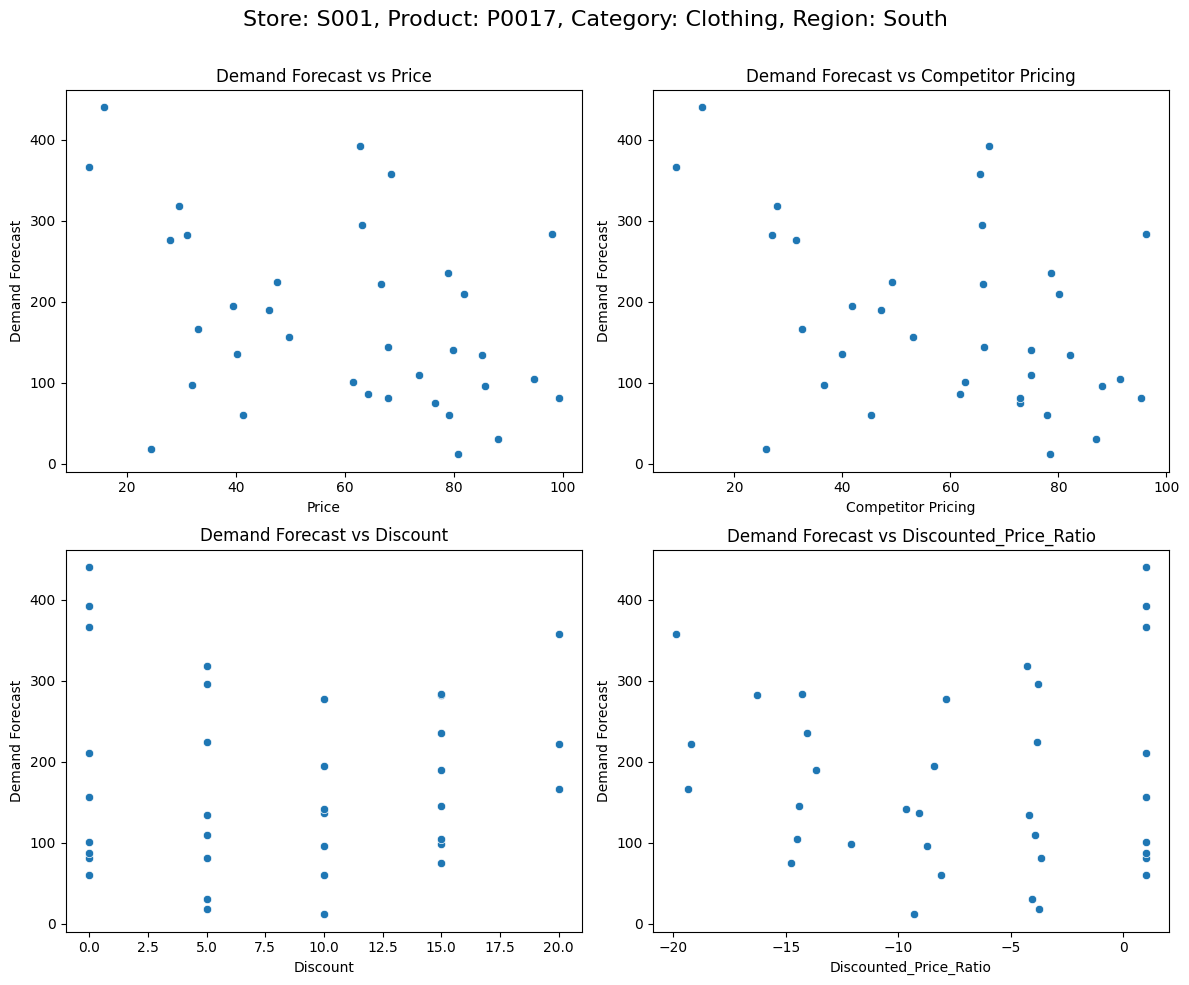

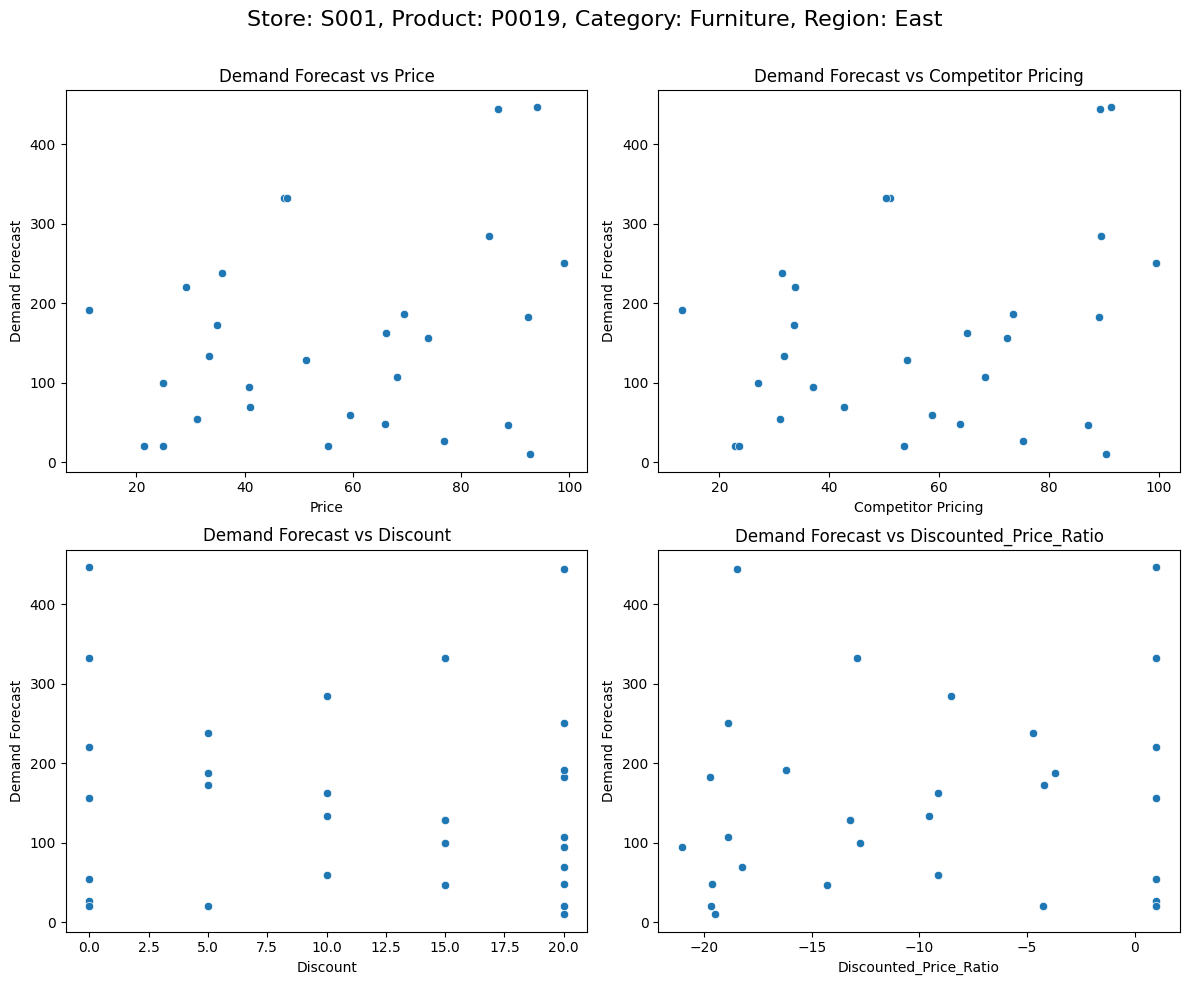

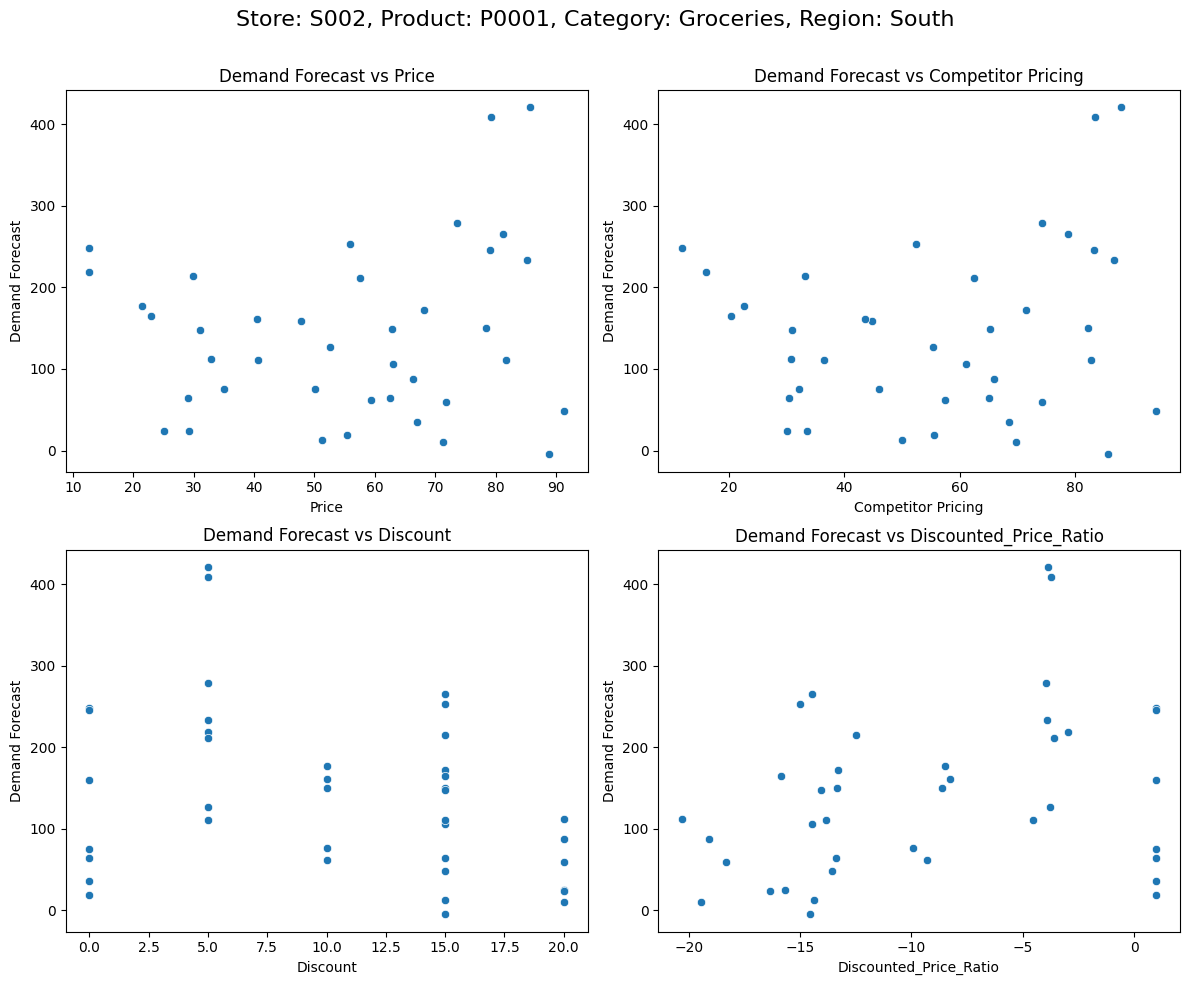

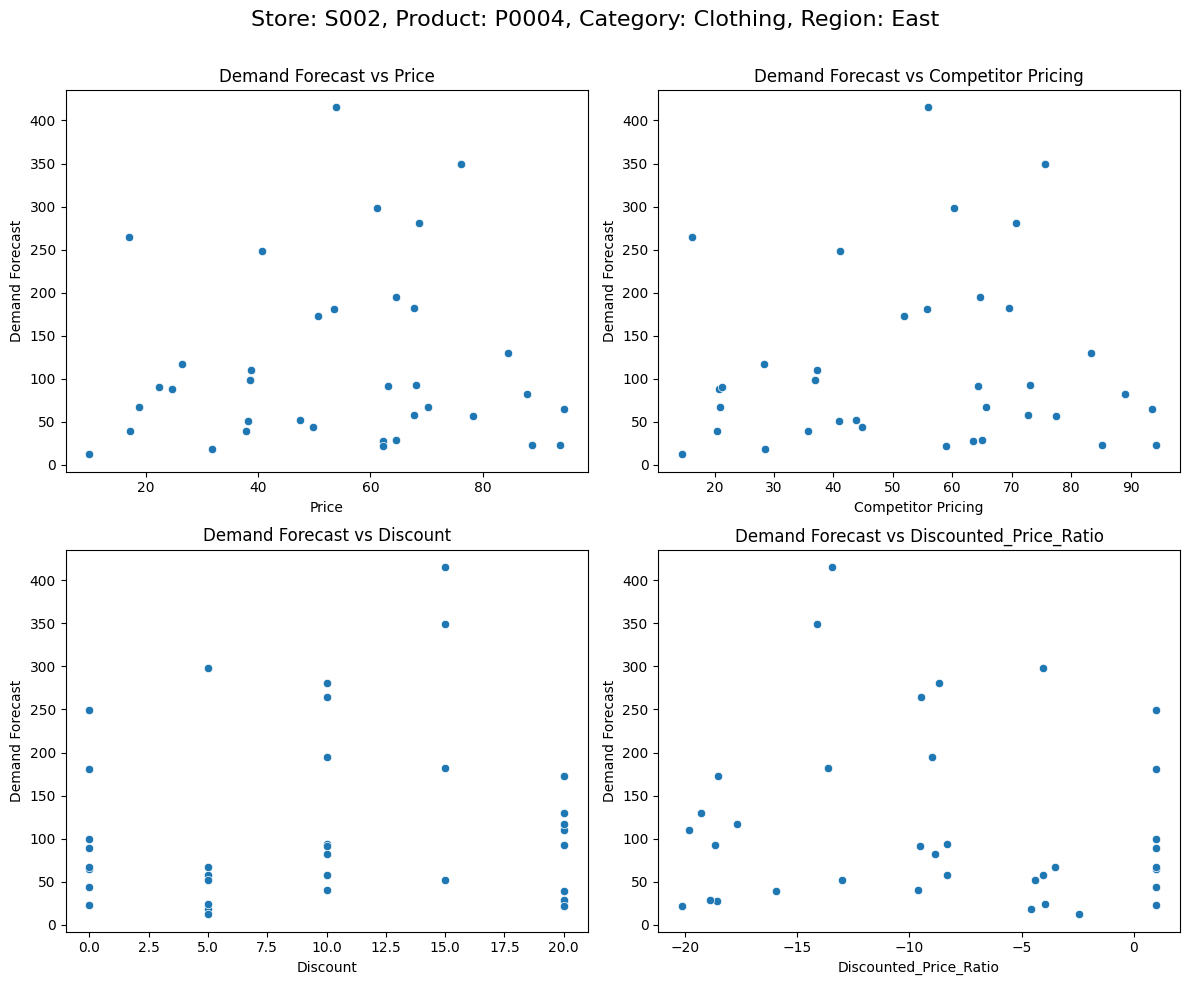

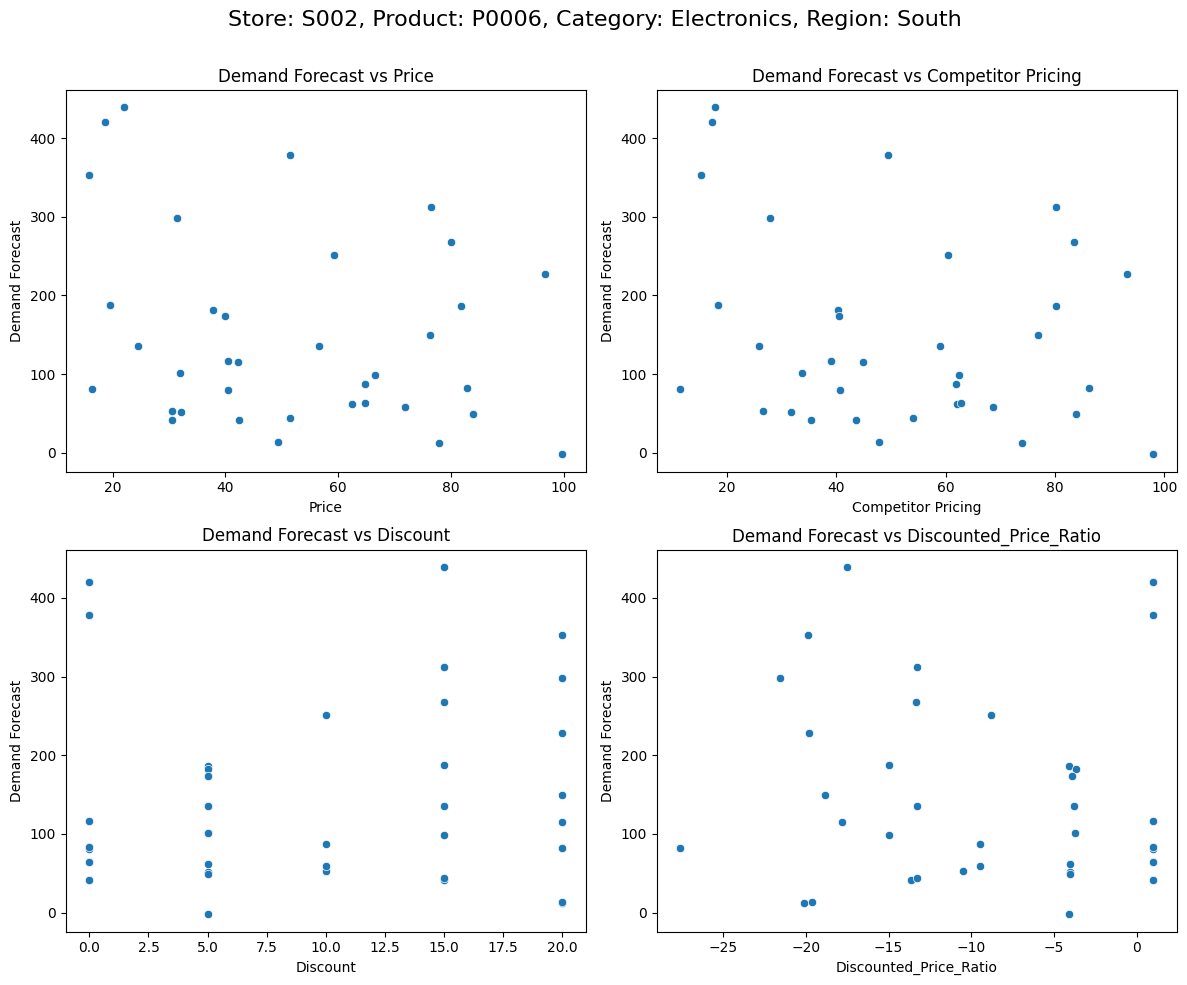

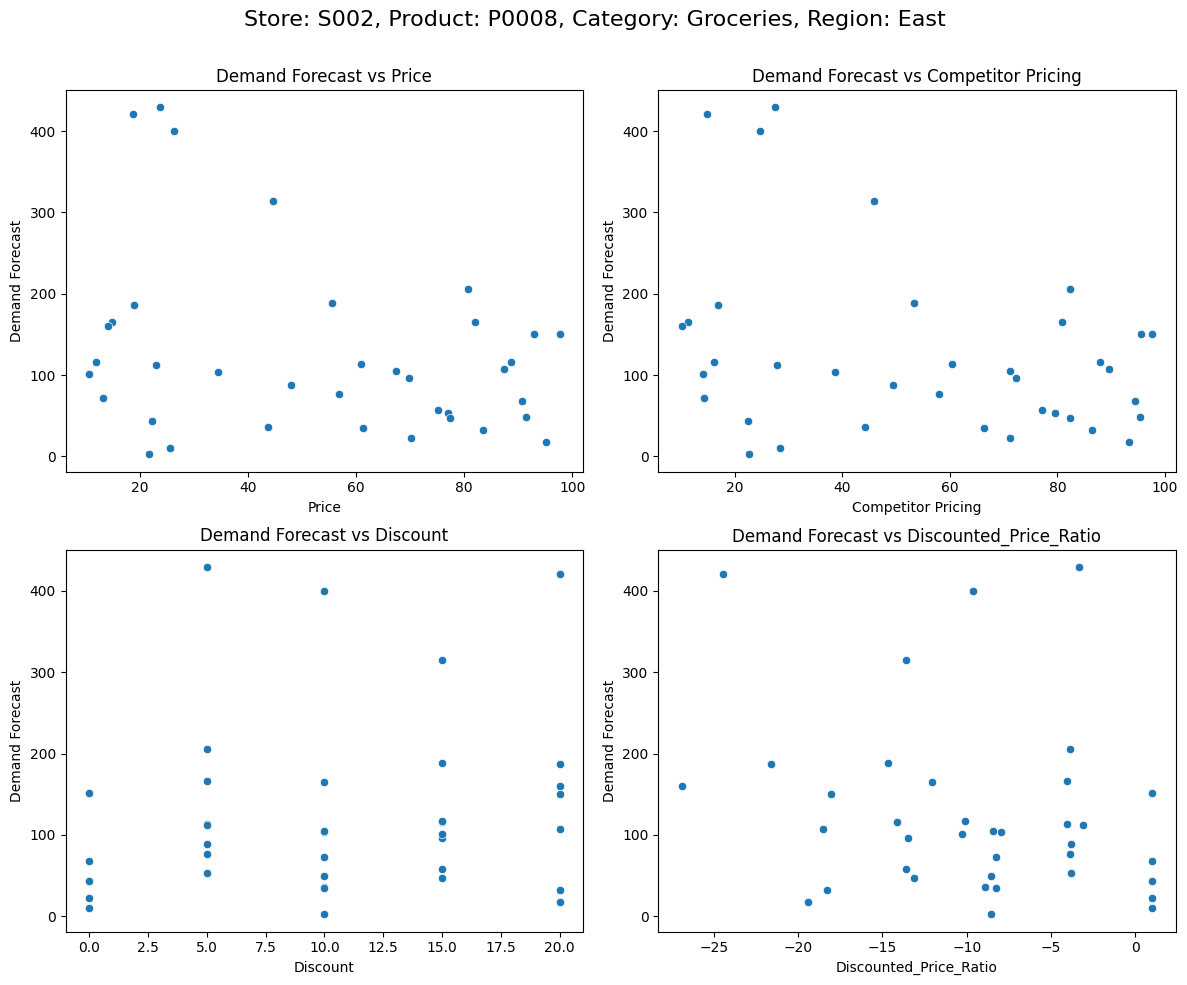

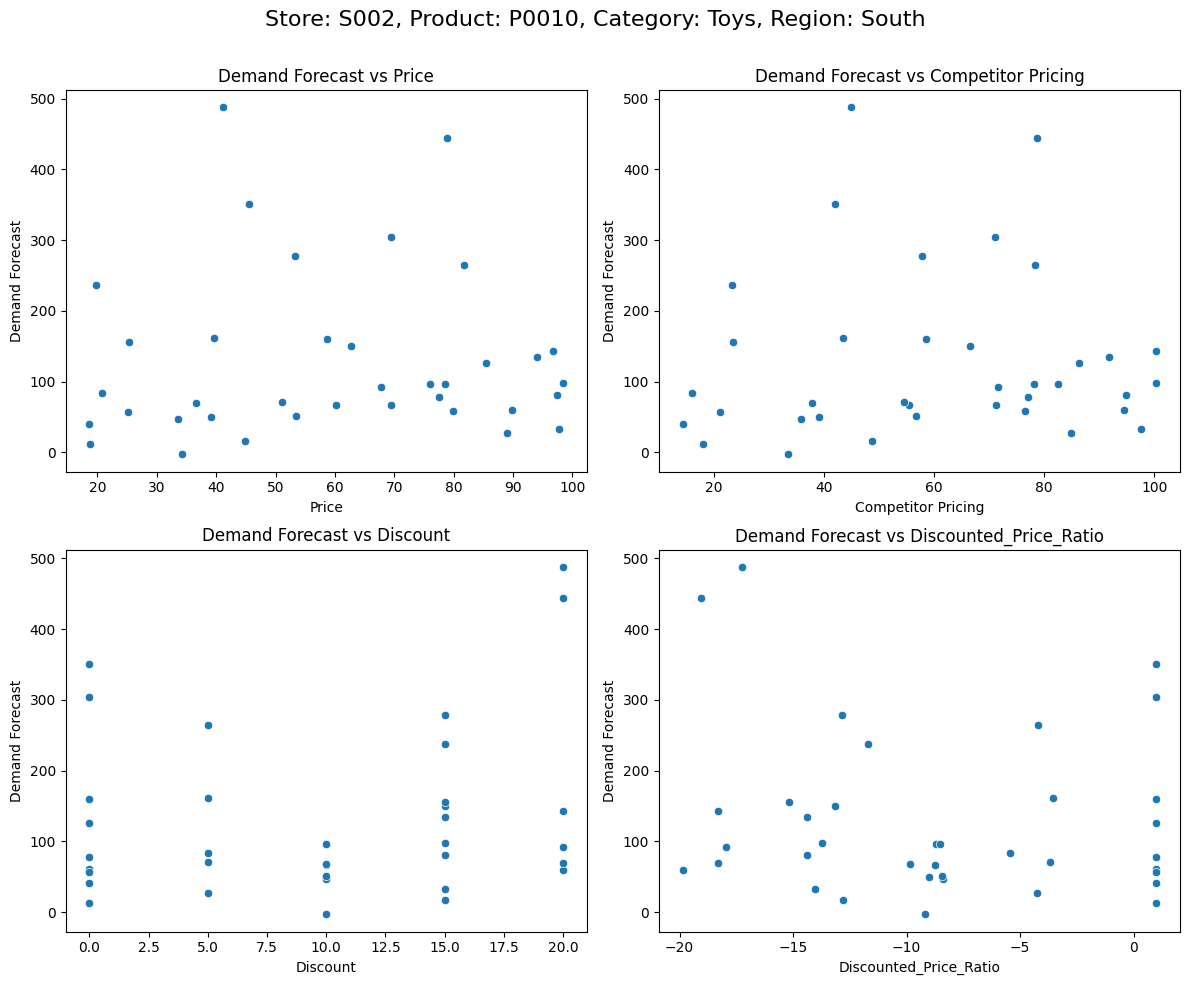

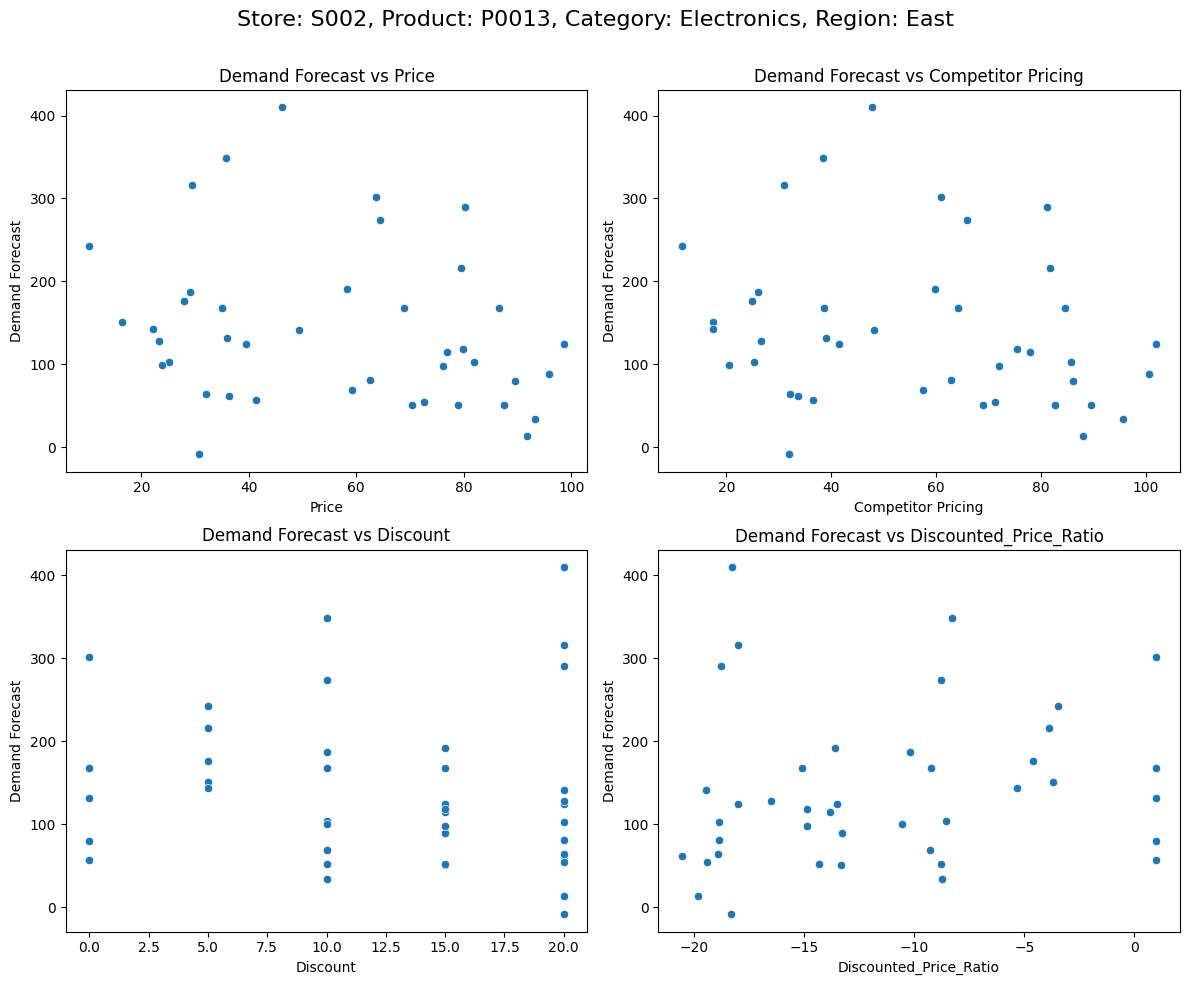

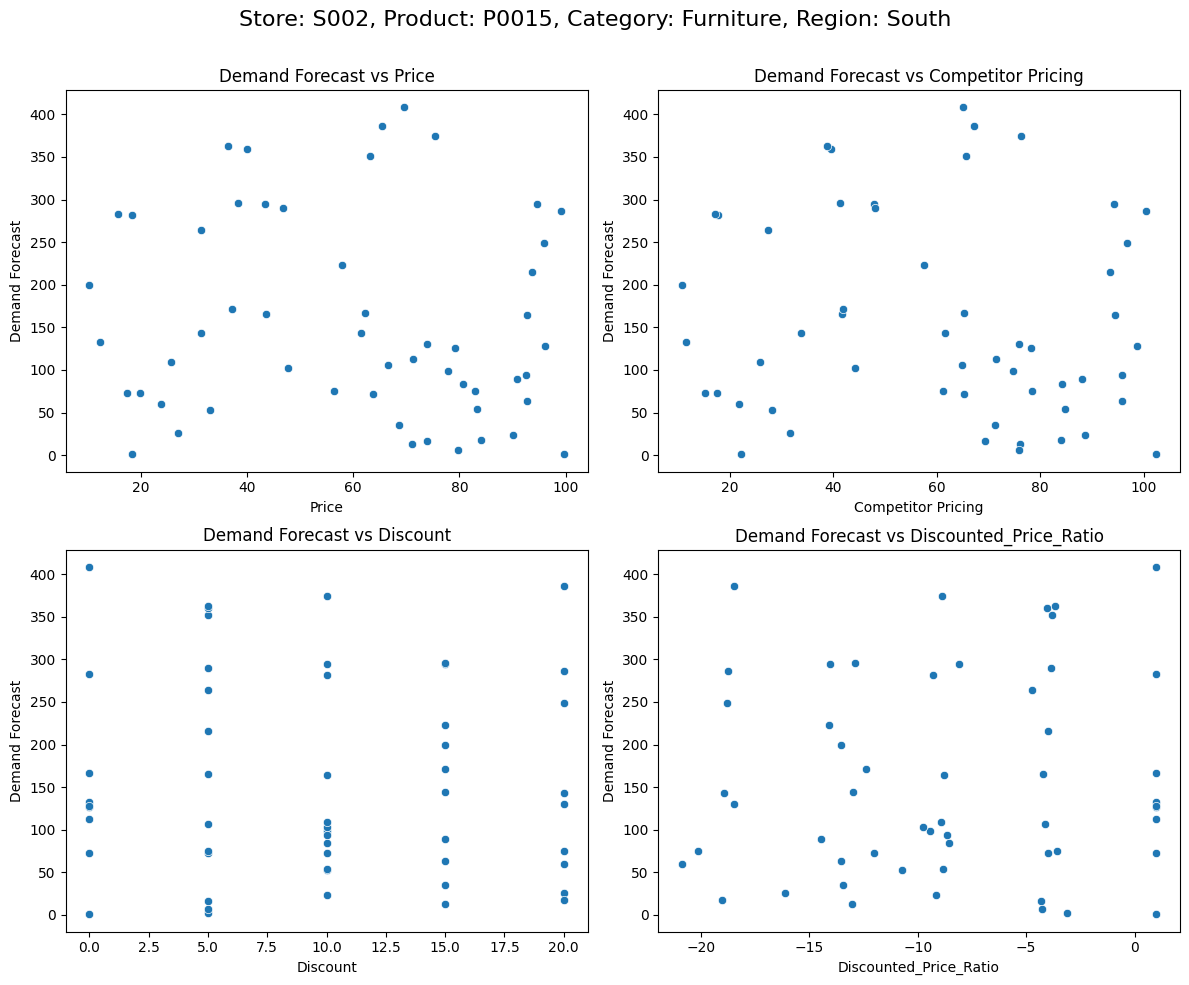

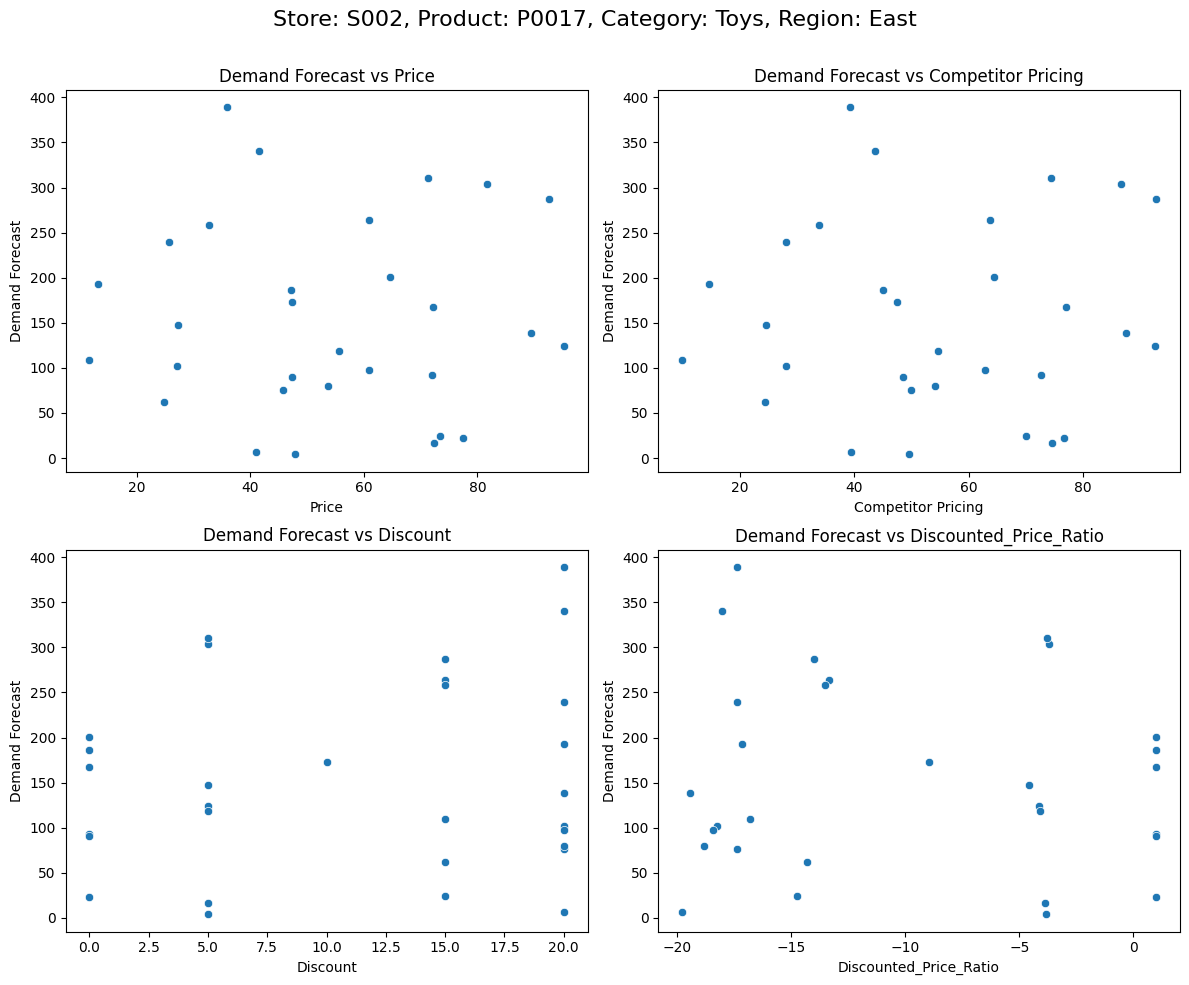

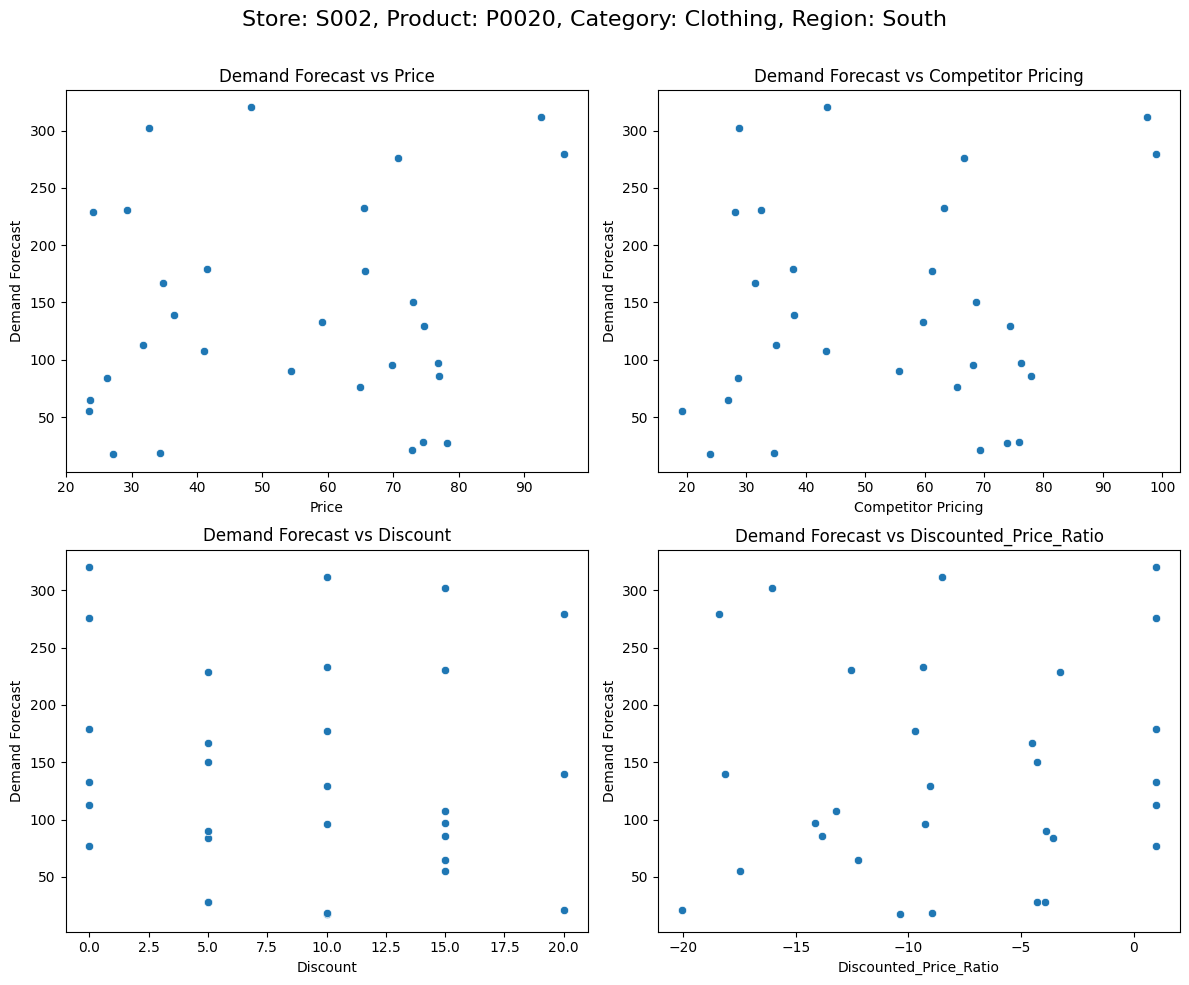

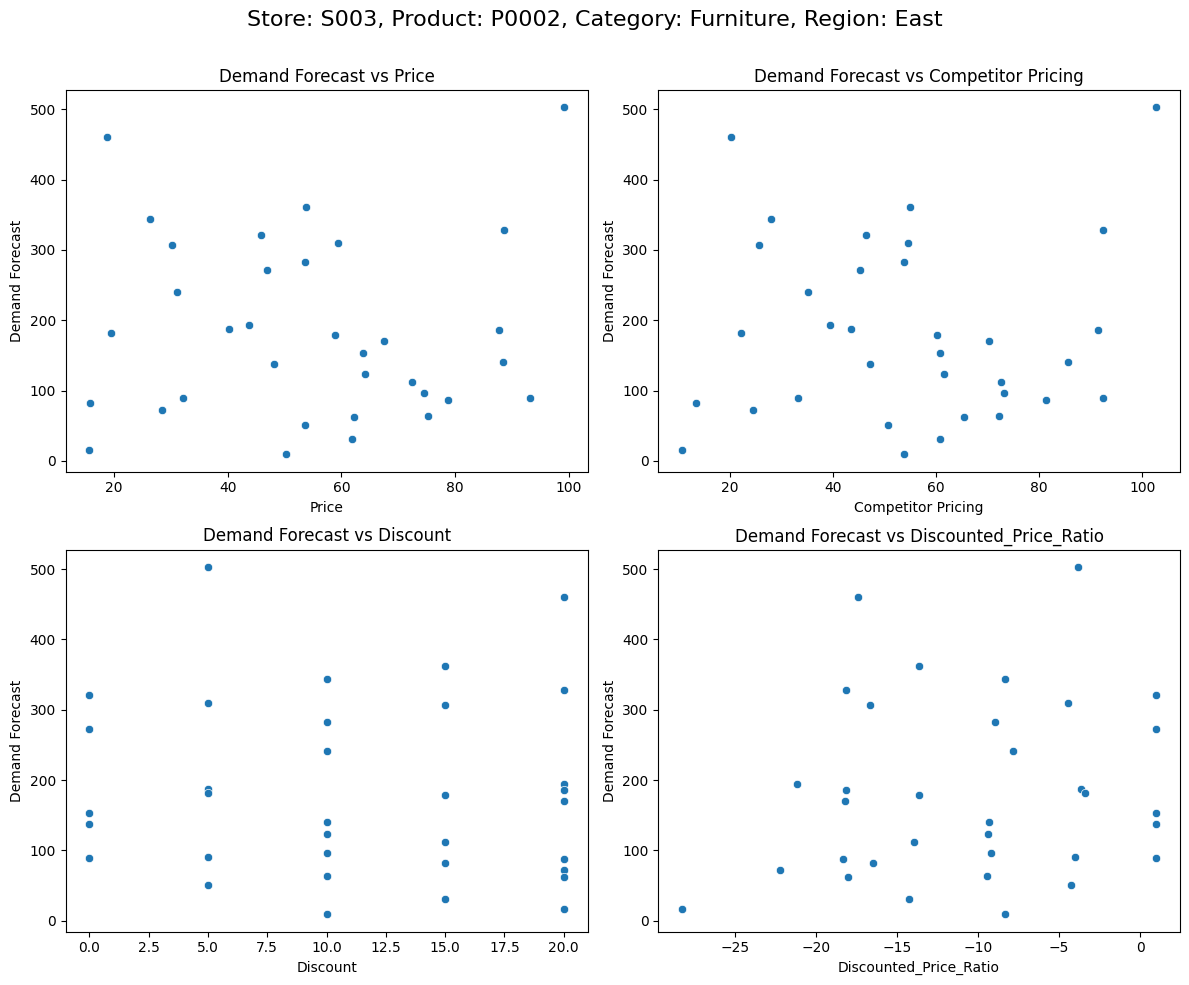

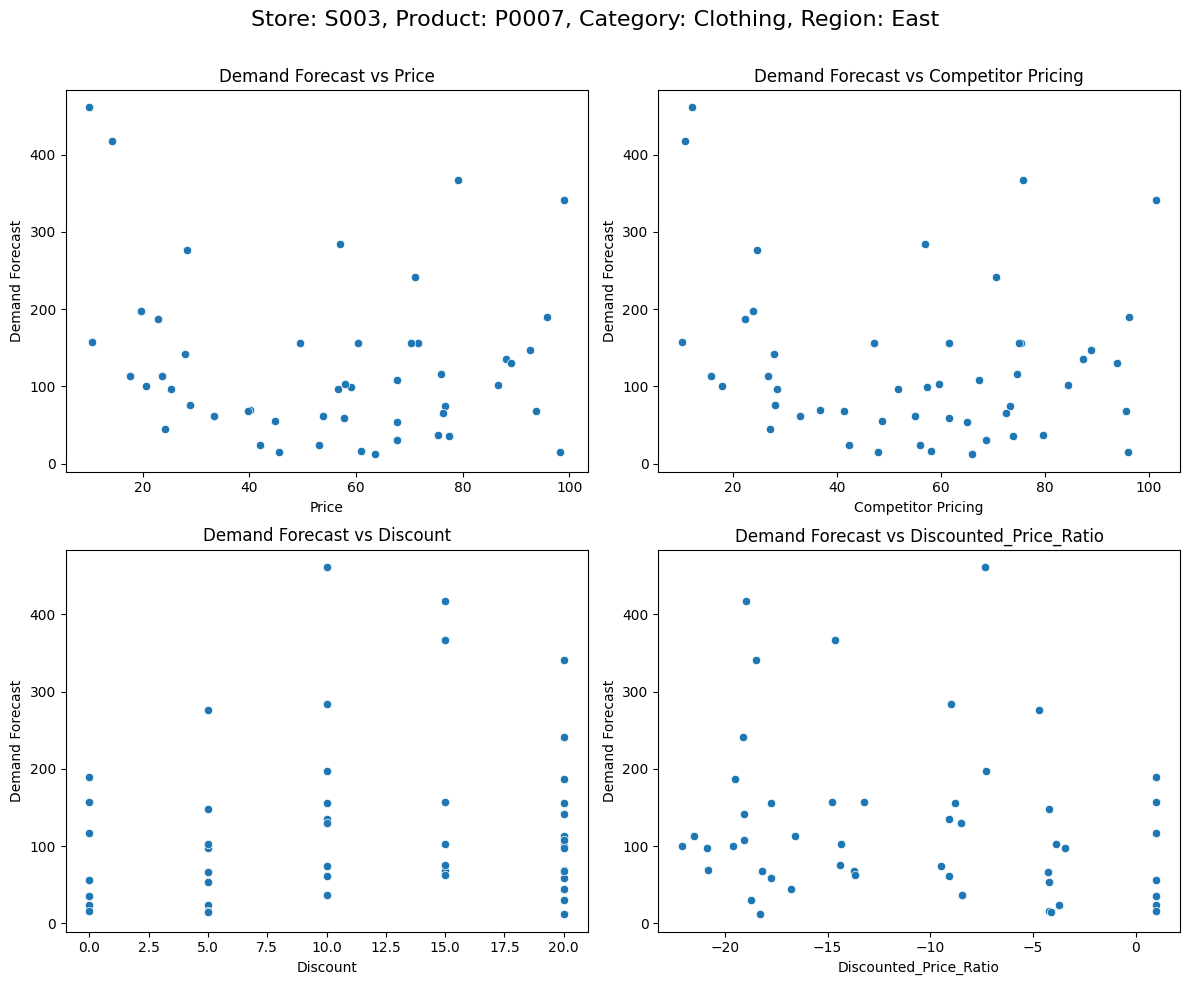

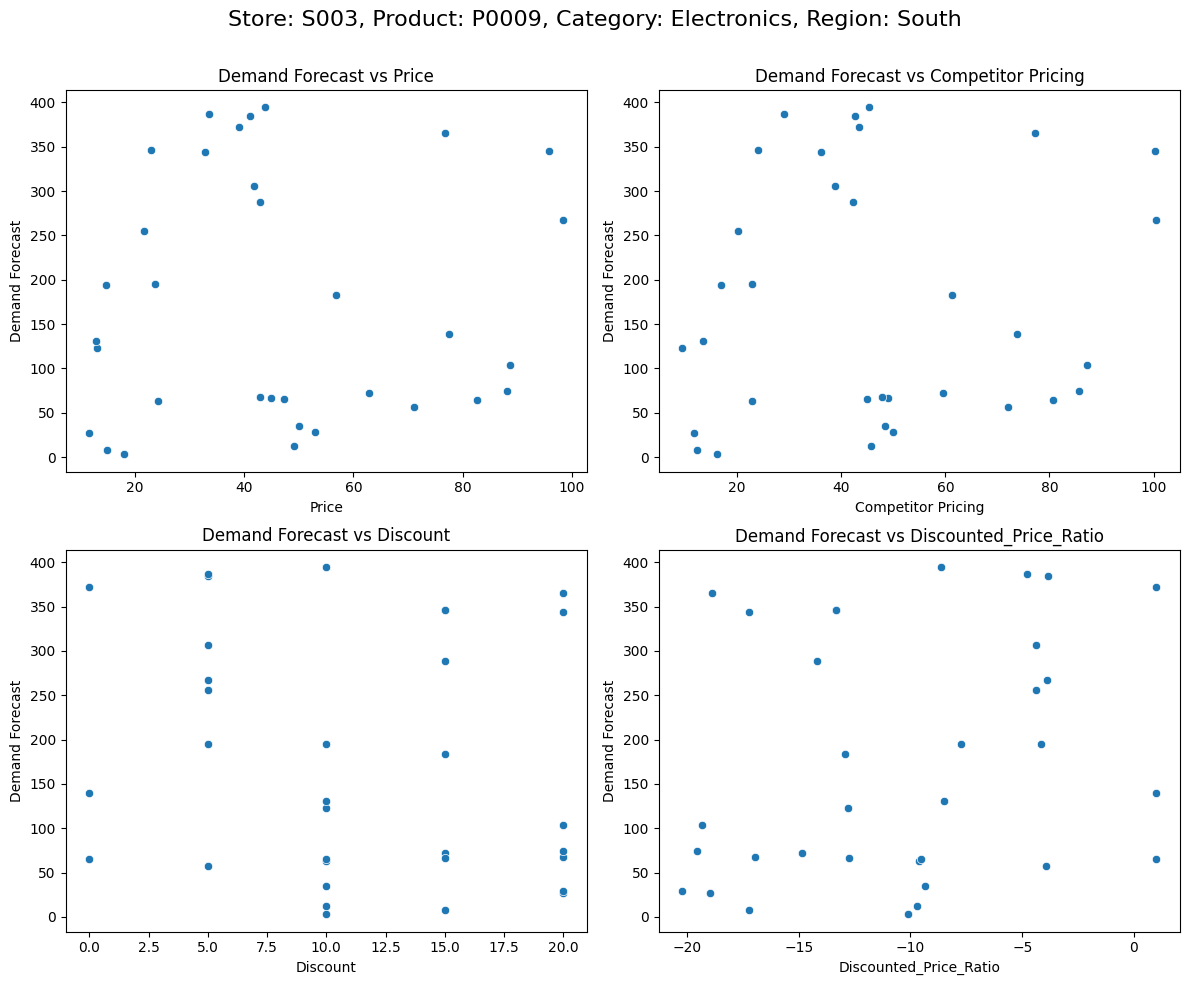

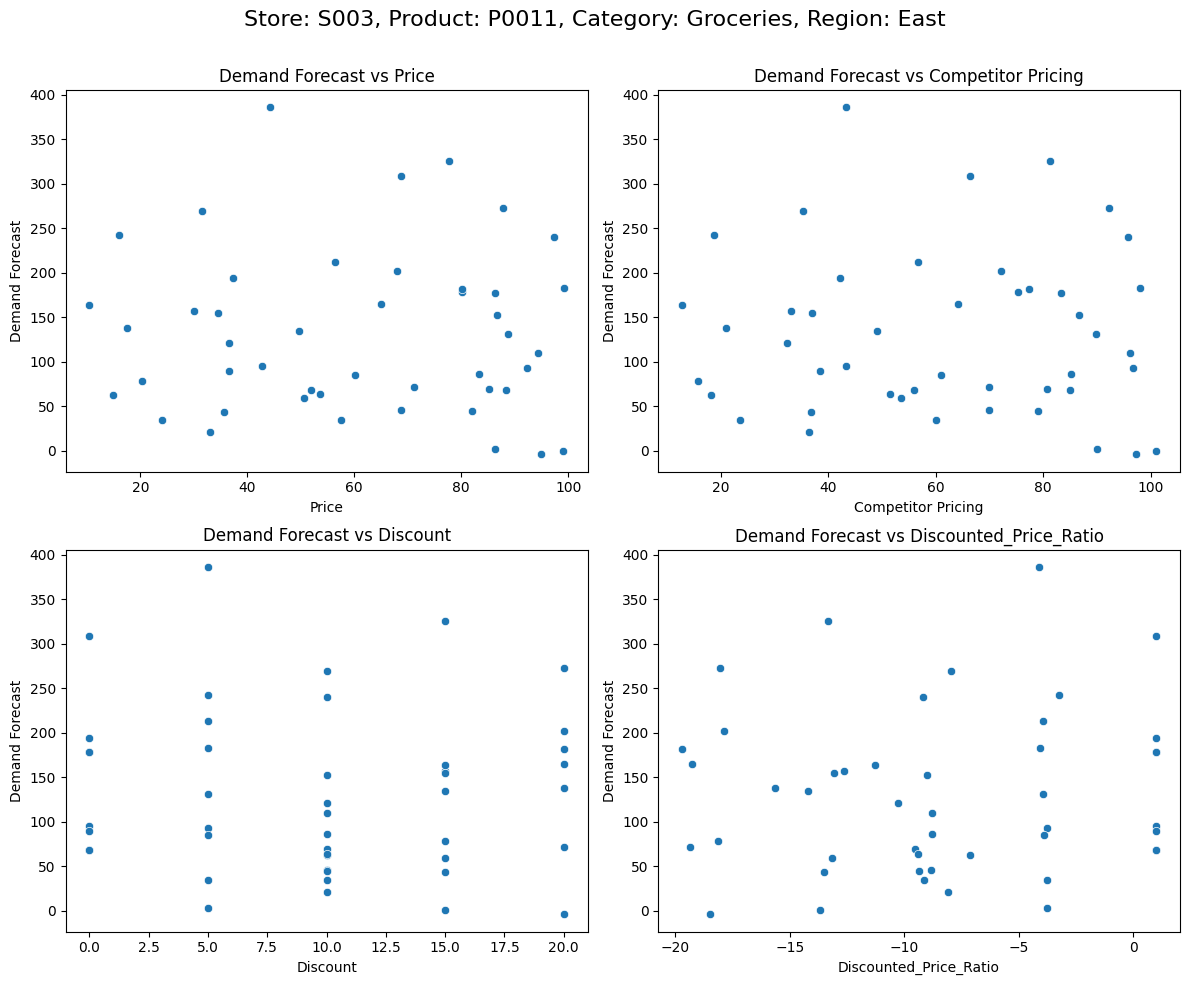

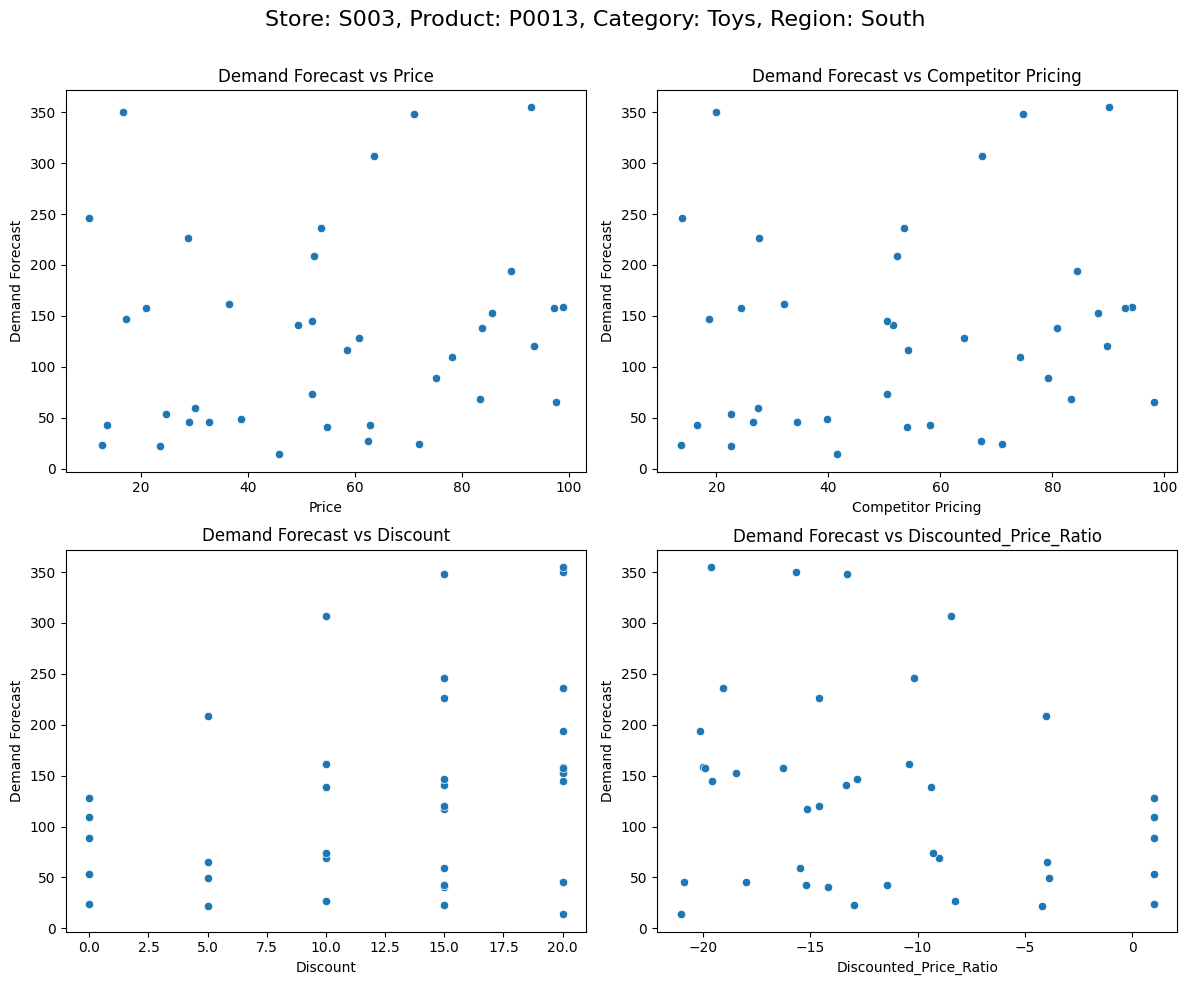

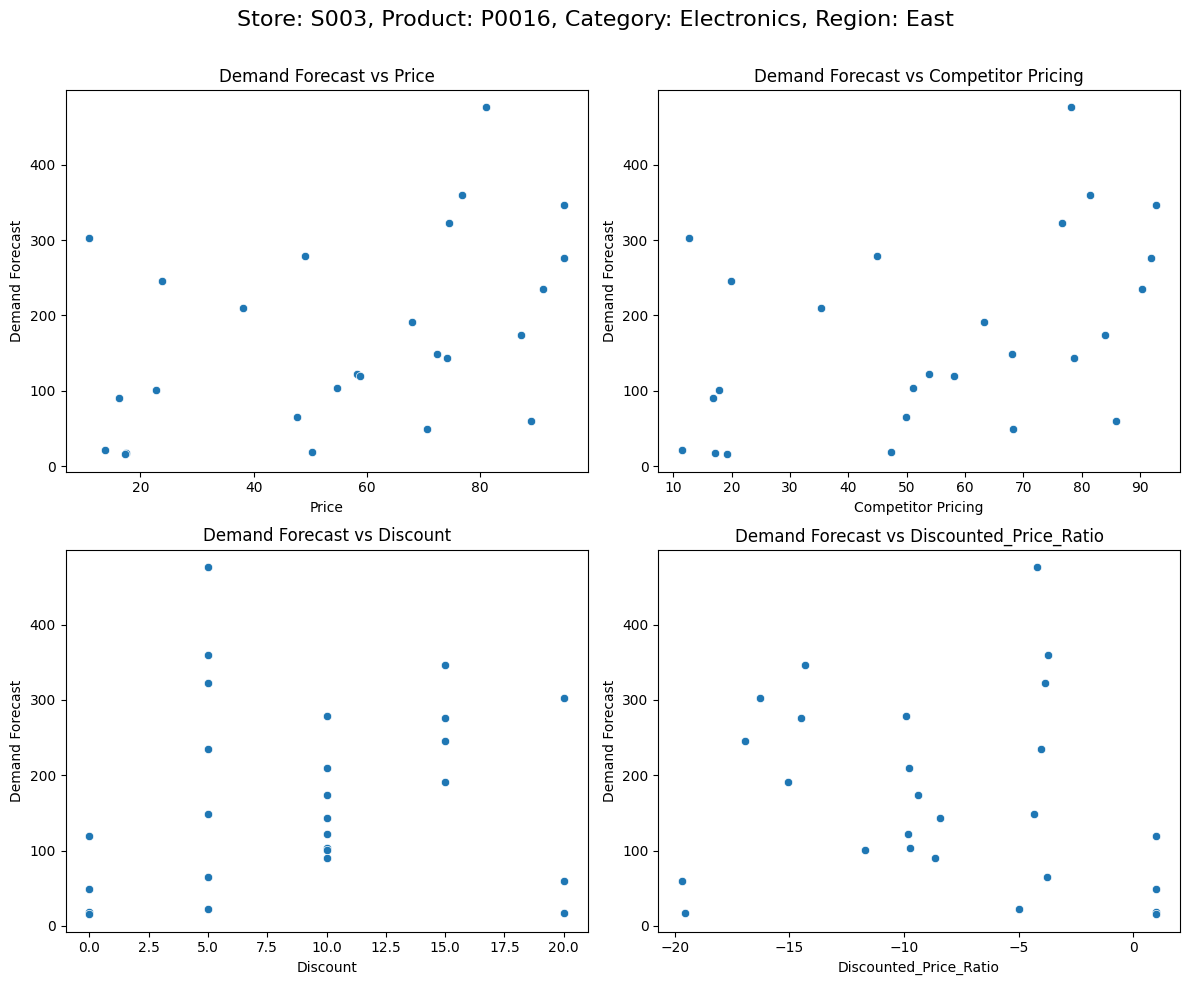

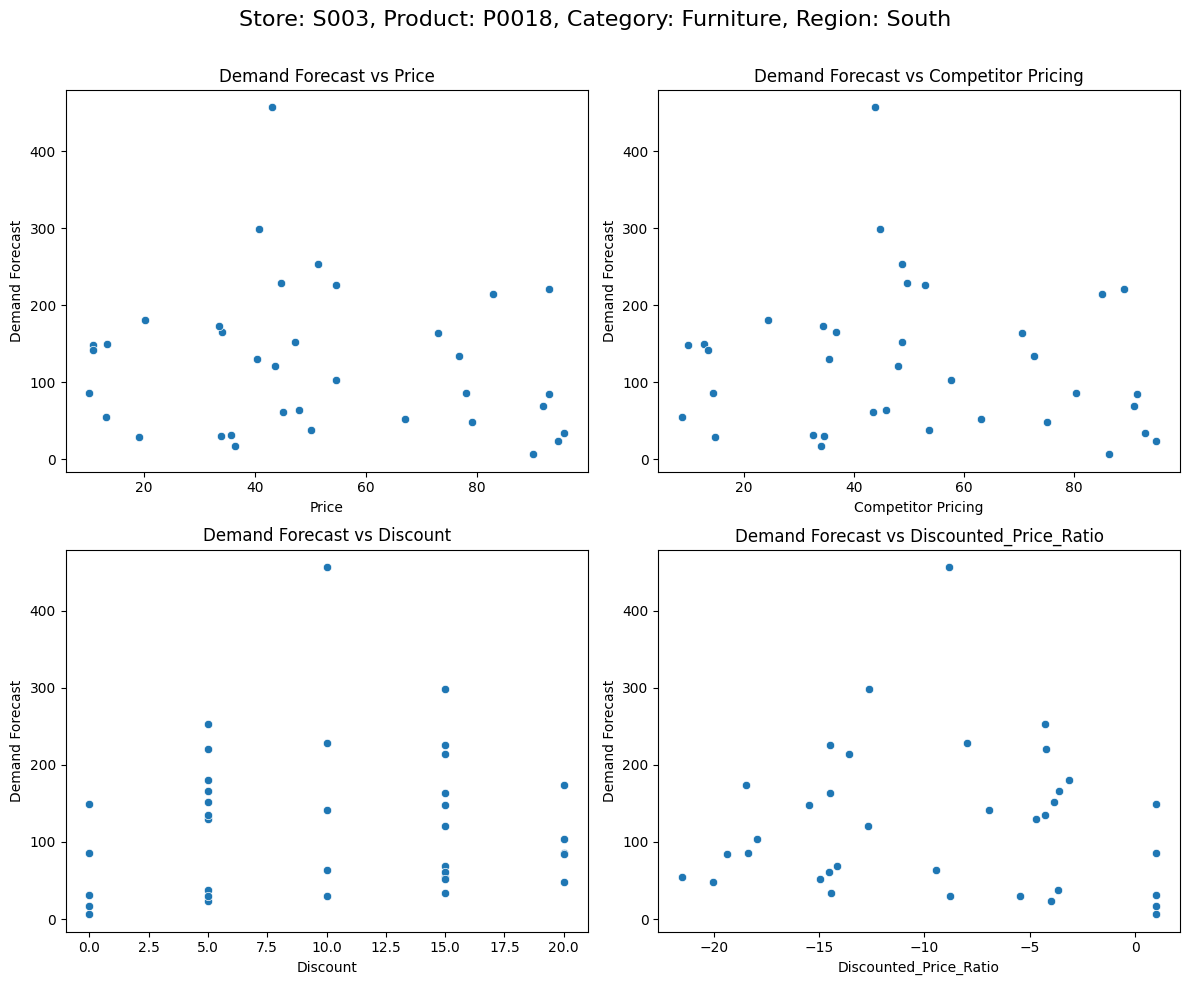

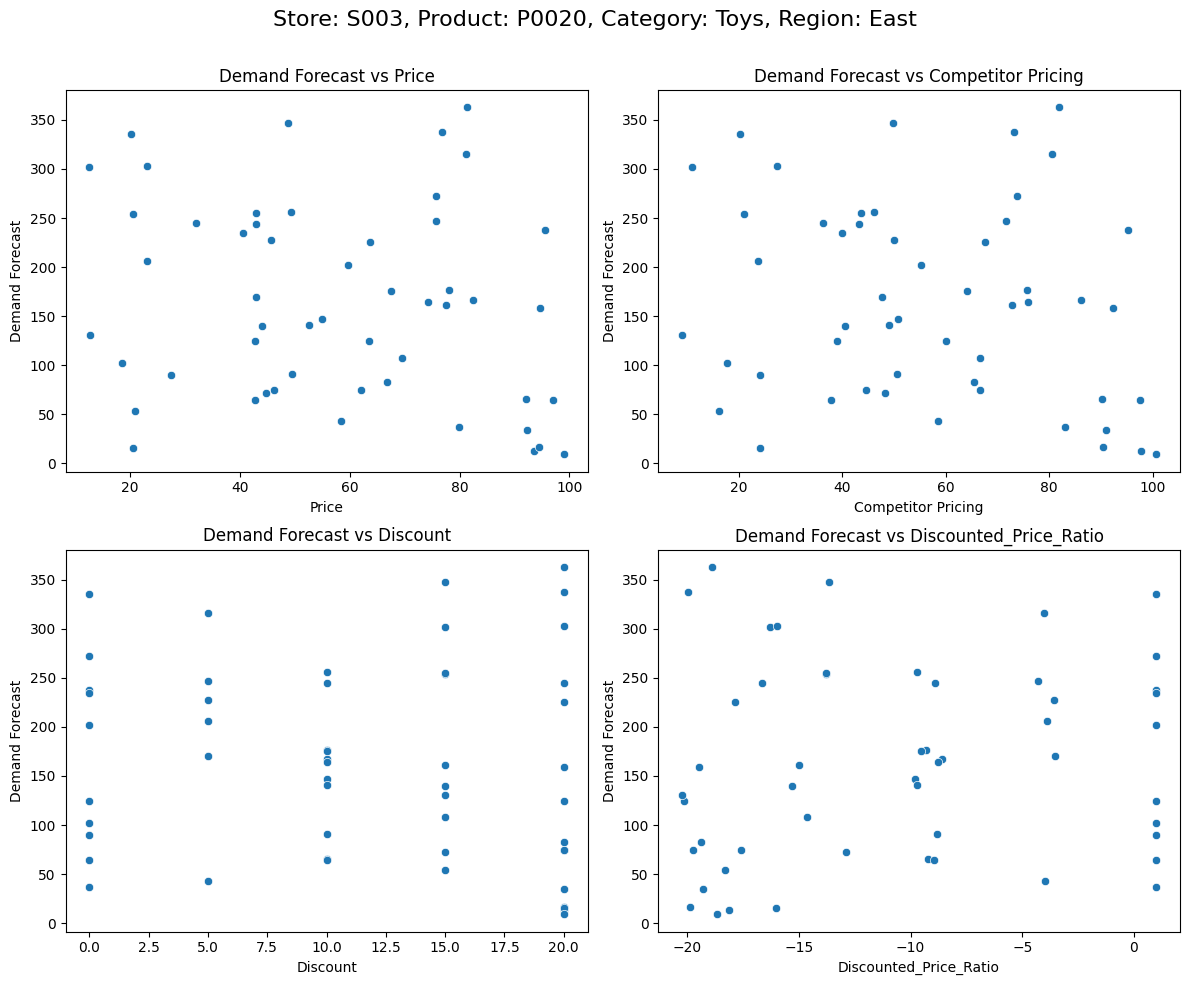

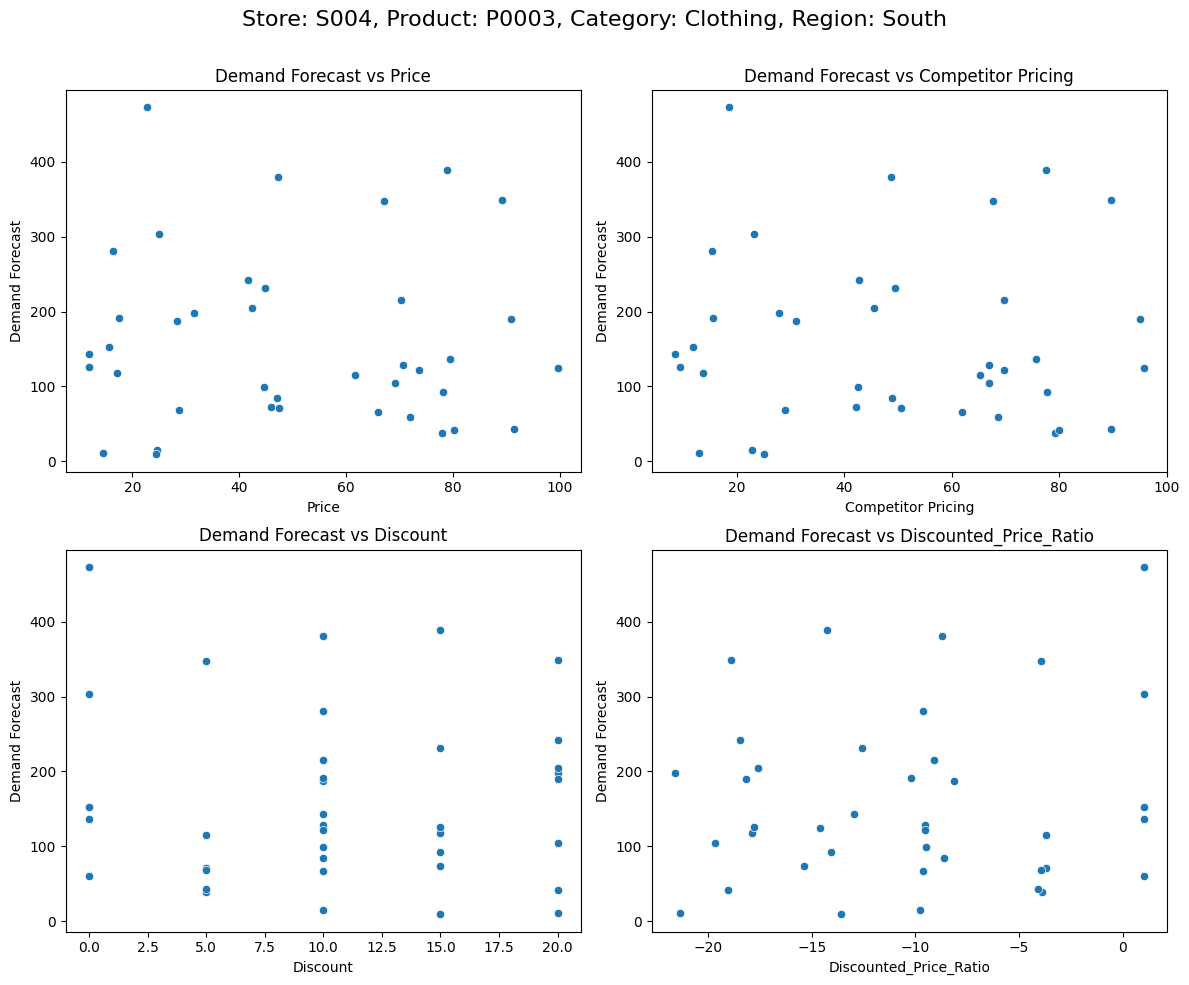

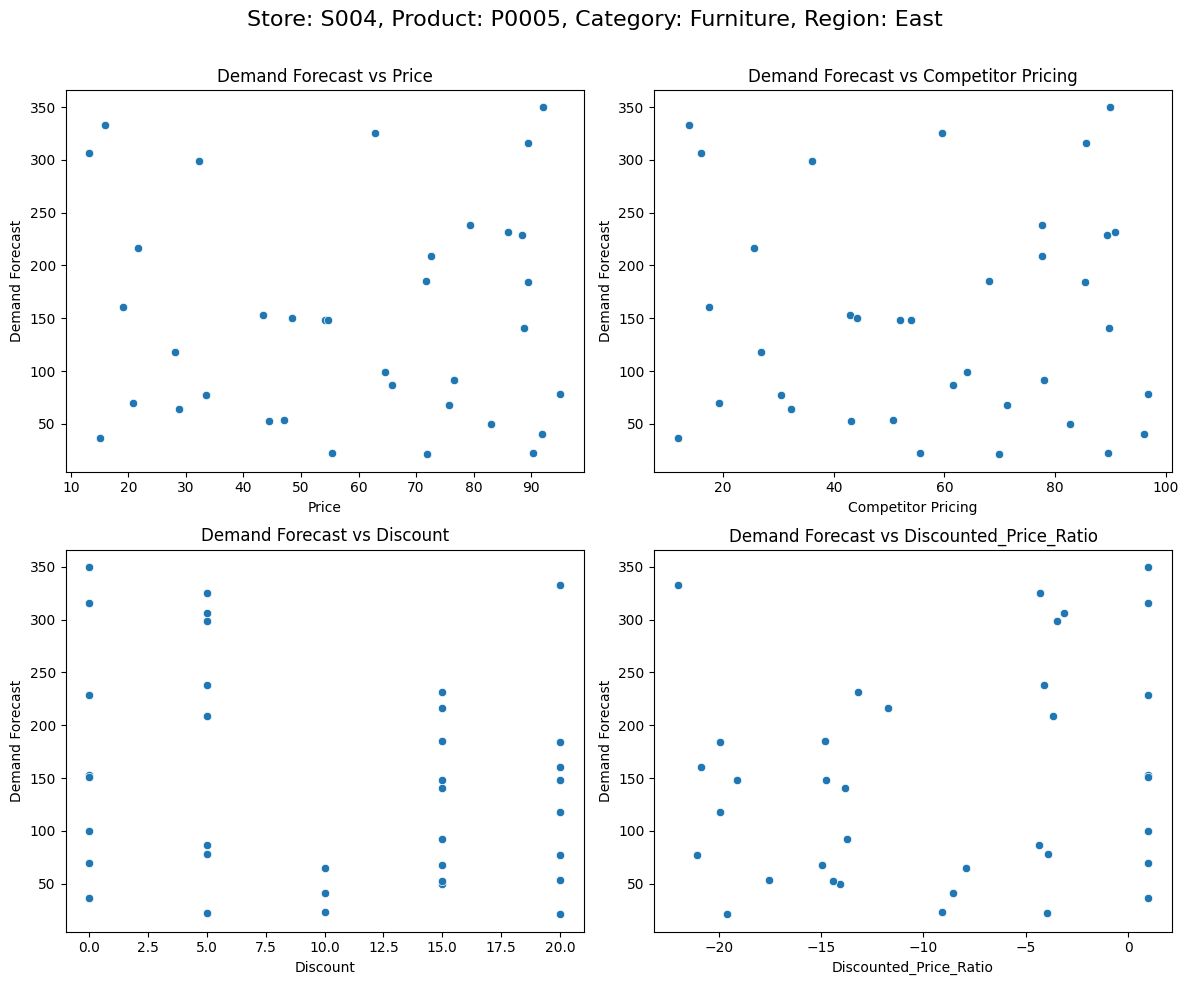

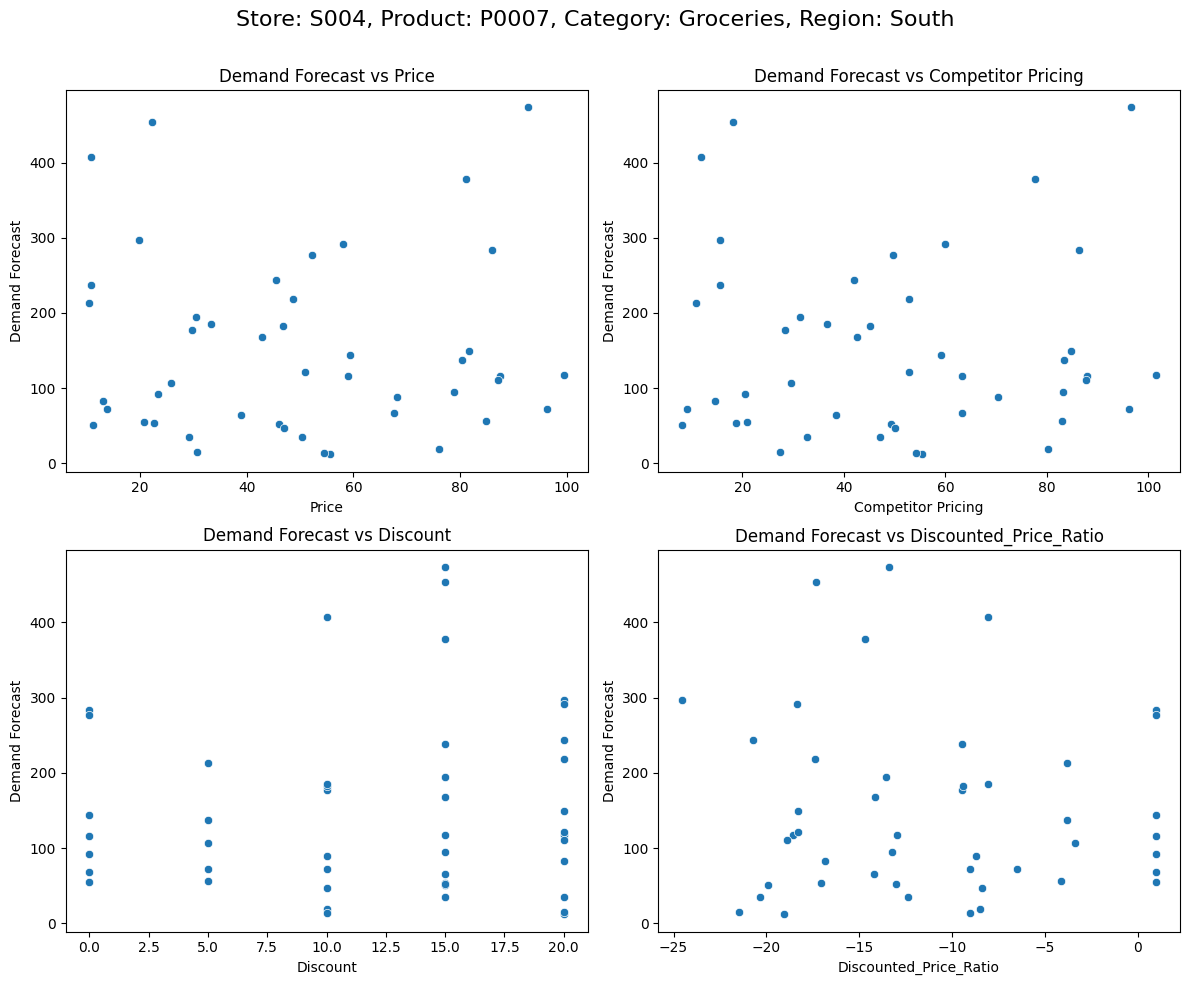

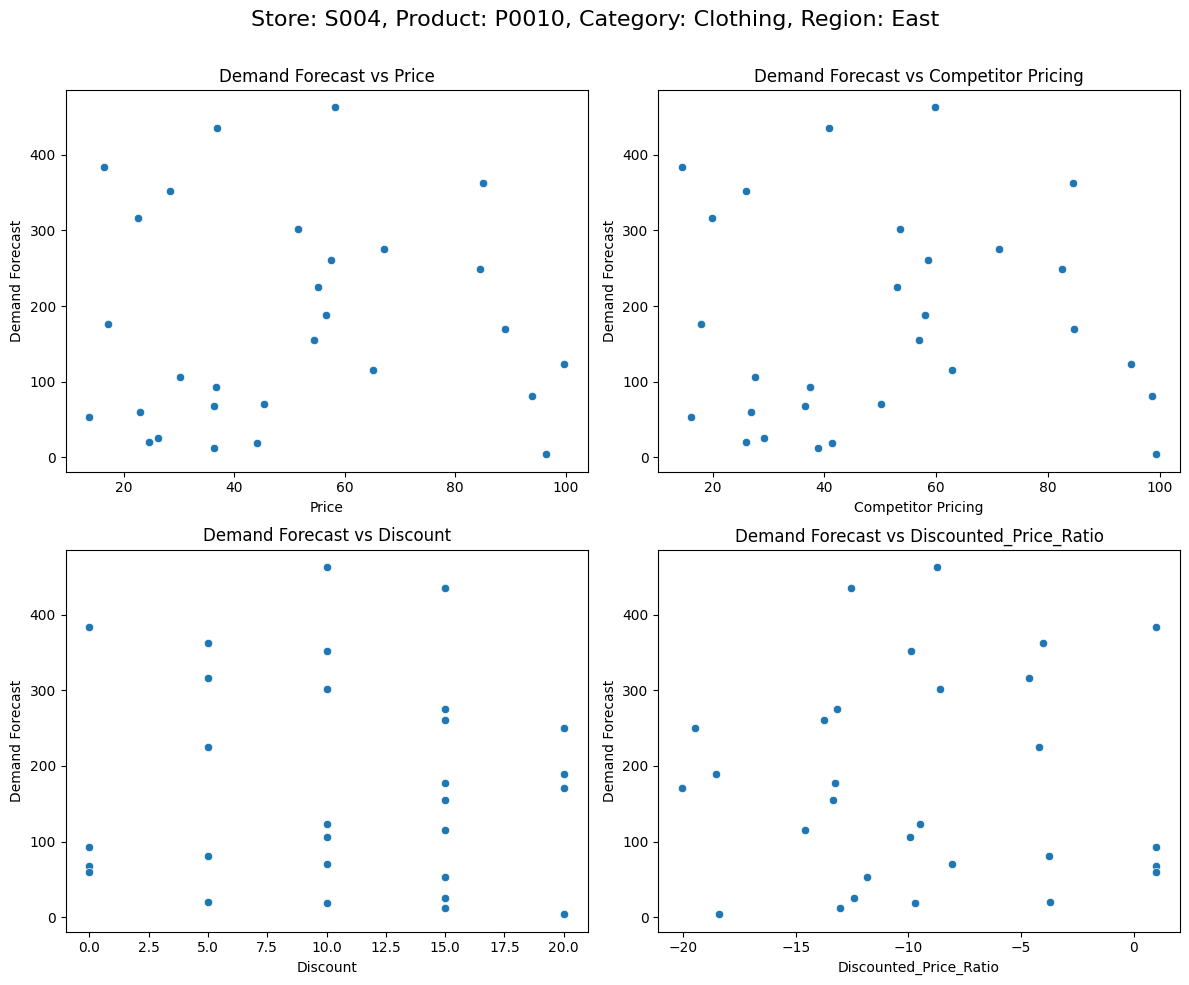

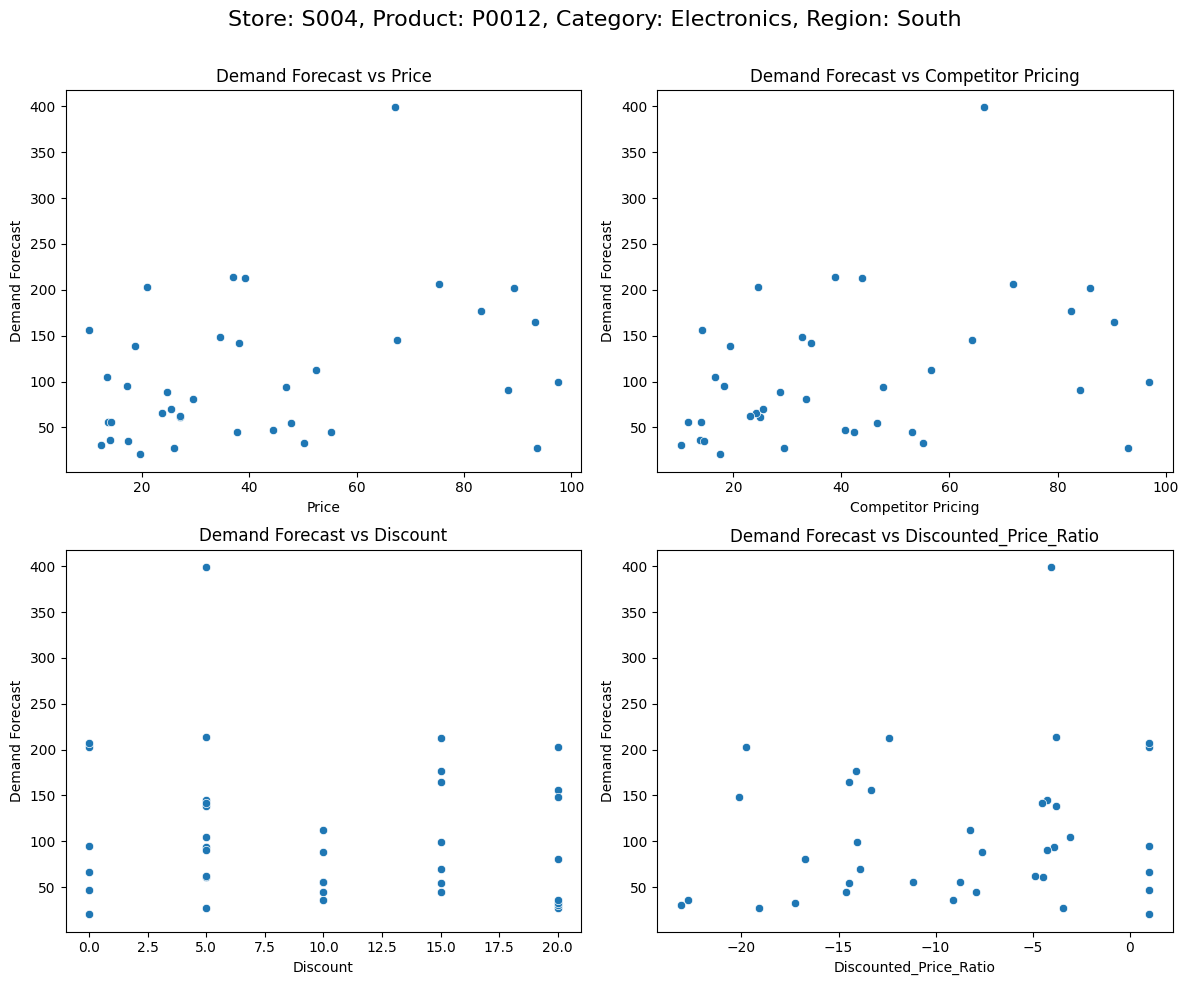

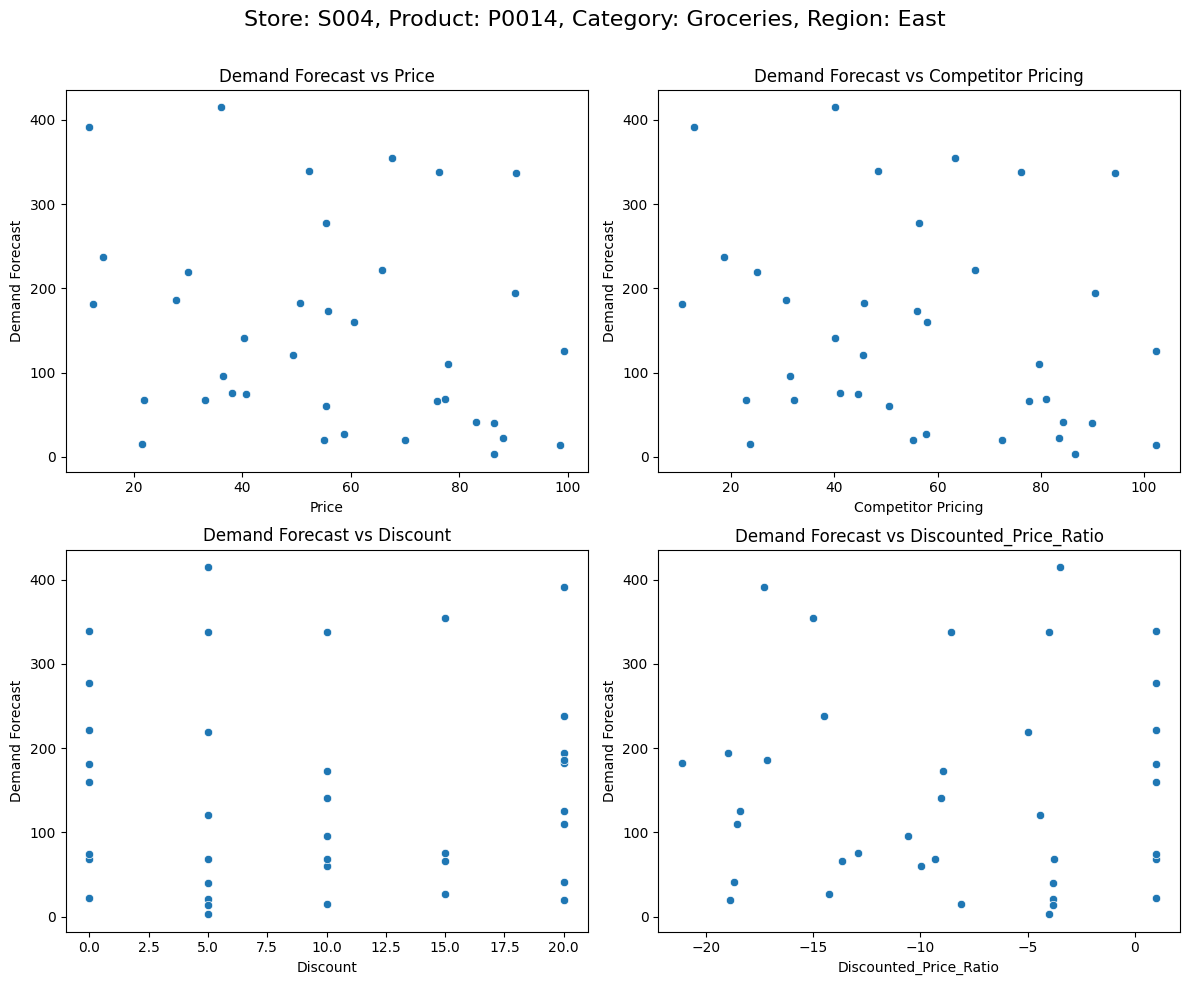

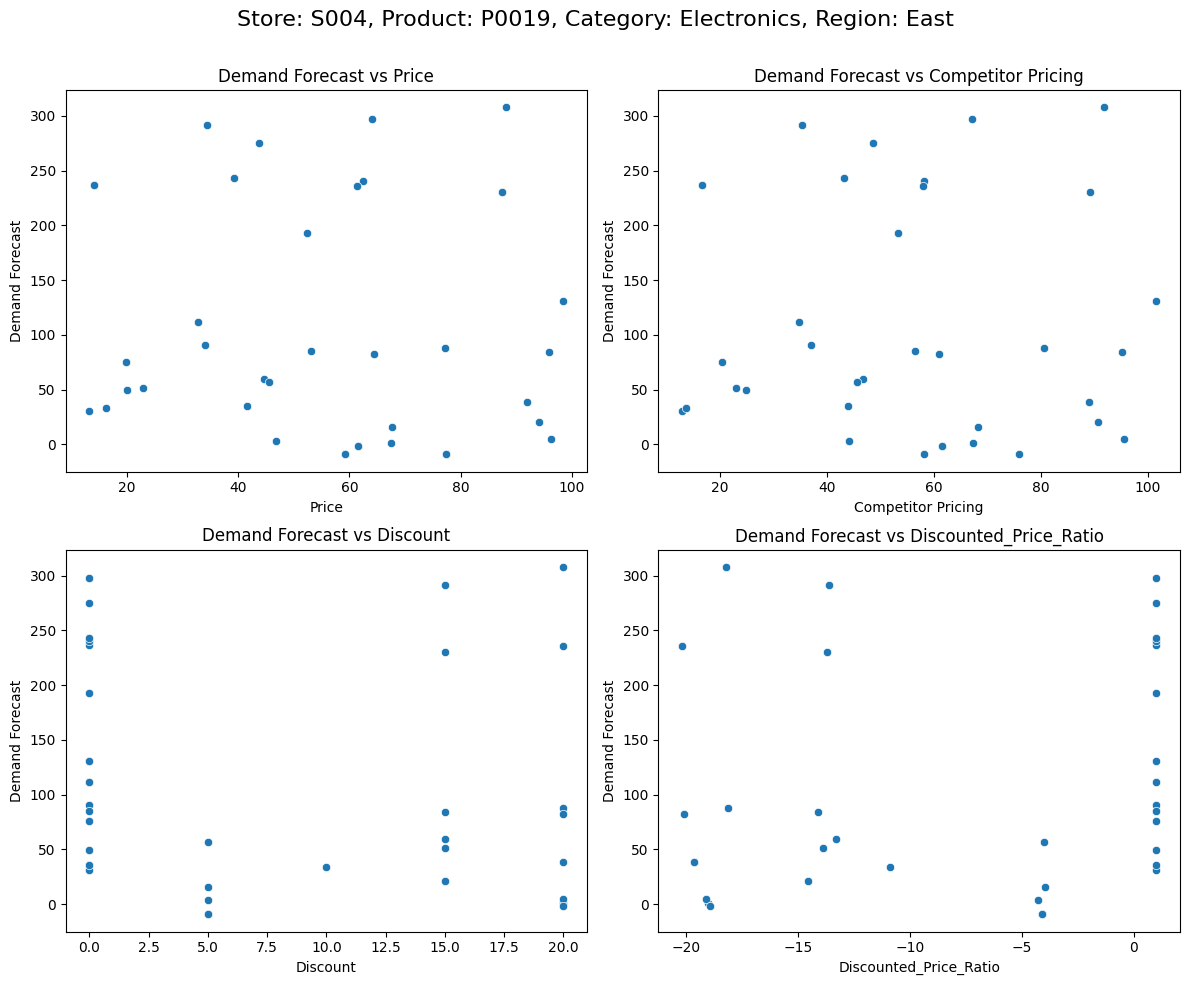

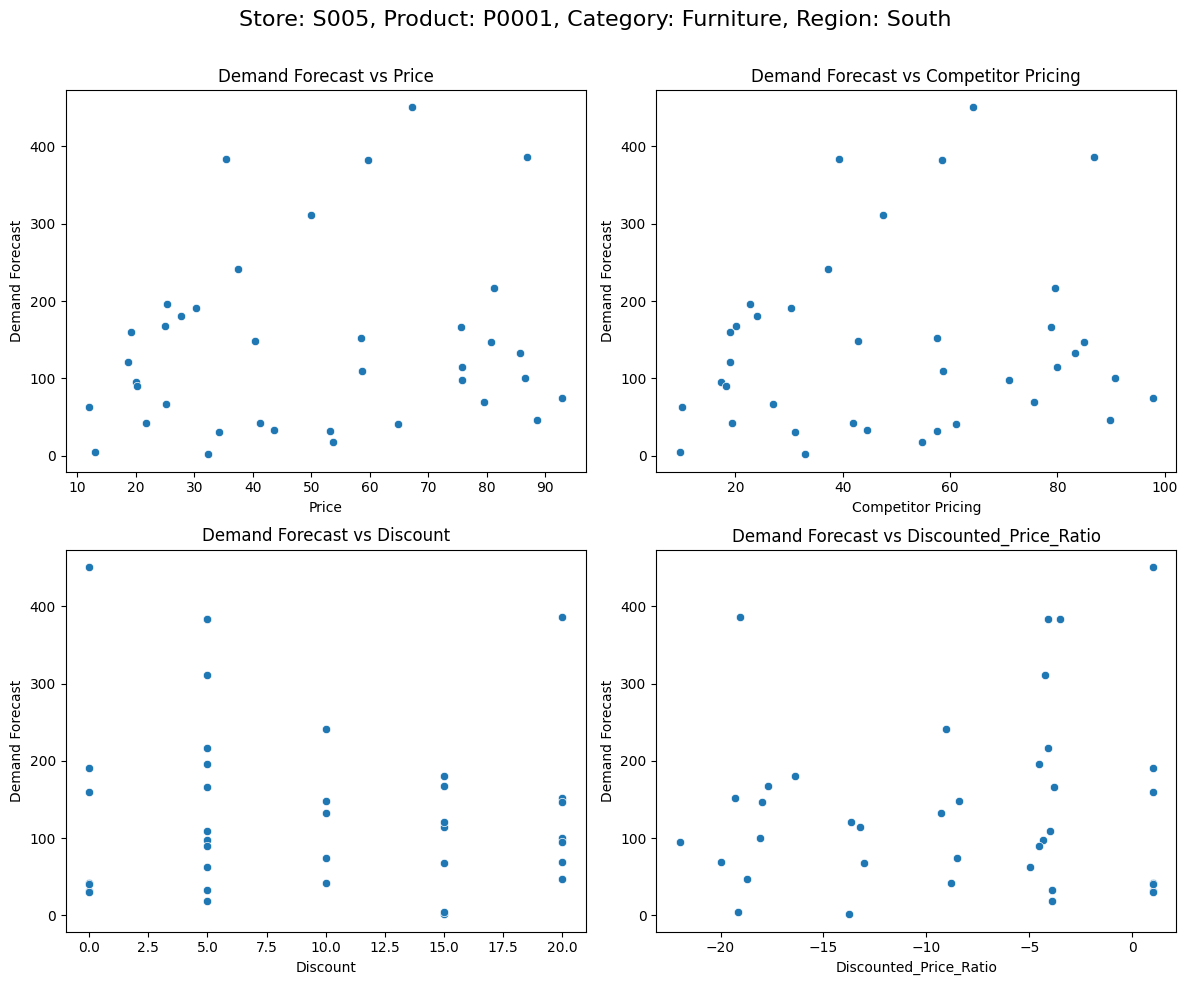

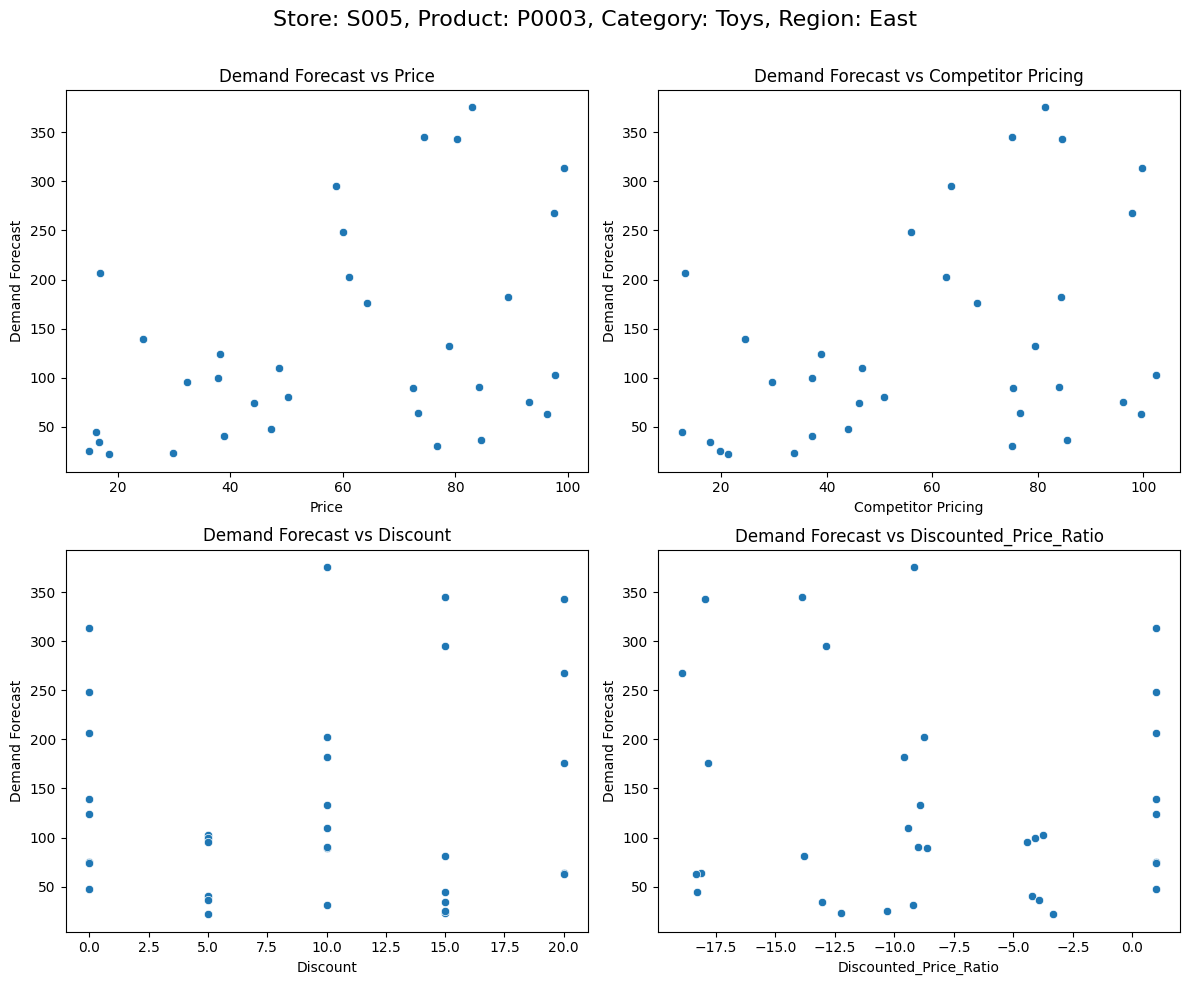

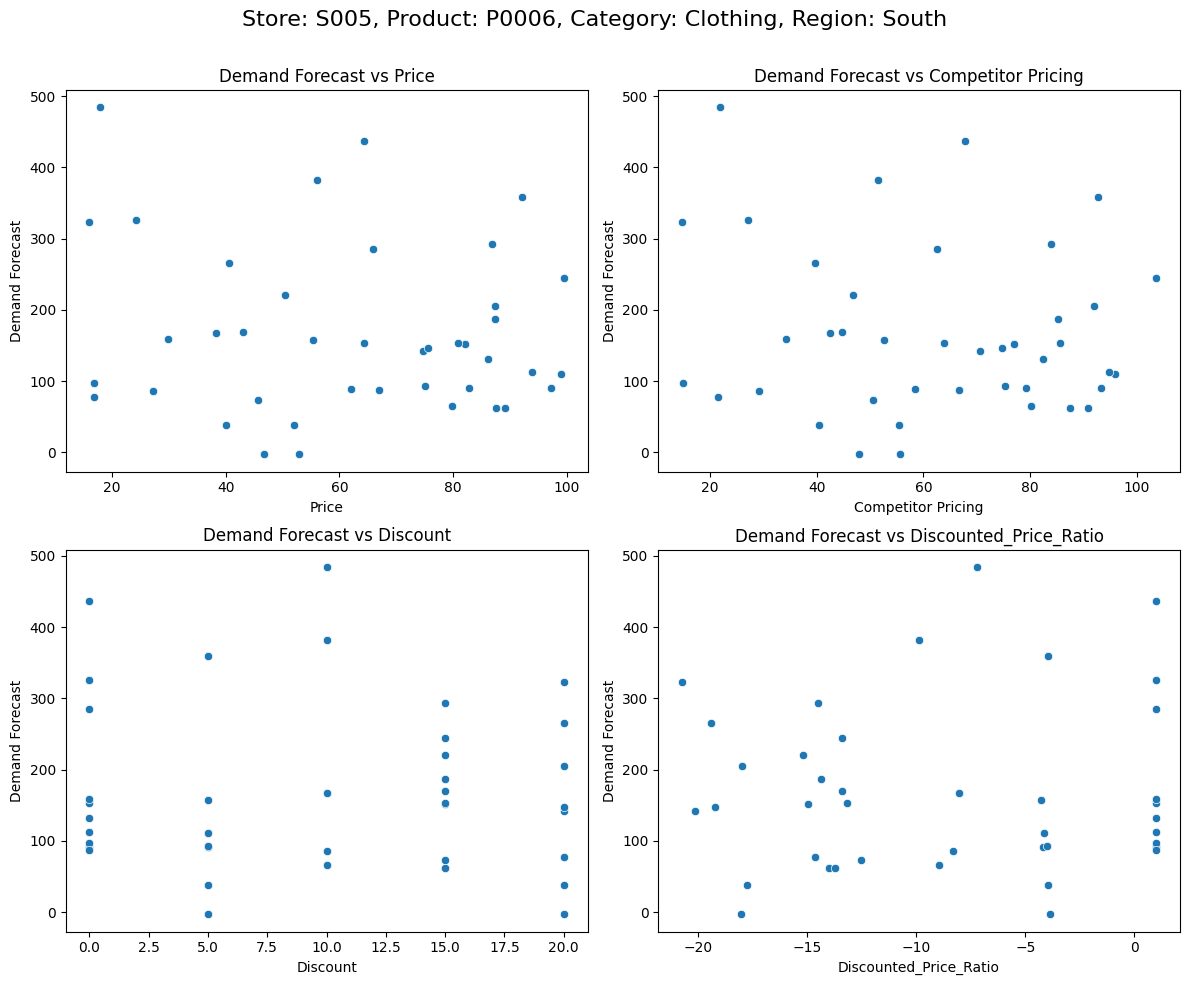

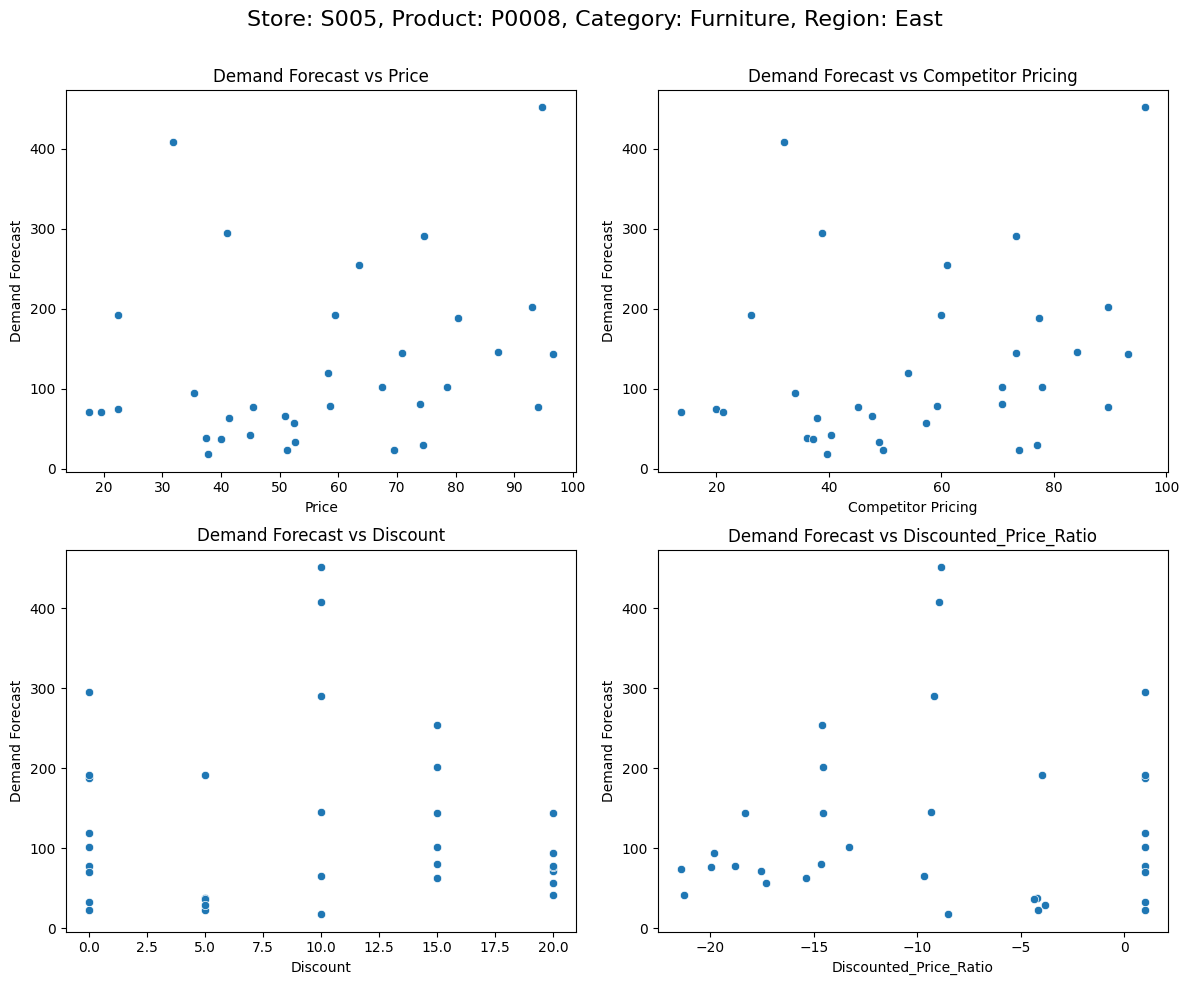

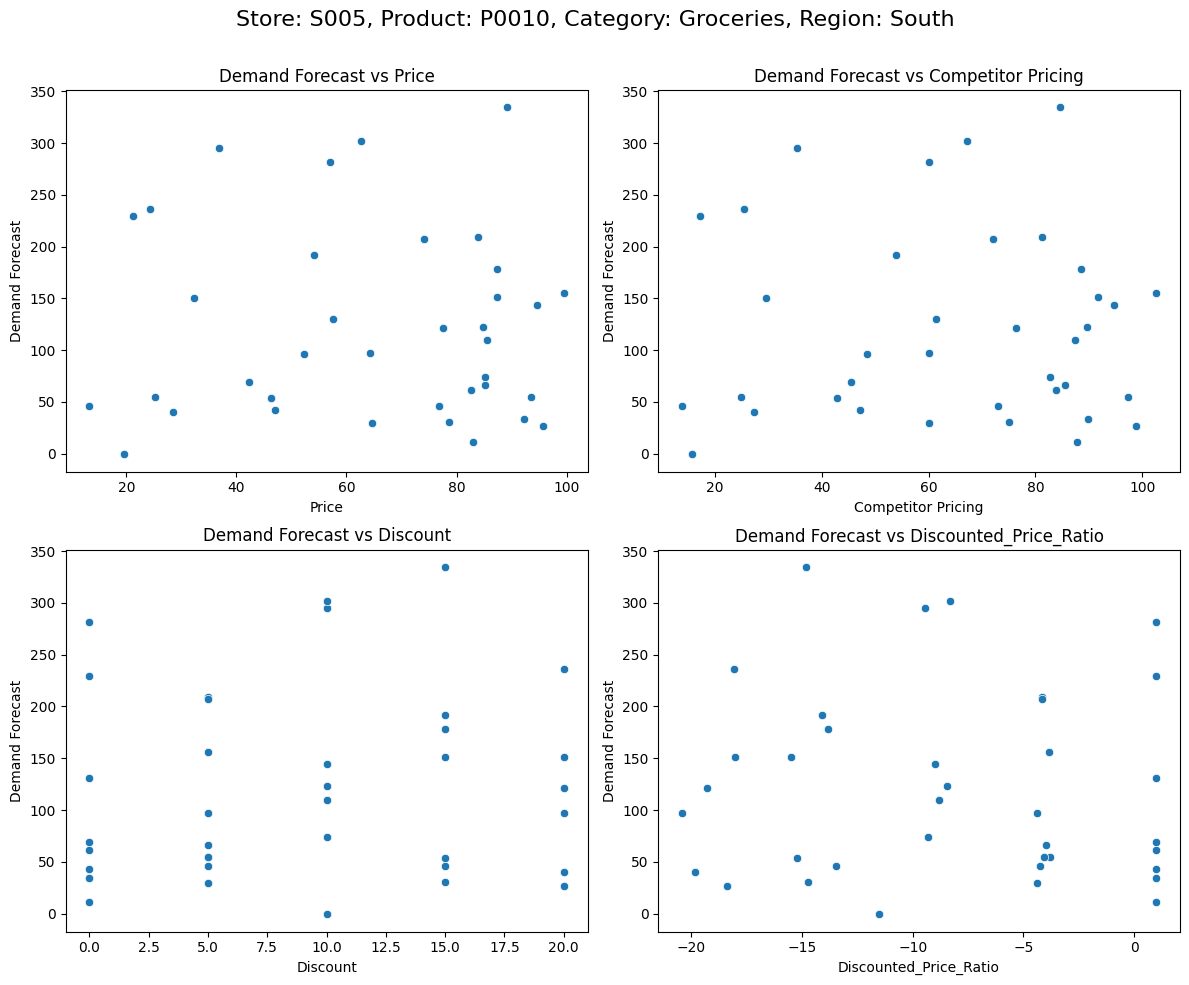

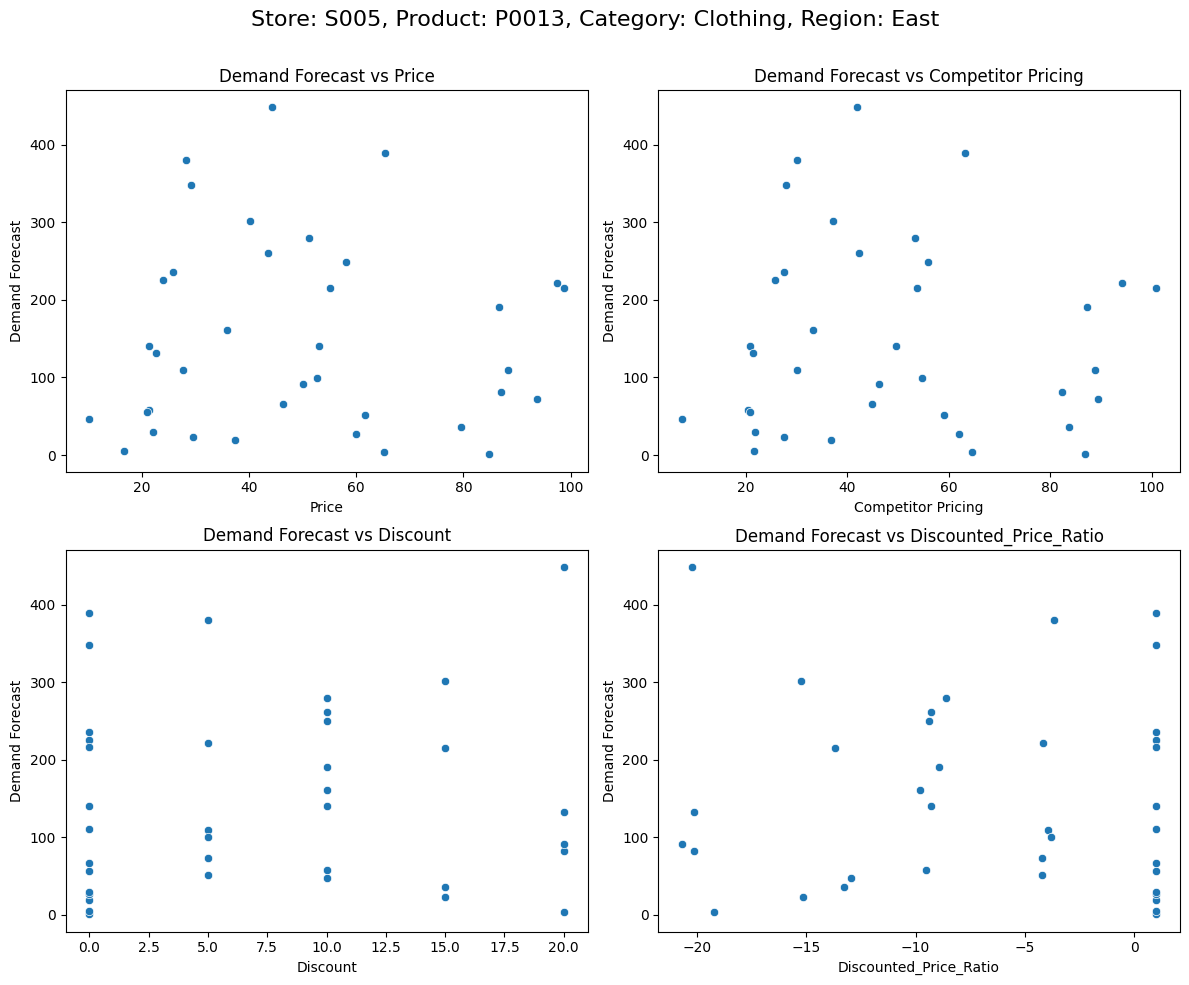

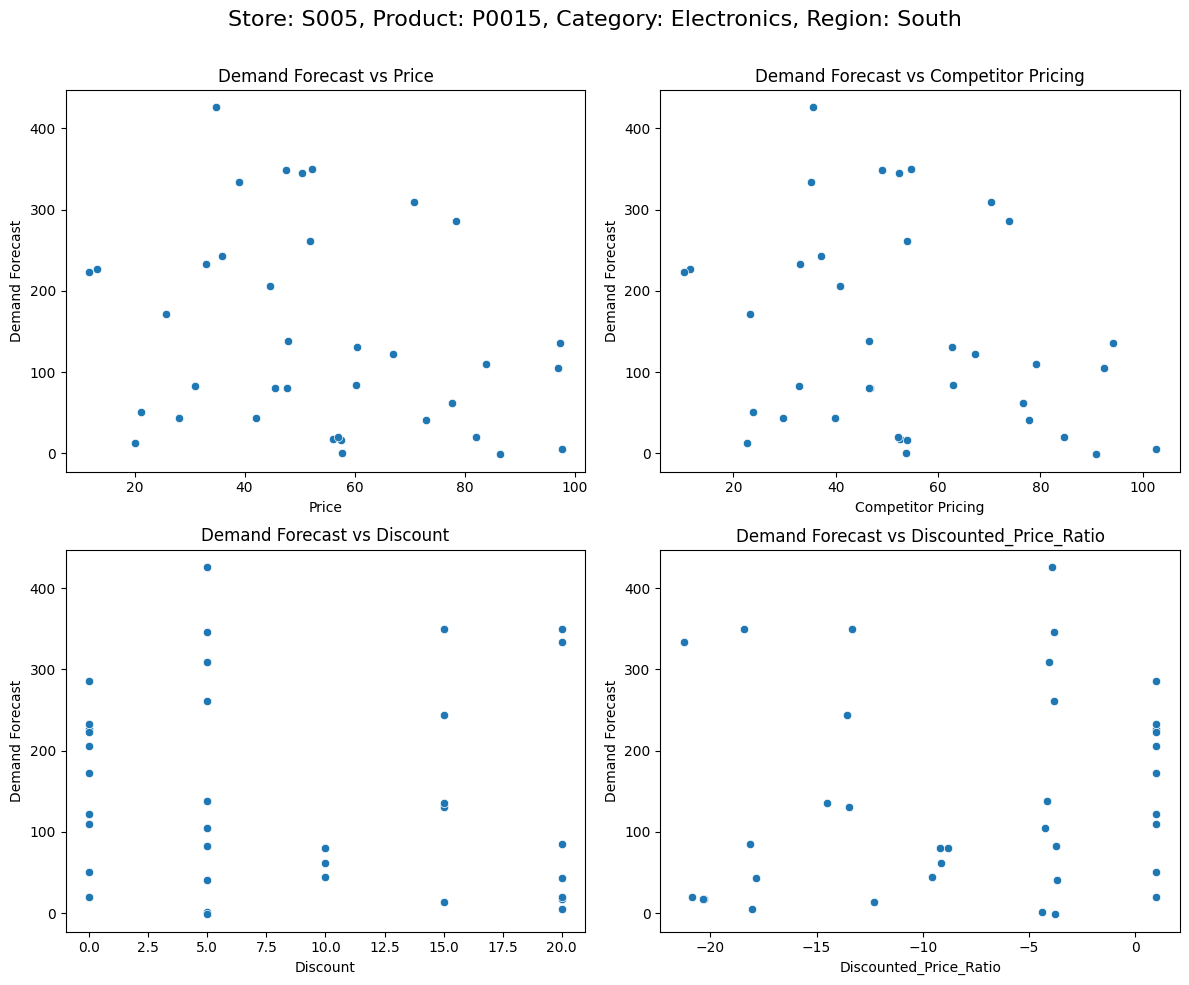

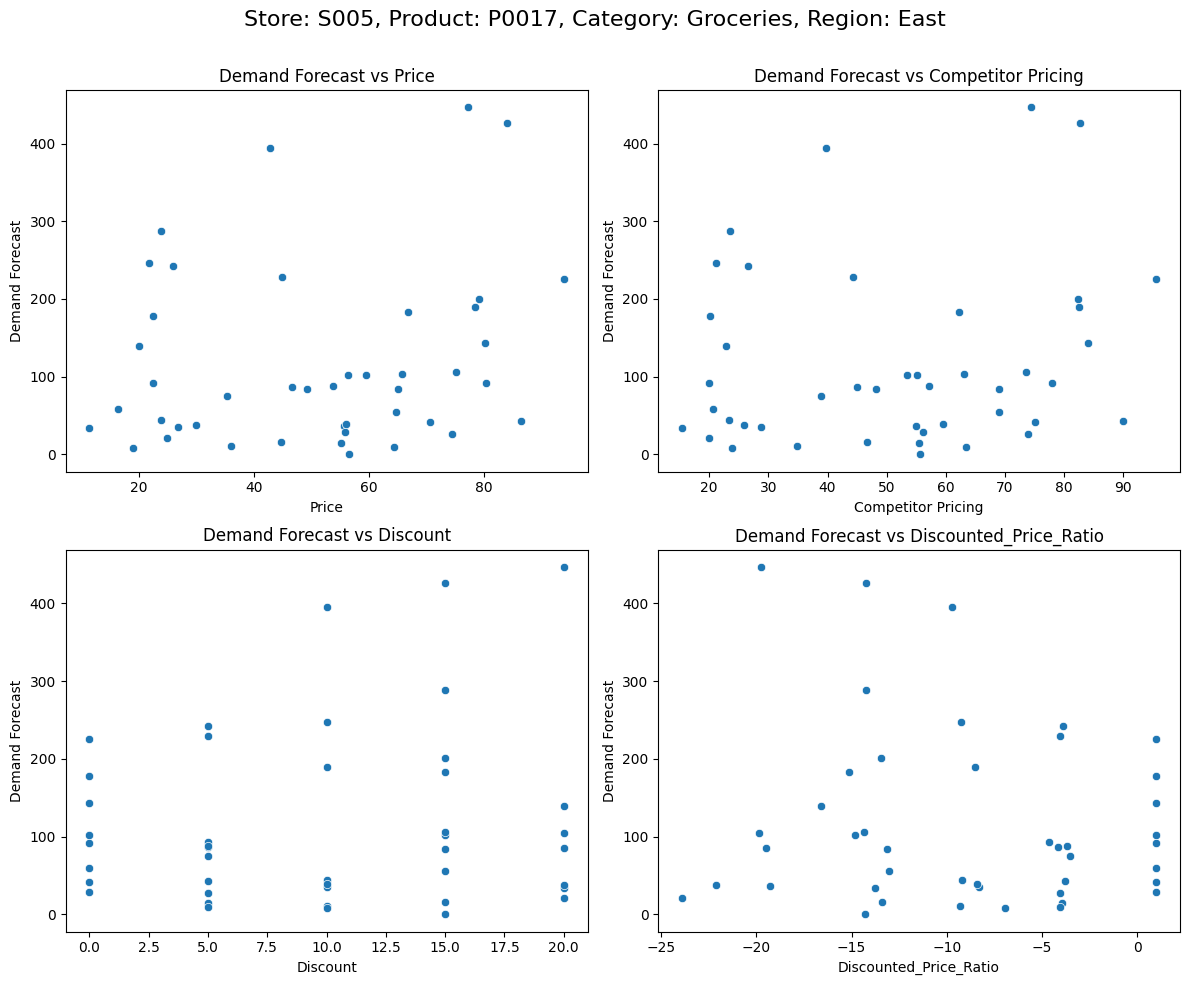

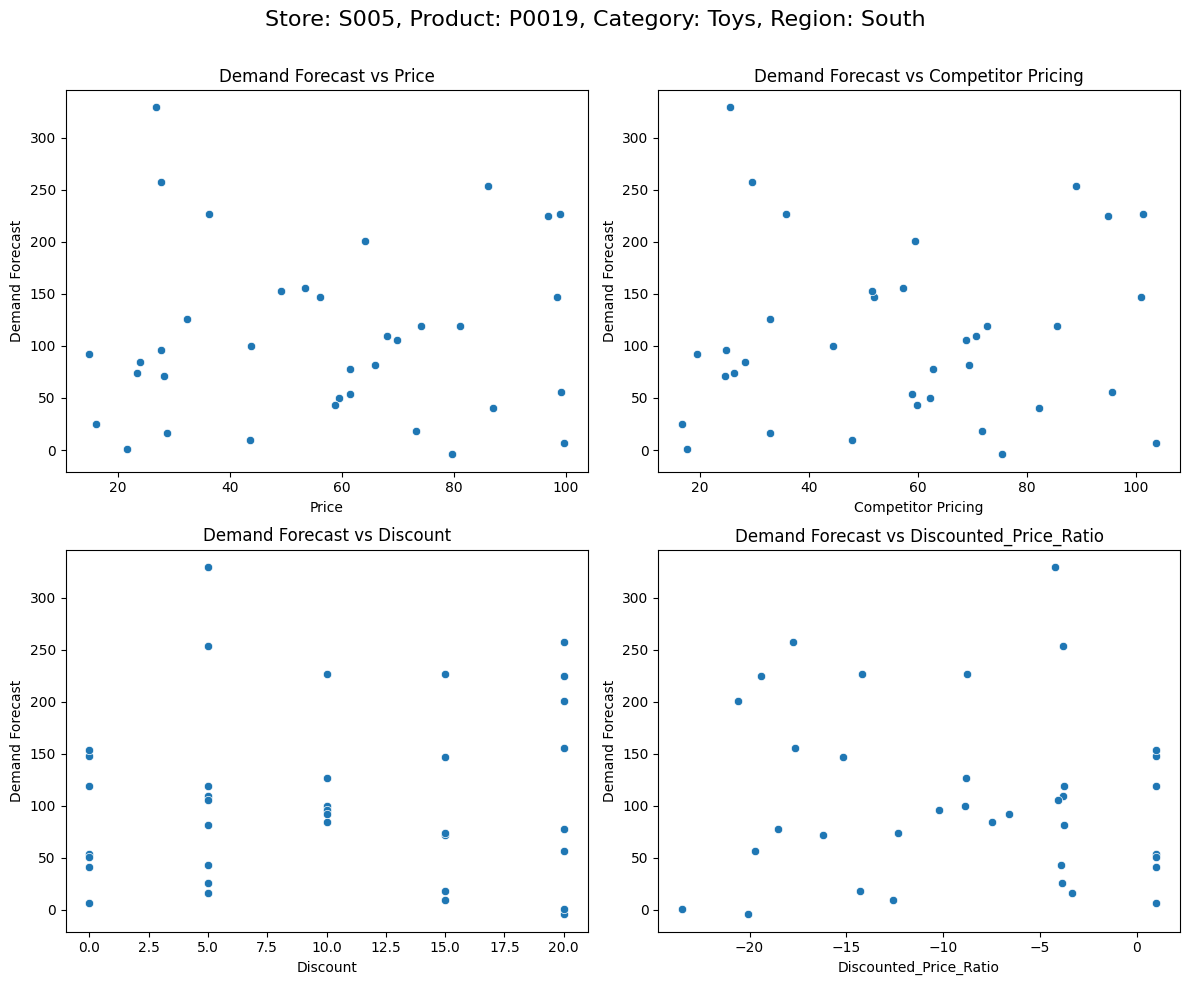

In [46]:

import numpy as np
from IPython.display import display

# Load dataset
data = pd.read_csv('retail_store_inventory.csv')

# Create the new feature: Discount * Price 
data['Discounted_Price_Ratio'] = ( data['Competitor Pricing']-(data['Discount'] * data['Price'] ))/ data['Competitor Pricing']
data['Price_Ratio'] =  data['Price'] - data['Competitor Pricing']-( data['Price'] )


# Define tuples list
tuples_list = [
    ('S001', 'P0001', 'Clothing', 'East'), ('S001', 'P0003', 'Electronics', 'South'), 
    ('S001', 'P0005', 'Groceries', 'East'), ('500', 'P0007', 'Toys', 'South'), 
    ('S001', 'P0010', 'Electronics', 'East'), ('S001', 'P0012', 'Furniture', 'South'), 
    ('S001', 'P0014', 'Toys', 'East'), ('S001', 'P0017', 'Clothing', 'South'),
    ('S001', 'P0019', 'Furniture', 'East'), ('S002', 'P0001', 'Groceries', 'South'),
    ('S002', 'P0004', 'Clothing', 'East'), ('S002', 'P0006', 'Electronics', 'South'),
    ('S002', 'P0008', 'Groceries', 'East'), ('S002', 'P0010', 'Toys', 'South'),
    ('S002', 'P0013', 'Electronics', 'East'), ('S002', 'P0015', 'Furniture', 'South'),
    ('S002', 'P0017', 'Toys', 'East'), ('S002', 'P0020', 'Clothing', 'South'),
    ('S003', 'P0002', 'Furniture', 'East'), ('5003', 'P0004', 'Groceries', 'South'),
    ('S003', 'P0007', 'Clothing', 'East'), ('S003', 'P0009', 'Electronics', 'South'),
    ('S003', 'P0011', 'Groceries', 'East'), ('S003', 'P0013', 'Toys', 'South'),
    ('S003', 'P0016', 'Electronics', 'East'), ('S003', 'P0018', 'Furniture', 'South'),
    ('S003', 'P0020', 'Toys', 'East'), ('S004', 'P0003', 'Clothing', 'South'),
    ('S004', 'P0005', 'Furniture', 'East'), ('S004', 'P0007', 'Groceries', 'South'),
    ('S004', 'P0010', 'Clothing', 'East'), ('S004', 'P0012', 'Electronics', 'South'),
    ('S004', 'P0014', 'Groceries', 'East'), ('500', 'P0016', 'Toys', 'South'),
    ('S004', 'P0019', 'Electronics', 'East'), ('S005', 'P0001', 'Furniture', 'South'),
    ('S005', 'P0003', 'Toys', 'East'), ('S005', 'P0006', 'Clothing', 'South'),
    ('S005', 'P0008', 'Furniture', 'East'), ('S005', 'P0010', 'Groceries', 'South'),
    ('S005', 'P0013', 'Clothing', 'East'), ('S005', 'P0015', 'Electronics', 'South'),
    ('S005', 'P0017', 'Groceries', 'East'), ('S005', 'P0019', 'Toys', 'South')
]

# Loop through each tuple and plot Demand Forecast vs other variables
for store, product, category, region in tuples_list:
    filtered_data = data[(data['Store ID'] == store) & 
                         (data['Product ID'] == product) & 
                         (data['Category'] == category) & 
                         (data['Region'] == region)]
    
    if filtered_data.shape[0] > 1:  # Check if sufficient data exists
        # Create subplots for Demand Forecast vs variables
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        fig.suptitle(f"Store: {store}, Product: {product}, Category: {category}, Region: {region}", fontsize=16)
        
        # Plot relationships
        sns.scatterplot(data=filtered_data, x='Price', y='Demand Forecast', ax=axes[0, 0])
        axes[0, 0].set_title("Demand Forecast vs Price")
        
        sns.scatterplot(data=filtered_data, x='Competitor Pricing', y='Demand Forecast', ax=axes[0, 1])
        axes[0, 1].set_title("Demand Forecast vs Competitor Pricing")
        
        sns.scatterplot(data=filtered_data, x='Discount', y='Demand Forecast', ax=axes[1, 0])
        axes[1, 0].set_title("Demand Forecast vs Discount")
        
        sns.scatterplot(data=filtered_data, x='Discounted_Price_Ratio', y='Demand Forecast', ax=axes[1, 1])
        axes[1, 1].set_title("Demand Forecast vs Discounted_Price_Ratio")
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)  # Adjust title position
        plt.show()

C:\Users\sivas\AppData\Local\Temp\ipykernel_16308\3932356183.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daywise_demand.index, y=daywise_demand.values, palette='Blues')


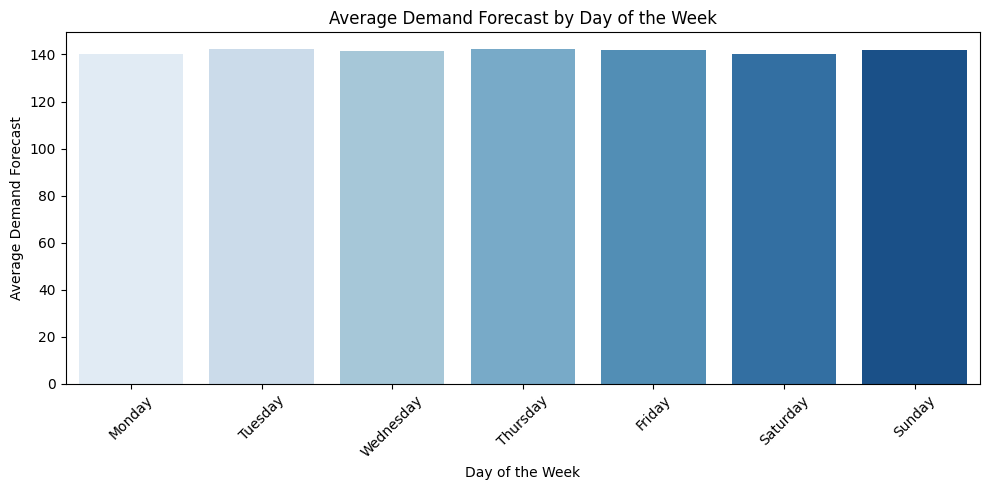

C:\Users\sivas\AppData\Local\Temp\ipykernel_16308\3932356183.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthwise_demand.index, y=monthwise_demand.values, palette='Greens')


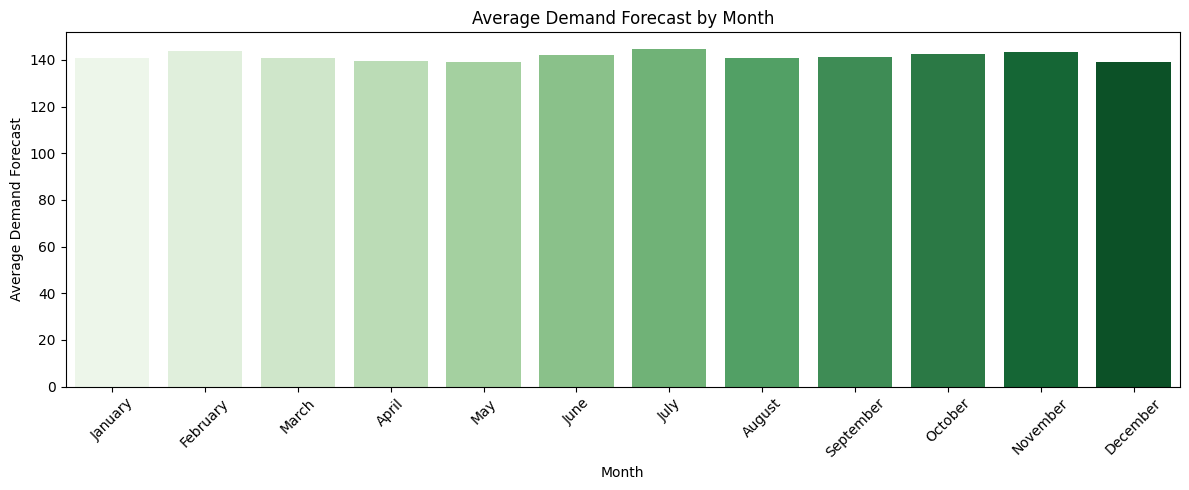

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'retail_store_inventory.csv'
data = pd.read_csv(file_path)

# Ensure Date is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract day of the week and month from the Date column
data['DayOfWeek'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month_name()

# Aggregate Demand Forecast by Day of the Week
daywise_demand = data.groupby('DayOfWeek')['Demand Forecast'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Aggregate Demand Forecast by Month
monthwise_demand = data.groupby('Month')['Demand Forecast'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Plot 1: Demand Forecast vs Day of the Week
plt.figure(figsize=(10, 5))
sns.barplot(x=daywise_demand.index, y=daywise_demand.values, palette='Blues')
plt.title('Average Demand Forecast by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand Forecast')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Demand Forecast vs Month
plt.figure(figsize=(12, 5))
sns.barplot(x=monthwise_demand.index, y=monthwise_demand.values, palette='Greens')
plt.title('Average Demand Forecast by Month')
plt.xlabel('Month')
plt.ylabel('Average Demand Forecast')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


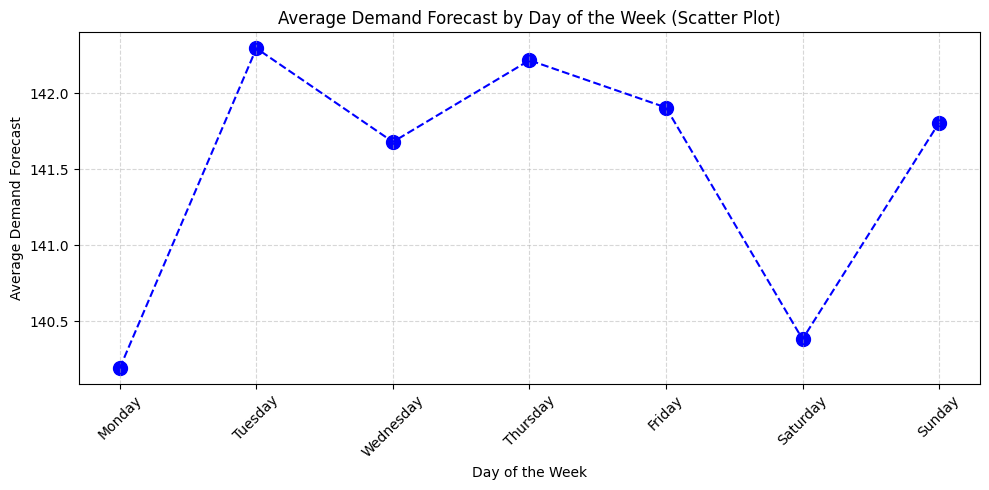

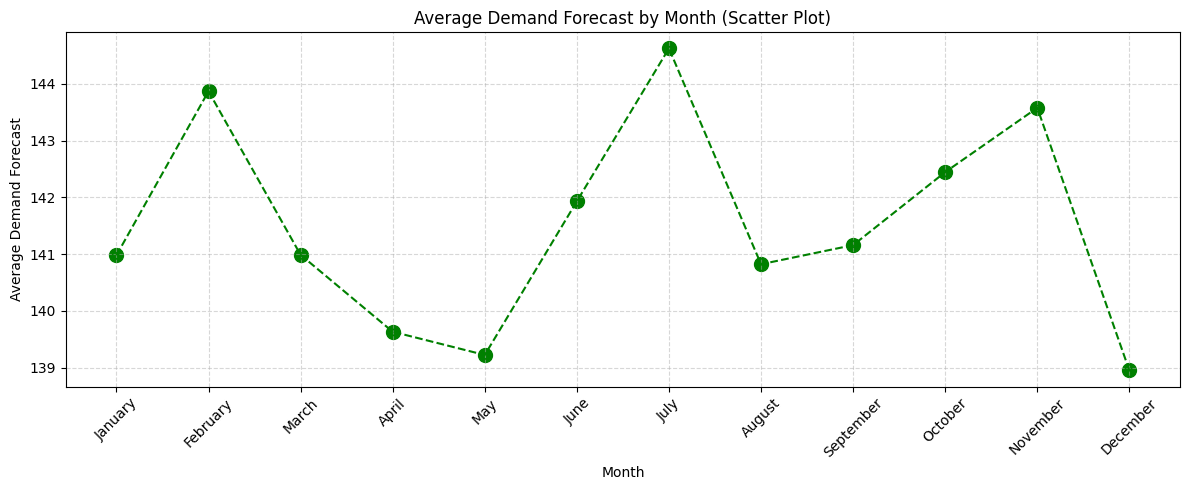

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'retail_store_inventory.csv'
data = pd.read_csv(file_path)

# Ensure Date is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Extract day of the week and month from the Date column
data['DayOfWeek'] = data['Date'].dt.day_name()
data['Month'] = data['Date'].dt.month_name()

# Aggregate Demand Forecast by Day of the Week
daywise_demand = data.groupby('DayOfWeek')['Demand Forecast'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Aggregate Demand Forecast by Month
monthwise_demand = data.groupby('Month')['Demand Forecast'].mean().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)

# Plot 1: Scatter Plot - Demand Forecast vs Day of the Week
plt.figure(figsize=(10, 5))
plt.scatter(daywise_demand.index, daywise_demand.values, color='b', s=100)
plt.plot(daywise_demand.index, daywise_demand.values, color='b', linestyle='--')  # Add a line for better flow
plt.title('Average Demand Forecast by Day of the Week (Scatter Plot)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand Forecast')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Scatter Plot - Demand Forecast vs Month
plt.figure(figsize=(12, 5))
plt.scatter(monthwise_demand.index, monthwise_demand.values, color='g', s=100)
plt.plot(monthwise_demand.index, monthwise_demand.values, color='g', linestyle='--')  # Add a line for better flow
plt.title('Average Demand Forecast by Month (Scatter Plot)')
plt.xlabel('Month')
plt.ylabel('Average Demand Forecast')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
